#      Python Project : Drug Consumption

# Part I - Data Pre-processing

### Importation of necessary libraries

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re                       #For RegExp in order to find easily the titles of our variables while scraping the website
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')

### Importation of the dataset

In [2]:
df = pd.read_csv("drug_consumption.data")
df

1  0.49788  0.48246  -0.05921  0.96082  0.12600  0.31287  -0.57545  \
0        2 -0.07854 -0.48246   1.98437  0.96082 -0.31685 -0.67825   1.93886   
1        3  0.49788 -0.48246  -0.05921  0.96082 -0.31685 -0.46725   0.80523   
2        4 -0.95197  0.48246   1.16365  0.96082 -0.31685 -0.14882  -0.80615   
3        5  0.49788  0.48246   1.98437  0.96082 -0.31685  0.73545  -1.63340   
4        6  2.59171  0.48246  -1.22751  0.24923 -0.31685 -0.67825  -0.30033   
...    ...      ...      ...       ...      ...      ...      ...       ...   
1879  1884 -0.95197  0.48246  -0.61113 -0.57009 -0.31685 -1.19430   1.74091   
1880  1885 -0.95197 -0.48246  -0.61113 -0.57009 -0.31685 -0.24649   1.74091   
1881  1886 -0.07854  0.48246   0.45468 -0.57009 -0.31685  1.13281  -1.37639   
1882  1887 -0.95197  0.48246  -0.61113 -0.57009 -0.31685  0.91093  -1.92173   
1883  1888 -0.95197 -0.48246  -0.61113  0.21128 -0.31685 -0.46725   2.12700   

      -0.58331  -0.91699  ...  CL0.4  CL0.5  CL0.6 CL0.7 CL0.8 CL0.9 CL0.10  \
0      1.43533   0.76096  ...    CL4    CL0    CL2   CL0   CL2   CL3    CL0   
1     -0.84732  -1.62090  ...    CL0    CL0    CL0   CL0   CL0   CL0    CL1   
2     -0.01928   0.59042  ...    CL0    CL0    CL2   CL0   CL0   CL0    CL0   
3     -0.45174  -0.30172  ...    CL1    CL0    CL0   CL1   CL0   CL0    CL2   
4     -1.55521   2.03972  ...    CL0    CL0    CL0   CL0   CL0   CL0    CL0   
...        ...       ...  ...    ...    ...    ...   ...   ...   ...    ...   
1879   1.88511   0.76096  ...    CL0    CL0    CL0   CL3   CL3   CL0    CL0   
1880   0.58331   0.76096  ...    CL2    CL0    CL0   CL3   CL5   CL4    CL4   
1881  -1.27553  -1.77200  ...    CL4    CL0    CL2   CL0   CL2   CL0    CL2   
1882   0.29338  -1.62090  ...    CL3    CL0    CL0   CL3   CL3   CL0    CL3   
1883   1.65653   1.11406  ...    CL3    CL0    CL0   CL3   CL3   CL0    CL3   

     CL2.2 CL0.11 CL0.12  
0      CL4    CL0    CL0  
1      CL0    CL0    CL0  
2      CL2    CL0    CL0  
3      CL2    CL0    CL0  
4      CL6    CL0    CL0  
...    ...    ...    ...  
1879   CL0    CL0    CL5  
1880   CL5    CL0    CL0  
1881   CL6    CL0    CL0  
1882   CL4    CL0    CL0  
1883   CL6    CL0    CL2  

[1884 rows x 32 columns]

### Allowing to show all columns

In [3]:
pd.set_option('display.max_columns', 32)

# Scraping the website to get the dataset informations

In [4]:
url        = "https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29"
requesting = requests.get(url)
soup       = BeautifulSoup(requesting.content, "html.parser")

***creating the dataset information list***

In [5]:
DATA_INFO=[]

***Useful functions***

In [6]:
def Liste_Scrap(L,index):                 #Returns a list of all values corresponding to the variables defined by its index
    M=[]
    M.append(variables[index])
    for k in range(len(L)):
        M.append(L[k].split("  "))
    return M

def Format_Liste_Scrap(liste):            #This function adds a space between words in order to do the split on "  ". It makes the task much easier to do.
    A=liste
    L=[]
    for k in range(len(A)):
        L.append(A[k].split())
    A=[]
    for i in range(len(L)):
        s=""
        s+=L[i][0]+"  "
        for j in range(1,len(L[i])):
            s+=L[i][j]+" "
        A.append(s)
    return A

def Max(L):
    M=L[0]
    for k in range(len(L)):
        if(L[k]>M):
            M=L[k]
    return M

def Ready_for_DataFrame(L):
    Values=[]
    Meanings=[]
    for k in range(1,len(L)):
        Values.append(L[k][0])
        Meanings.append(L[k][1])
    return [Values,Meanings]

def Convert_To_Float(L):
    N=df.shape[0]
    for k in range(N):
        L[k]=float(L[k])
    return L
        
def Convert_To_Int(L):
    N=df.shape[0]
    for k in range(N):
        L[k]=int(L[k])
    return L
        
def Convert_To_Meanings(data_Val,data_Meanings,col1,col2):
    for k in range(data_Val.shape[0]):
        for j in range(data_Meanings.shape[0]):
            if(data_Val[col1].iloc[k]==float(data_Meanings[col1].iloc[j])):
                data_Val[col1].iloc[k]=str(data_Meanings[col2].iloc[j])
                
def Convert_To_Meanings2(data_Val,data_Meanings,col1,col2):
    for k in range(data_Val.shape[0]):
        for j in range(data_Meanings.shape[0]):
            if(data_Val[col1].iloc[k]==str(data_Meanings[col1].iloc[j])):
                data_Val[col1].iloc[k]=str(data_Meanings[col2].iloc[j])

def Meanings_To_Values(data,col,elt):
    return float(data[col][data["Meanings"]==elt].values[0])

def Index_of_Values(col,elt):
    L=[]
    for k in range(df_Values.shape[0]):
        if df_Values[col].iloc[k]==elt:
            L.append(k)
    return L

def Tableau(DATA,data,col,elt,number_of_columns):
    L=[]
    for k in range(number_of_columns):
        res=input("Saisissez la colonne numero "+str(k+1)+" : ")
        L.append(res)
    return DATA.loc[Index_of_Values(col,Meanings_To_Values(data,col,elt)),L]

def Variance_Cumulate(L):
    M=[]
    S=0
    for k in range(len(L)):
        S+=L[k]
        M.append(S)
    return M

def Plot_ML(col,targets,PC1,PC2):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(PC1, fontsize = 15)
    ax.set_ylabel(PC2, fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20)
    
    colors = ['r', 'g', 'b', 'yellow', 'purple', 'magenta','cyan','orange','brown']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[col] == target
        ax.scatter(finalDf.loc[indicesToKeep, PC1]
               , finalDf.loc[indicesToKeep, PC2]
               , c = color
               , s = 50)
    ax.legend(targets)
    ax.grid()
    
def Predict_an_Individual():
    score1=float(input("type the first score"))
    score2=float(input("type the second score"))
    score3=float(input("type the third score"))
    print(Individual_Prediction(score1,score2,score3))

def Graph_of_Variables(PC1,PC2):
  #Cercle
  plt.figure(figsize=(10,10))
  plt.rcParams.update({'font.size': 14})
  xG=np.linspace(start=-1,stop=1,num=500)
  y_positive=lambda x: np.sqrt(1-x**2) 
  y_negative=lambda x: -np.sqrt(1-x**2)
  plt.plot(xG,list(map(y_positive, xG)), color='black')
  plt.plot(xG,list(map(y_negative, xG)),color='black')

  #PCs lines
  xL=np.linspace(start=-1,stop=1,num=30)
  plt.scatter(xL,[0]*len(xL), marker='_',color='maroon')
  plt.scatter([0]*len(xL), xL, marker='|',color='maroon')

  #Vectors
  columns=Variables.columns.values
  pca_values=pca.fit(Variables).components_
  colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
  if len(pca_values[0]) > 6:
      colors=colors*(int(len(pca_values[0])/6)+1)
  add_string=""

  for i in range(len(pca_values[0])):
      xi=pca_values[PC1-1][i]
      yi=pca_values[PC2-1][i]
      plt.arrow(0,0, 
                dx=xi, dy=yi, 
                head_width=0.03, head_length=0.03, 
                color=colors[i], length_includes_head=True)
      add_string=f" ({round(xi,2)} {round(yi,2)})"
      plt.text(pca_values[PC1-1, i], 
              pca_values[PC2-1, i] , 
              s=columns[i] + add_string )
  if(PC1==1 and PC2==2):
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
  if(PC1==3 and PC2==1):
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 3")
  if(PC1==3 and PC2==2):
    plt.xlabel("Principal Component 2")
    plt.ylabel("Principal Component 3")
  plt.title("Graph of Variables")

***creating a list containing the dataset's informations***

In [7]:
b1=soup.find('html')
b2=b1.find('body')
b3=b2.find_all('p',{'class':'normal'})
b4=b3[21]
Attribute_Info=b4.text.split('\r')
Attribute_Info

['1. ID is number of record in original database. Cannot be related to participant. It can be used for reference only.',
 ' 2. Age (Real) is age of participant and has one of the values:',
 '     Value    Meaning Cases Fraction',
 '     -0.95197 18-24   643   34.11%',
 '     -0.07854 25-34   481   25.52%',
 '      0.49788 35-44   356   18.89%',
 '      1.09449 45-54   294   15.60%',
 '      1.82213 55-64    93    4.93%',
 '      2.59171 65+      18    0.95%',
 '     Descriptive statistics',
 '     Min      Max     Mean    Std.dev.',
 '     -0.95197 2.59171 0.03461 0.87813',
 ' 3. Gender (Real) is gender of participant:',
 '     Value    Meaning Cases Fraction',
 '      0.48246 Female  942   49.97%',
 '     -0.48246 Male    943   50.03%',
 '     Descriptive statistics',
 '     Min      Max     Mean     Std.dev.',
 '     -0.48246 0.48246 -0.00026 0.48246',
 ' 4. Education (Real) is level of education of participant and has one of the values:',
 '     Value    Meaning                     

***Generating lists with main titles and values that we will use (Here we are going to use the RegExp in order to choose the variable names)***

In [8]:
txt=""
for k in range(len(Attribute_Info)):
    txt+=Attribute_Info[k]
variables=re.findall(r"\d+\.\ \w+",txt)
for k in range(len(variables)):
    variables[k]=variables[k][3:]
for k in range(len(variables)):
    DATA_INFO.append([variables[k]])
print(variables)

['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', ' Ascore', ' Cscore', ' Impulsive', ' Possible', ' SS', ' Alcohol', ' Amphet', ' Amyl', ' Benzos', ' Caff', ' Cannabis', ' Choc', ' Coke', ' Crack', ' Ecstasy', ' Heroin', ' Ketamine', ' Legalh', ' LSD', ' Meth', ' Mushrooms', ' Nicotine', ' Semer', ' VSA']


***Age Informations***

In [9]:
elements_Age=re.findall(r"[\ {5}\-|\ {6}]\d\.\d{5}\ \d{2}\-\d{2} | [\ {5}\-|\ {6}]\d\.\d{5}\ \d{2}\+",txt)
elements_Age

['-0.95197 18-24 ',
 '-0.07854 25-34 ',
 ' 0.49788 35-44 ',
 ' 1.09449 45-54 ',
 ' 1.82213 55-64 ',
 '  2.59171 65+']

In [10]:
FLA=Format_Liste_Scrap(elements_Age)
Age=Liste_Scrap(FLA,1)
Age

['Age',
 ['-0.95197', '18-24 '],
 ['-0.07854', '25-34 '],
 ['0.49788', '35-44 '],
 ['1.09449', '45-54 '],
 ['1.82213', '55-64 '],
 ['2.59171', '65+ ']]

***Gender Informations***

In [11]:
elements_Gender=re.findall(r"\-\d\.\d{5}\sMale | \d\.\d{5}\sFemale",txt)
elements_Gender

[' 0.48246 Female', '-0.48246 Male ']

In [12]:
FLG=Format_Liste_Scrap(elements_Gender)
Gender=Liste_Scrap(FLG,2)
Gender

['Gender', ['0.48246', 'Female '], ['-0.48246', 'Male ']]

***Education Informations***

In [13]:
elements_Education=re.findall(r"[\ {5}\-|\ {6}]\d\.\d{5}\s[a-zA-Z]+\sdegree+ | [\ {5}\-|\ {6}]\d\.\d{5}\s[a-zA-Z]+\s[a-zA-Z]+\/\s[a-zA-Z]+ | [\ {5}\-|\ {6}]\d\.\d{5}\s[a-zA-Z]+\s[a-zA-Z]+\s[a-zA-Z]+\s\d{2}\s[a-zA-Z]+ | [\ {5}\-|\ {6}]\d\.\d{5}\s[a-zA-Z]+\s[a-zA-Z]+\s[a-zA-Z]+\s[a-zA-Z]+\,\s[a-zA-Z]+\s[a-zA-Z]+\s[a-zA-Z]+\s[a-zA-Z]+",txt)
elements_Education

[' -2.43591 Left school before 16 years ',
 ' -1.73790 Left school at 16 years ',
 ' -1.43719 Left school at 17 years ',
 ' -1.22751 Left school at 18 years ',
 ' -0.61113 Some college or university, no certificate or degree',
 ' -0.05921 Professional certificate/ diploma ',
 ' 0.45468 University degree ',
 ' 1.16365 Masters degree ',
 ' 1.98437 Doctorate degree ']

In [14]:
FLE=Format_Liste_Scrap(elements_Education)
Education=Liste_Scrap(FLE,3)
Education

['Education',
 ['-2.43591', 'Left school before 16 years '],
 ['-1.73790', 'Left school at 16 years '],
 ['-1.43719', 'Left school at 17 years '],
 ['-1.22751', 'Left school at 18 years '],
 ['-0.61113', 'Some college or university, no certificate or degree '],
 ['-0.05921', 'Professional certificate/ diploma '],
 ['0.45468', 'University degree '],
 ['1.16365', 'Masters degree '],
 ['1.98437', 'Doctorate degree ']]

***Country Informations***

In [15]:
elements_Country=re.findall(r"[\ {5}\-|\ {6}]\d\.\d{5}\sAustralia | [\ {5}\-|\ {6}]\d\.\d{5}\sCanada | [\ {5}\-|\ {6}]\d\.\d{5}\s[a-zA-Z]{3}\s[a-zA-Z]{7} | [\ {5}\-|\ {6}]\d\.\d{5}\sOther\ {15} | [\ {5}\-|\ {6}]\d\.\d{5}\s[a-zA-Z]{2}\s | [\ {5}\-|\ {6}]\d\.\d{5}\s[a-zA-Z]{3}\s | [\ {5}\-|\ {6}]\d\.\d{5}\s[a-zA-Z]{8}\s[a-zA-Z]{2}\s[a-zA-Z]{7}",txt)
elements_Country

['-0.09765 Australia ',
 '  0.24923 Canada ',
 ' -0.46841 New Zealand ',
 ' -0.28519 Other                ',
 '  0.21128 Republic of Ireland',
 '  0.96082 UK  ',
 ' -0.57009 USA  ']

In [16]:
FLC=Format_Liste_Scrap(elements_Country)
Country=Liste_Scrap(FLC,4)
Country

['Country',
 ['-0.09765', 'Australia '],
 ['0.24923', 'Canada '],
 ['-0.46841', 'New Zealand '],
 ['-0.28519', 'Other '],
 ['0.21128', 'Republic of Ireland '],
 ['0.96082', 'UK '],
 ['-0.57009', 'USA ']]

***Ethnicity Informations***

In [17]:
elements_Ethnicity=re.findall(r"[\ {5}\-|\ {6}]\d\.\d{5}\s[a-zA-Z]{5}\s | [\ {5}\-|\ {6}]\d\.\d{5}\sMixed\-[a-zA-Z]{5}\/[a-zA-Z]+",txt)
elements_Ethnicity.remove('-0.28519 Other  ')
elements_Ethnicity

['-0.50212 Asian  ',
 '-1.10702 Black  ',
 '  1.90725 Mixed-Black/Asian',
 '  0.12600 Mixed-White/Asian',
 ' -0.22166 Mixed-White/Black',
 ' 0.11440 Other  ',
 '-0.31685 White  ']

In [18]:
FLEth=Format_Liste_Scrap(elements_Ethnicity)
Ethnicity=Liste_Scrap(FLEth,5)
Ethnicity

['Ethnicity',
 ['-0.50212', 'Asian '],
 ['-1.10702', 'Black '],
 ['1.90725', 'Mixed-Black/Asian '],
 ['0.12600', 'Mixed-White/Asian '],
 ['-0.22166', 'Mixed-White/Black '],
 ['0.11440', 'Other '],
 ['-0.31685', 'White ']]

***Benzos Informations***

In [19]:
elements_Benzos=re.findall(r"[a-zA-Z]{2}\d\s{3}[a-zA-Z]+\s[a-zA-Z]+ | [a-zA-Z]{2}\d\s{3}[a-zA-Z]+\s[a-zA-Z]+\s[a-zA-Z]+\s[a-zA-Z]+\s[a-zA-Z]+ | [a-zA-Z]{2}\d\s{3}[a-zA-Z]+\s[a-zA-Z]+\s[a-zA-Z]+\s[a-zA-Z]+",txt)[:7]
elements_Benzos

['CL0   Never Used ',
 ' CL1   Used over a Decade Ago ',
 ' CL2   Used in Last Decade',
 ' CL3   Used in Last Year',
 ' CL4   Used in Last Month',
 ' CL5   Used in Last Week',
 ' CL6   Used in Last Day']

In [20]:
FLB=Format_Liste_Scrap(elements_Benzos)
Benzos=Liste_Scrap(FLB,17)
Benzos

[' Benzos',
 ['CL0', 'Never Used '],
 ['CL1', 'Used over a Decade Ago '],
 ['CL2', 'Used in Last Decade '],
 ['CL3', 'Used in Last Year '],
 ['CL4', 'Used in Last Month '],
 ['CL5', 'Used in Last Week '],
 ['CL6', 'Used in Last Day ']]

***Coke Informations***

In [21]:
Coke=Liste_Scrap(FLB,21)
Coke

[' Coke',
 ['CL0', 'Never Used '],
 ['CL1', 'Used over a Decade Ago '],
 ['CL2', 'Used in Last Decade '],
 ['CL3', 'Used in Last Year '],
 ['CL4', 'Used in Last Month '],
 ['CL5', 'Used in Last Week '],
 ['CL6', 'Used in Last Day ']]

***Ketamine Information***

In [22]:
Ketamine=Liste_Scrap(FLB,25)
Ketamine

[' Ketamine',
 ['CL0', 'Never Used '],
 ['CL1', 'Used over a Decade Ago '],
 ['CL2', 'Used in Last Decade '],
 ['CL3', 'Used in Last Year '],
 ['CL4', 'Used in Last Month '],
 ['CL5', 'Used in Last Week '],
 ['CL6', 'Used in Last Day ']]

***Mushrooms Information***

In [23]:
Mushrooms=Liste_Scrap(FLB,29)
Mushrooms

[' Mushrooms',
 ['CL0', 'Never Used '],
 ['CL1', 'Used over a Decade Ago '],
 ['CL2', 'Used in Last Decade '],
 ['CL3', 'Used in Last Year '],
 ['CL4', 'Used in Last Month '],
 ['CL5', 'Used in Last Week '],
 ['CL6', 'Used in Last Day ']]

***VSA Informations***

In [24]:
vsa=Liste_Scrap(FLB,32)
vsa

[' VSA',
 ['CL0', 'Never Used '],
 ['CL1', 'Used over a Decade Ago '],
 ['CL2', 'Used in Last Decade '],
 ['CL3', 'Used in Last Year '],
 ['CL4', 'Used in Last Month '],
 ['CL5', 'Used in Last Week '],
 ['CL6', 'Used in Last Day ']]

### Creating the information dataframes 

In [25]:
AGE=pd.DataFrame({"age":Ready_for_DataFrame(Age)[0],"Meanings":Ready_for_DataFrame(Age)[1]})
AGE

age Meanings
0  -0.95197   18-24 
1  -0.07854   25-34 
2   0.49788   35-44 
3   1.09449   45-54 
4   1.82213   55-64 
5   2.59171     65+

In [26]:
GENDER=pd.DataFrame({"gender":Ready_for_DataFrame(Gender)[0],"Meanings":Ready_for_DataFrame(Gender)[1]})
GENDER

gender Meanings
0   0.48246  Female 
1  -0.48246    Male

In [27]:
EDUCATION=pd.DataFrame({"education":Ready_for_DataFrame(Education)[0],"Meanings":Ready_for_DataFrame(Education)[1]})
EDUCATION

education                                           Meanings
0  -2.43591                       Left school before 16 years 
1  -1.73790                           Left school at 16 years 
2  -1.43719                           Left school at 17 years 
3  -1.22751                           Left school at 18 years 
4  -0.61113  Some college or university, no certificate or ...
5  -0.05921                 Professional certificate/ diploma 
6   0.45468                                 University degree 
7   1.16365                                    Masters degree 
8   1.98437                                  Doctorate degree

In [28]:
COUNTRY=pd.DataFrame({"country":Ready_for_DataFrame(Country)[0],"Meanings":Ready_for_DataFrame(Country)[1]})
COUNTRY

country              Meanings
0  -0.09765            Australia 
1   0.24923               Canada 
2  -0.46841          New Zealand 
3  -0.28519                Other 
4   0.21128  Republic of Ireland 
5   0.96082                   UK 
6  -0.57009                  USA

In [29]:
ETHNICITY=pd.DataFrame({"ethnicity":Ready_for_DataFrame(Ethnicity)[0],"Meanings":Ready_for_DataFrame(Ethnicity)[1]})
ETHNICITY

ethnicity            Meanings
0  -0.50212              Asian 
1  -1.10702              Black 
2   1.90725  Mixed-Black/Asian 
3   0.12600  Mixed-White/Asian 
4  -0.22166  Mixed-White/Black 
5   0.11440              Other 
6  -0.31685              White

In [30]:
BENZOS=pd.DataFrame({"benzos":Ready_for_DataFrame(Benzos)[0],"Meanings":Ready_for_DataFrame(Benzos)[1]})
BENZOS

benzos                 Meanings
0    CL0              Never Used 
1    CL1  Used over a Decade Ago 
2    CL2     Used in Last Decade 
3    CL3       Used in Last Year 
4    CL4      Used in Last Month 
5    CL5       Used in Last Week 
6    CL6        Used in Last Day

In [31]:
COKE=pd.DataFrame({"coke":Ready_for_DataFrame(Coke)[0],"Meanings":Ready_for_DataFrame(Coke)[1]})
COKE

coke                 Meanings
0  CL0              Never Used 
1  CL1  Used over a Decade Ago 
2  CL2     Used in Last Decade 
3  CL3       Used in Last Year 
4  CL4      Used in Last Month 
5  CL5       Used in Last Week 
6  CL6        Used in Last Day

In [32]:
KETAMINE=pd.DataFrame({"ketamine":Ready_for_DataFrame(Ketamine)[0],"Meanings":Ready_for_DataFrame(Ketamine)[1]})
KETAMINE

ketamine                 Meanings
0      CL0              Never Used 
1      CL1  Used over a Decade Ago 
2      CL2     Used in Last Decade 
3      CL3       Used in Last Year 
4      CL4      Used in Last Month 
5      CL5       Used in Last Week 
6      CL6        Used in Last Day

In [33]:
MUSHROOMS=pd.DataFrame({"mushrooms":Ready_for_DataFrame(Mushrooms)[0],"Meanings":Ready_for_DataFrame(Mushrooms)[1]})
MUSHROOMS

mushrooms                 Meanings
0       CL0              Never Used 
1       CL1  Used over a Decade Ago 
2       CL2     Used in Last Decade 
3       CL3       Used in Last Year 
4       CL4      Used in Last Month 
5       CL5       Used in Last Week 
6       CL6        Used in Last Day

In [34]:
VSA=pd.DataFrame({"vsa":Ready_for_DataFrame(vsa)[0],"Meanings":Ready_for_DataFrame(vsa)[1]})
VSA

vsa                 Meanings
0  CL0              Never Used 
1  CL1  Used over a Decade Ago 
2  CL2     Used in Last Decade 
3  CL3       Used in Last Year 
4  CL4      Used in Last Month 
5  CL5       Used in Last Week 
6  CL6        Used in Last Day

In [35]:
DRUG_VALUES = pd.DataFrame({'Values':[0, 1, 2, 3, 4, 5, 6], "Drug":Ready_for_DataFrame(vsa)[0], 'Meanings':Ready_for_DataFrame(vsa)[1]})
DRUG_VALUES

Values Drug                 Meanings
0       0  CL0              Never Used 
1       1  CL1  Used over a Decade Ago 
2       2  CL2     Used in Last Decade 
3       3  CL3       Used in Last Year 
4       4  CL4      Used in Last Month 
5       5  CL5       Used in Last Week 
6       6  CL6        Used in Last Day

# Data cleaning

### Renaming columns and using a ID as the index

In [36]:
first_line = list(df.columns)
dic = {}
for k in range(len(first_line)):
    dic[first_line[k]] = first_line[k]
new_row = pd.DataFrame(dic, index=[0])
df = pd.concat([new_row,df.loc[:]]).reset_index(drop=True)

In [37]:
df.rename(columns = {'1':'ID',
                     '0.49788':'age' , 
                          '0.48246':'gender', 
                          '-0.05921':'education', 
                          '0.96082':'country', 
                          '0.12600':'ethnicity', 
                          '0.31287':'nscore', 
                          '-0.57545':'escore', 
                          '-0.58331':'oscore', 
                          '-0.91699':'ascore', 
                          '-0.00665':'cscore', 
                          '-0.21712':'impulsive', 
                          '-1.18084':'ss', 
                          'CL5':'alcohol', 
                          'CL2':'amphet', 
                          'CL0':'amyl', 
                          'CL2.1':'benzos', 
                          'CL6':'caff', 
                          'CL0.1':'cannabis', 
                          'CL5.1':'choc', 
                          'CL0.2':'coke', 
                          'CL0.3':'crack', 
                          'CL0.4':'ecstasy', 
                          'CL0.5':'heroin', 
                          'CL0.6':'ketamine', 
                          'CL0.7':'legalh', 
                          'CL0.8':'lsd', 
                          'CL0.9':'meth', 
                          'CL0.10':'mushrooms', 
                          'CL2.2':'nicotine', 
                          'CL0.11':'semer', 
                          'CL0.12':'vsa'}, inplace=True)

### Delete all NaN variables

In [38]:
df=df.dropna(axis=0)
df

ID      age   gender education  country ethnicity   nscore    escore  \
0        1  0.49788  0.48246  -0.05921  0.96082   0.12600  0.31287  -0.57545   
1        2 -0.07854 -0.48246   1.98437  0.96082  -0.31685 -0.67825   1.93886   
2        3  0.49788 -0.48246  -0.05921  0.96082  -0.31685 -0.46725   0.80523   
3        4 -0.95197  0.48246   1.16365  0.96082  -0.31685 -0.14882  -0.80615   
4        5  0.49788  0.48246   1.98437  0.96082  -0.31685  0.73545   -1.6334   
...    ...      ...      ...       ...      ...       ...      ...       ...   
1880  1884 -0.95197  0.48246  -0.61113 -0.57009  -0.31685  -1.1943   1.74091   
1881  1885 -0.95197 -0.48246  -0.61113 -0.57009  -0.31685 -0.24649   1.74091   
1882  1886 -0.07854  0.48246   0.45468 -0.57009  -0.31685  1.13281  -1.37639   
1883  1887 -0.95197  0.48246  -0.61113 -0.57009  -0.31685  0.91093  -1.92173   
1884  1888 -0.95197 -0.48246  -0.61113  0.21128  -0.31685 -0.46725     2.127   

        oscore    ascore    cscore impulsive        ss alcohol amphet amyl  \
0     -0.58331  -0.91699  -0.00665  -0.21712  -1.18084     CL5    CL2  CL0   
1      1.43533   0.76096  -0.14277  -0.71126  -0.21575     CL5    CL2  CL2   
2     -0.84732   -1.6209   -1.0145  -1.37983   0.40148     CL6    CL0  CL0   
3     -0.01928   0.59042   0.58489  -1.37983  -1.18084     CL4    CL0  CL0   
4     -0.45174  -0.30172   1.30612  -0.21712  -0.21575     CL4    CL1  CL1   
...        ...       ...       ...       ...       ...     ...    ...  ...   
1880   1.88511   0.76096  -1.13788   0.88113   1.92173     CL5    CL0  CL0   
1881   0.58331   0.76096   -1.5184   0.88113    0.7654     CL5    CL0  CL0   
1882  -1.27553    -1.772  -1.38502   0.52975  -0.52593     CL4    CL6  CL5   
1883   0.29338   -1.6209  -2.57309   1.29221    1.2247     CL5    CL0  CL0   
1884   1.65653   1.11406   0.41594   0.88113    1.2247     CL4    CL3  CL0   

     benzos caff cannabis   choc   coke  crack ecstasy heroin ketamine legalh  \
0     CL2.1  CL6    CL0.1  CL5.1  CL0.2  CL0.3   CL0.4  CL0.5    CL0.6  CL0.7   
1       CL0  CL6      CL4    CL6    CL3    CL0     CL4    CL0      CL2    CL0   
2       CL0  CL6      CL3    CL4    CL0    CL0     CL0    CL0      CL0    CL0   
3       CL3  CL5      CL2    CL4    CL2    CL0     CL0    CL0      CL2    CL0   
4       CL0  CL6      CL3    CL6    CL0    CL0     CL1    CL0      CL0    CL1   
...     ...  ...      ...    ...    ...    ...     ...    ...      ...    ...   
1880    CL0  CL4      CL5    CL4    CL0    CL0     CL0    CL0      CL0    CL3   
1881    CL0  CL5      CL3    CL4    CL0    CL0     CL2    CL0      CL0    CL3   
1882    CL5  CL6      CL6    CL6    CL4    CL0     CL4    CL0      CL2    CL0   
1883    CL0  CL6      CL6    CL5    CL0    CL0     CL3    CL0      CL0    CL3   
1884    CL3  CL6      CL3    CL6    CL3    CL0     CL3    CL0      CL0    CL3   

        lsd   meth mushrooms nicotine   semer     vsa  
0     CL0.8  CL0.9    CL0.10    CL2.2  CL0.11  CL0.12  
1       CL2    CL3       CL0      CL4     CL0     CL0  
2       CL0    CL0       CL1      CL0     CL0     CL0  
3       CL0    CL0       CL0      CL2     CL0     CL0  
4       CL0    CL0       CL2      CL2     CL0     CL0  
...     ...    ...       ...      ...     ...     ...  
1880    CL3    CL0       CL0      CL0     CL0     CL5  
1881    CL5    CL4       CL4      CL5     CL0     CL0  
1882    CL2    CL0       CL2      CL6     CL0     CL0  
1883    CL3    CL0       CL3      CL4     CL0     CL0  
1884    CL3    CL0       CL3      CL6     CL0     CL2  

[1885 rows x 32 columns]

### Copy of the dataframe df :

In [39]:
df_Bis=df.copy(deep=True)

### Converting to Meanings :

In [40]:
df["age"].iloc[0]=AGE["Meanings"].loc[2]
Convert_To_Meanings(df,AGE,"age","Meanings")
df["gender"].iloc[0]=GENDER["Meanings"].loc[0]
Convert_To_Meanings(df,GENDER,"gender","Meanings")
df["education"].iloc[0]=EDUCATION["Meanings"].loc[5]
Convert_To_Meanings(df,EDUCATION,"education","Meanings")
df["country"].iloc[0]=COUNTRY["Meanings"].loc[5]
Convert_To_Meanings(df,COUNTRY,"country","Meanings")
df["ethnicity"].iloc[0]=ETHNICITY["Meanings"].loc[3]
Convert_To_Meanings(df,ETHNICITY,"ethnicity","Meanings")
df_Bis["age"].iloc[0]=float(df_Bis["age"].iloc[0])
df_Bis["gender"].iloc[0]=float(df_Bis["gender"].iloc[0])
df_Bis["education"].iloc[0]=float(df_Bis["education"].iloc[0])
df_Bis["country"].iloc[0]=float(df_Bis["country"].iloc[0])
df_Bis["ethnicity"].iloc[0]=float(df_Bis["ethnicity"].iloc[0])

In [41]:
df_Meanings=df.copy(deep=True)

### Modifying drug use columns to integers : for df

In [42]:
temp = df.columns
temp = temp[13:]
for i in temp:
    df[i] = df[i].map({'CL0':0,'CL1':1,'CL2':2,'CL3':3,'CL4':4,'CL5':5,'CL6':6})

### Delete responses to Semer use : for df

In [43]:
for i in df.index:
    if df['semer'].loc[i] > 0 :
        df = df.drop(labels=i)

### Modifying drug use columns to integers : for df_Bis

In [44]:
temp = df_Bis.columns
temp = temp[13:]
for i in temp:
    df_Bis[i] = df_Bis[i].map({'CL0':0,'CL1':1,'CL2':2,'CL3':3,'CL4':4,'CL5':5,'CL6':6})

### Delete responses to Semer use : for df_Bis

In [45]:
for i in df_Bis.index:
    if df_Bis['semer'].loc[i] > 0 :
        df_Bis = df_Bis.drop(labels=i)

### Convert to Float : for df

In [46]:
df = df.astype({'nscore':'float',
               'oscore':'float',
               'escore':'float',
               'ascore':'float',
               'cscore':'float',
               'ss':'float',
               'impulsive':'float'})

### Convert to Float : for df_Bis

In [47]:
df_Bis = df_Bis.astype({'nscore':'float',
               'oscore':'float',
               'escore':'float',
               'ascore':'float',
               'cscore':'float',
               'ss':'float',
               'impulsive':'float'})

### Creating a " value " dataframe and a " meaning " dataframe

In [48]:
df_Meanings_Bis=df.copy(deep=True)
df_Values=df_Bis.copy(deep=True)

### Dropping all n values

In [49]:
df_Values=df_Values.dropna(axis=0)
df_Meanings_Bis=df_Meanings.dropna(axis=0)

# Part II - Data Visualizing

# 1-General

**Age proportion**

<AxesSubplot:title={'center':'Age proportion'}>

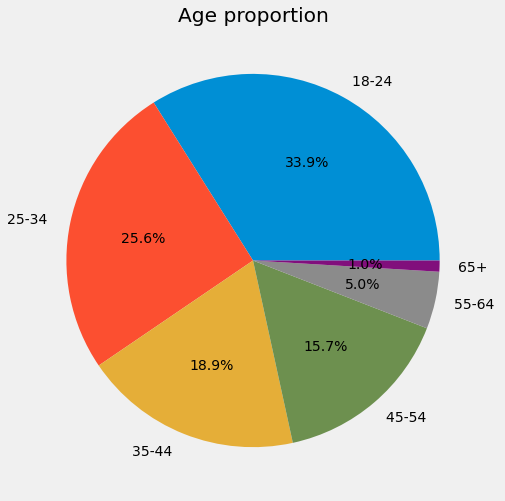

In [ ]:
def percentage(val):
    return str(round(val,1)) + "%"

age_grp = df.groupby('age')['ID']
age_grp.count().plot.pie(title='Age proportion', ylabel='', autopct=percentage, figsize = (20,8))

**Gender proportion**

<AxesSubplot:title={'center':'Gender proportion'}>

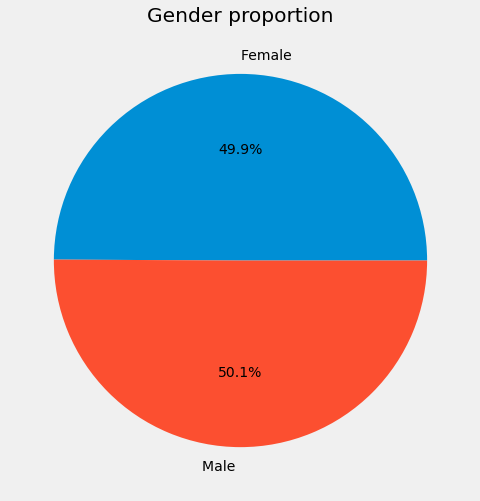

In [ ]:
age_grp = df.groupby('gender')['ID']
age_grp.count().plot.pie(title='Gender proportion', ylabel='', autopct=percentage, figsize = (20,8))

**Level of education**

<AxesSubplot:title={'center':'Education proportion'}>

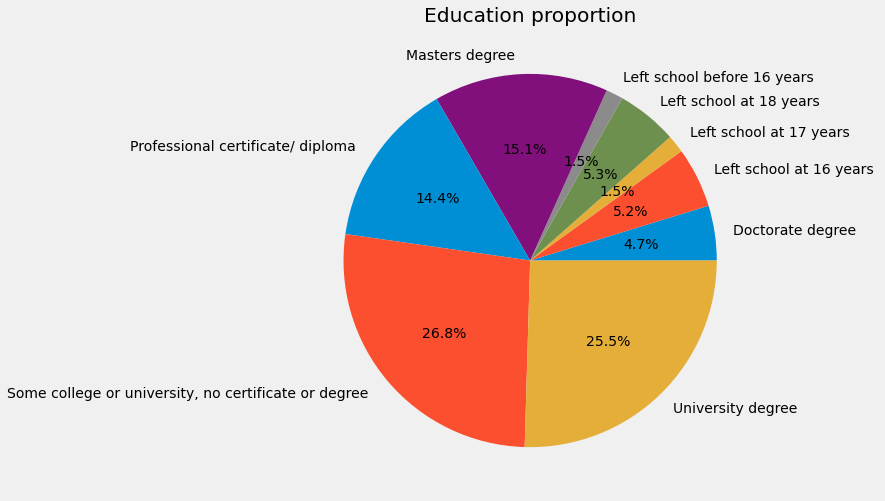

In [ ]:
age_grp = df.groupby('education')['ID']
age_grp.count().plot.pie(title='Education proportion', ylabel='', autopct=percentage, figsize = (20,8))

**Country of origin**

<AxesSubplot:title={'center':'Country of origin'}>

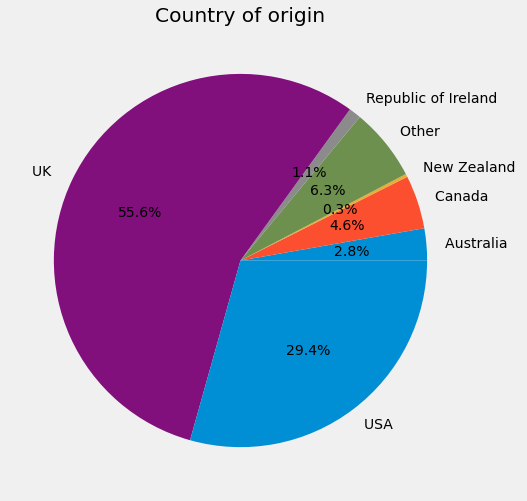

In [ ]:
age_grp = df.groupby('country')['ID']
age_grp.count().plot.pie(title='Country of origin', ylabel='', autopct=percentage, figsize = (20,8))

**Ethnicity**

<AxesSubplot:title={'center':'Ethnicity'}, xlabel='ethnicity', ylabel='Number of interrogated'>

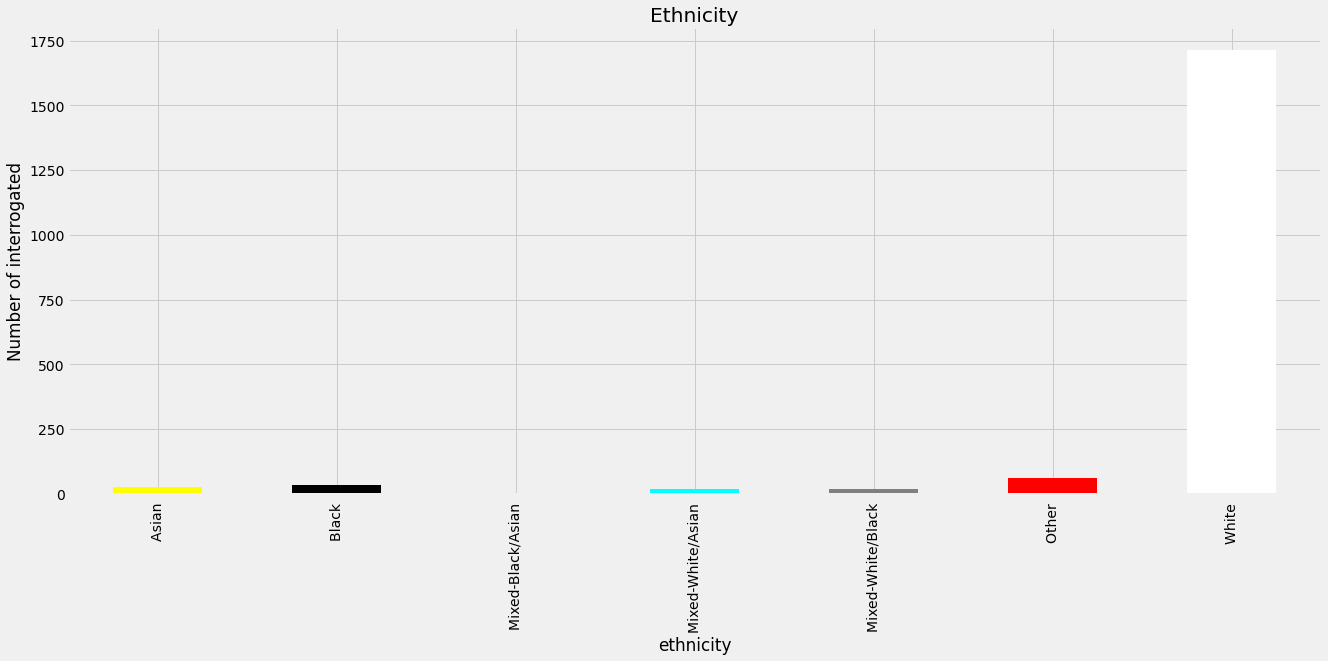

In [ ]:
age_grp = df.groupby('ethnicity')['ID']
age_grp.count().plot.bar(title='Ethnicity', ylabel='Number of interrogated', figsize = (20,8), color = ['yellow', 'black','orange', 'cyan', 'gray', 'red', 'white'])

**Personality**

Text(0.5, 1.0, 'NEO-FFI-R personality test distribution')

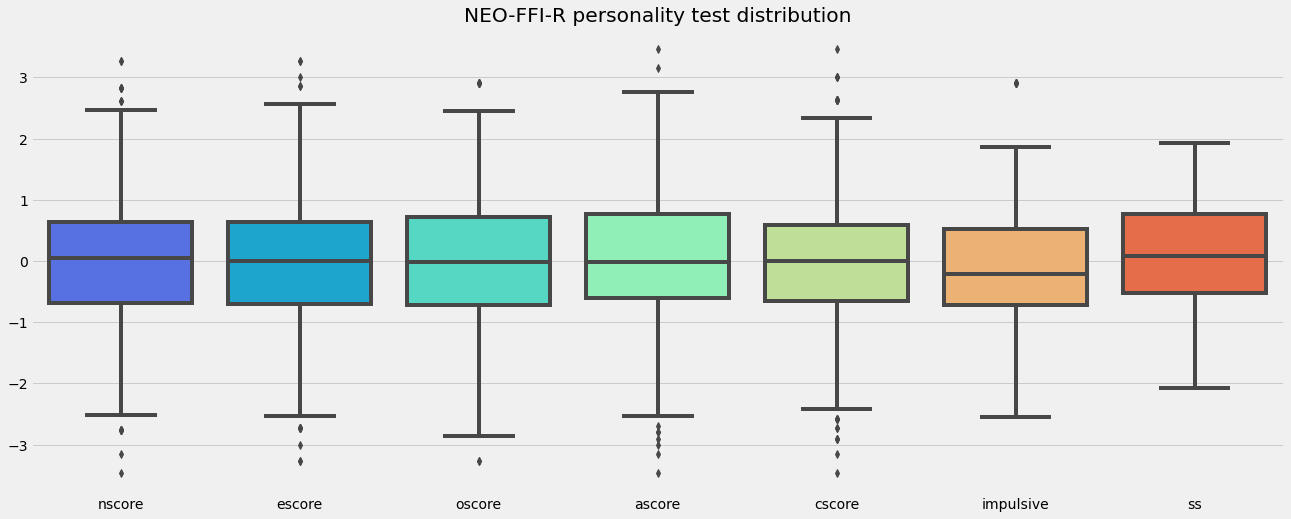

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df.drop(['ID','alcohol','amphet','amyl','benzos','caff','cannabis','choc','coke','crack','ecstasy','heroin','ketamine','legalh','lsd','meth','mushrooms','nicotine','semer','vsa'],axis=1),palette='rainbow')
ax.set_title('NEO-FFI-R personality test distribution')

**Addictions and drug use**

Text(0.5, 1.0, 'Addictions and drug use distribution')

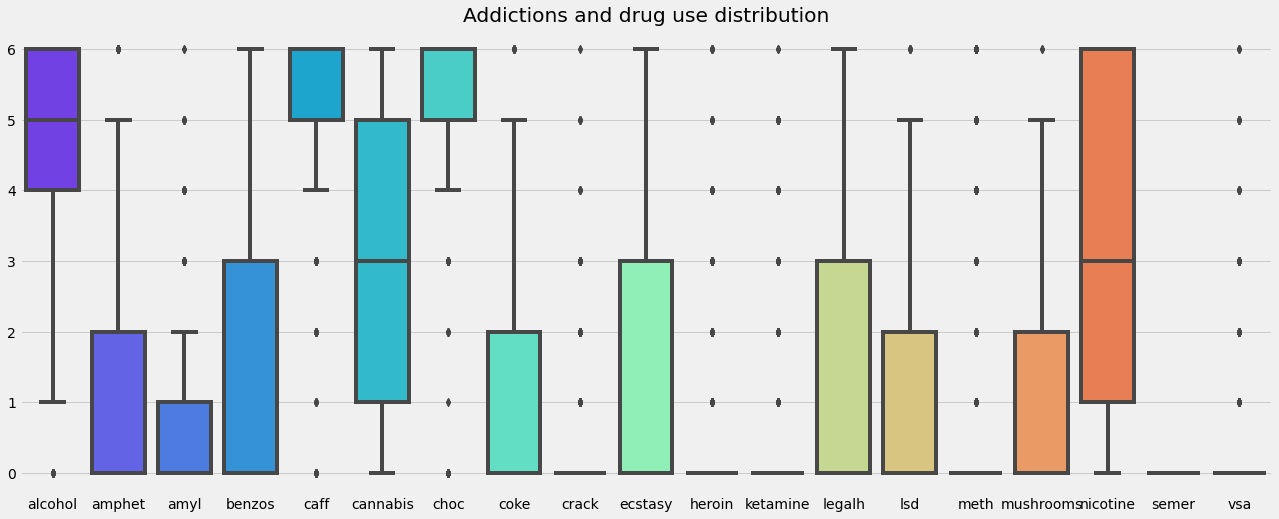

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df.drop(['ID','nscore','escore','oscore','ascore','cscore','impulsive','ss'],axis=1),palette='rainbow')
ax.set_title('Addictions and drug use distribution')

**Correlation of use between each drug**

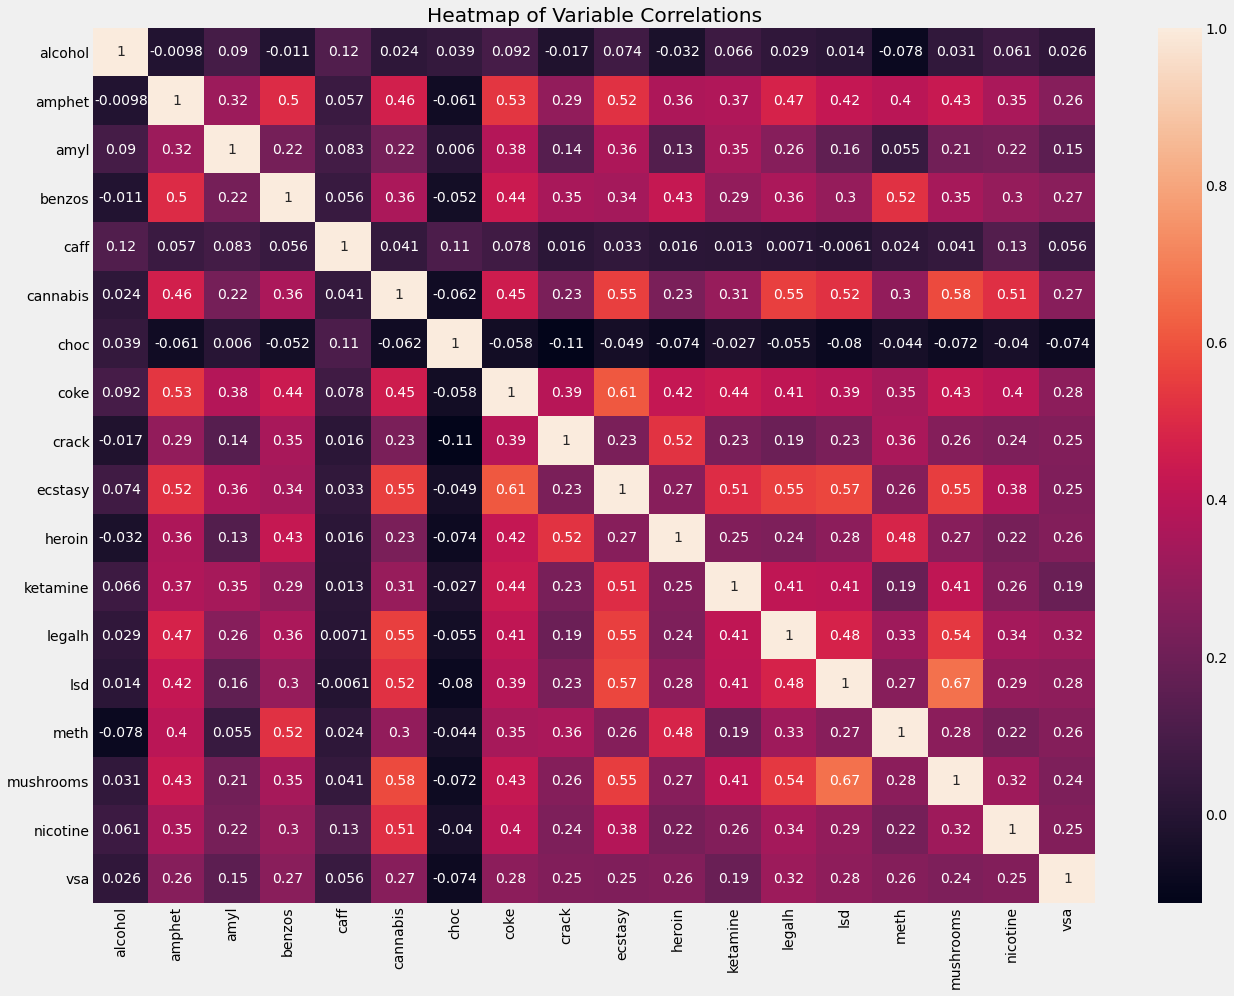

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df_Values.drop(['nscore','escore','oscore','ascore','cscore','impulsive','ss','semer'],axis=1).corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

# 2 - Age criteria

**Cigarette consumption by age and impulsiveness**

In [ ]:
table = pd.pivot_table(df, index = ['age'], columns=['nicotine'],values=['impulsive'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("Cigarette consumption by age and impulsiveness")

Text(0.5, 1.0, 'Cigarette consumption by age and impulsiveness')

**LSD consumption by age and Openess to experience**

Text(0.5, 1.0, 'LSD consumption by age and Openess to experience')

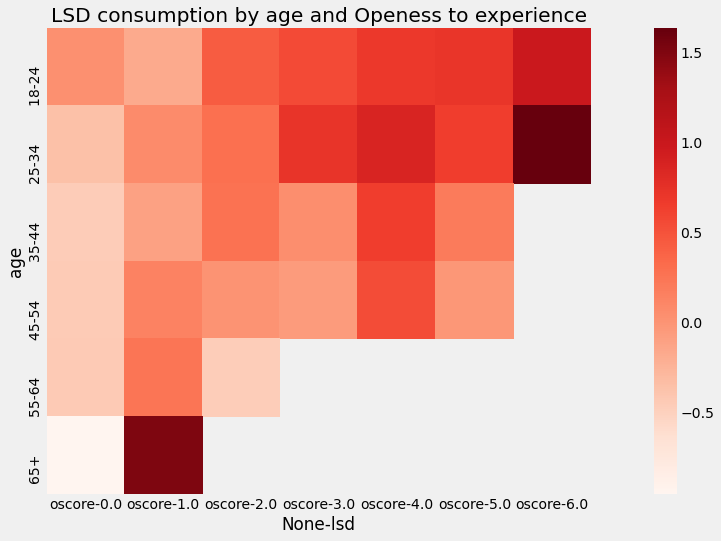

In [ ]:
table = pd.pivot_table(df, index = ['age'], columns=['lsd'],values=['oscore'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("LSD consumption by age and Openess to experience")

**Caffeine consumption by age and Neuroticism**

Text(0.5, 1.0, 'Caffeine consumption by age and Neuroticism')

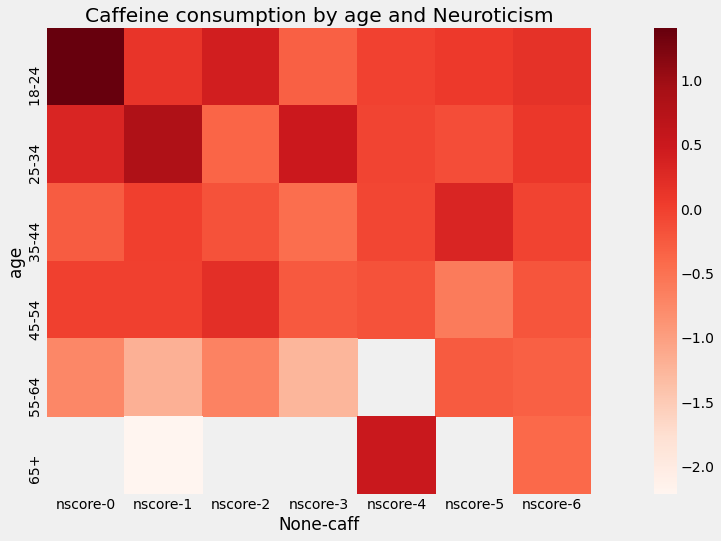

In [ ]:
table = pd.pivot_table(df, index = ['age'], columns=['caff'],values=['nscore'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("Caffeine consumption by age and Neuroticism")

**Legal addictions according to age**

Text(0, 0.5, 'Use')

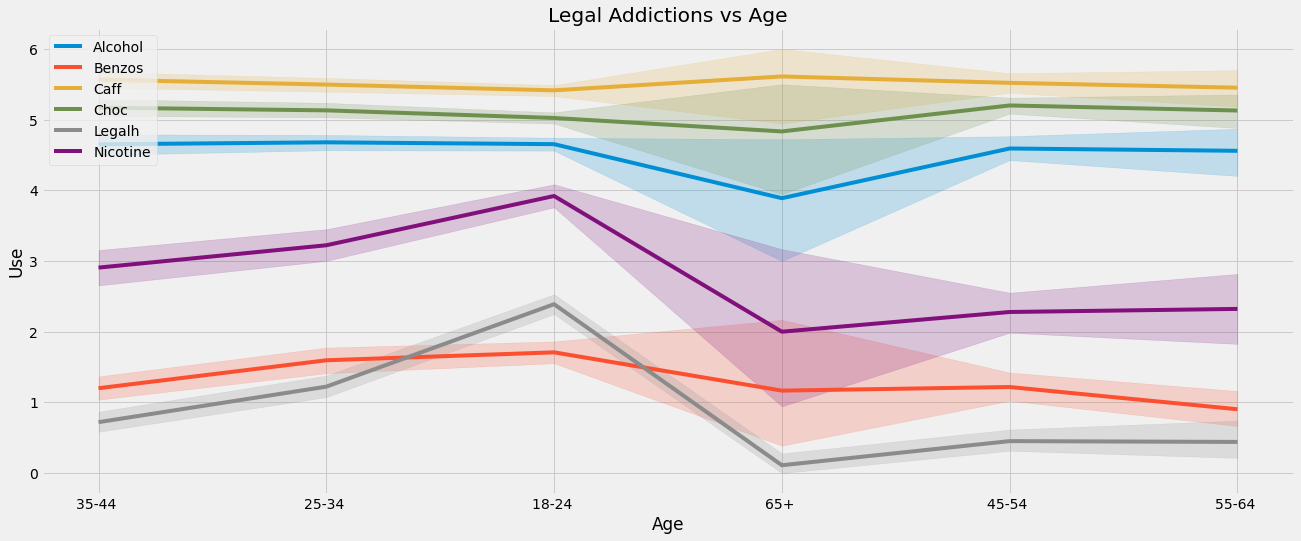

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df.age, y=df.alcohol, label='Alcohol')
sns.lineplot(x=df.age, y=df.benzos, label='Benzos')
sns.lineplot(x=df.age, y=df.caff, label='Caff')
sns.lineplot(x=df.age, y=df.choc, label='Choc')
sns.lineplot(x=df.age, y=df.legalh, label='Legalh')
sns.lineplot(x=df.age, y=df.nicotine, label='Nicotine')
plt.legend(loc='upper left')
plt.title('Legal Addictions vs Age')
plt.xlabel('Age')
plt.ylabel('Use')

**Light drugs addictions according to age**

Text(0, 0.5, 'Use')

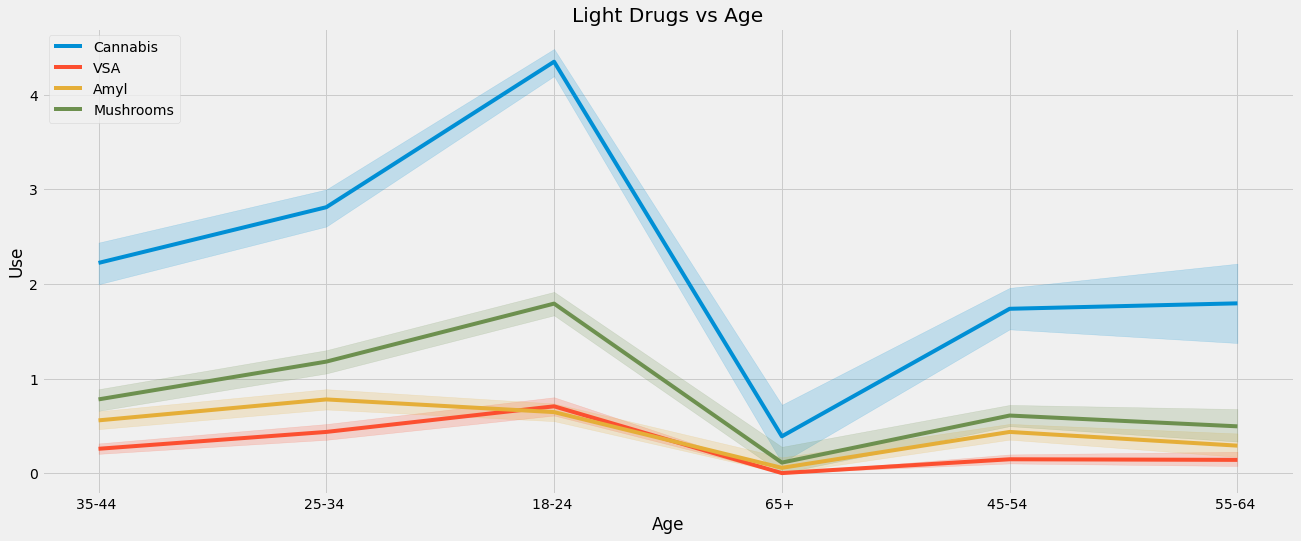

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df.age, y=df.cannabis, label='Cannabis')
sns.lineplot(x=df.age, y=df.vsa, label='VSA')
sns.lineplot(x=df.age, y=df.amyl, label='Amyl')
sns.lineplot(x=df.age, y=df.mushrooms, label='Mushrooms')
plt.legend(loc='upper left')
plt.title('Light Drugs vs Age')
plt.xlabel('Age')
plt.ylabel('Use')

**Hard drugs addictions according to age**

Text(0, 0.5, 'Use')

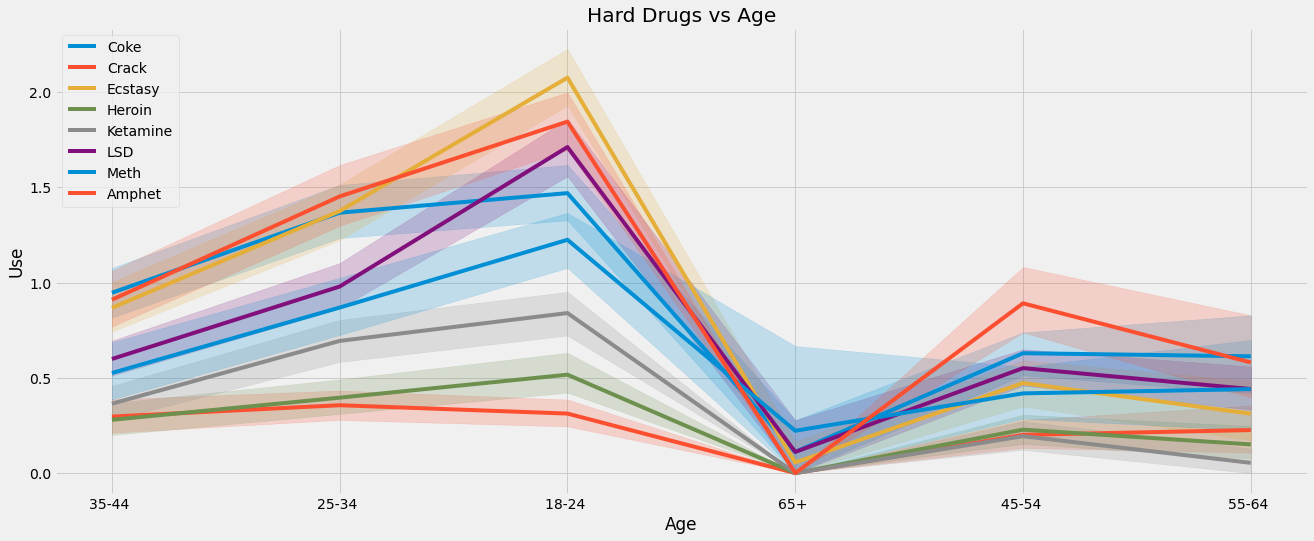

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df.age, y=df.coke, label='Coke')
sns.lineplot(x=df.age, y=df.crack, label='Crack')
sns.lineplot(x=df.age, y=df.ecstasy, label='Ecstasy')
sns.lineplot(x=df.age, y=df.heroin, label='Heroin')
sns.lineplot(x=df.age, y=df.ketamine, label='Ketamine')
sns.lineplot(x=df.age, y=df.lsd, label='LSD')
sns.lineplot(x=df.age, y=df.meth, label='Meth')
sns.lineplot(x=df.age, y=df.amphet, label='Amphet')
plt.legend(loc='upper left')
plt.title('Hard Drugs vs Age')
plt.xlabel('Age')
plt.ylabel('Use')

**Substances use by age**

<AxesSubplot:title={'center':'Substances use by age'}, xlabel='Age', ylabel='Frequency of use'>

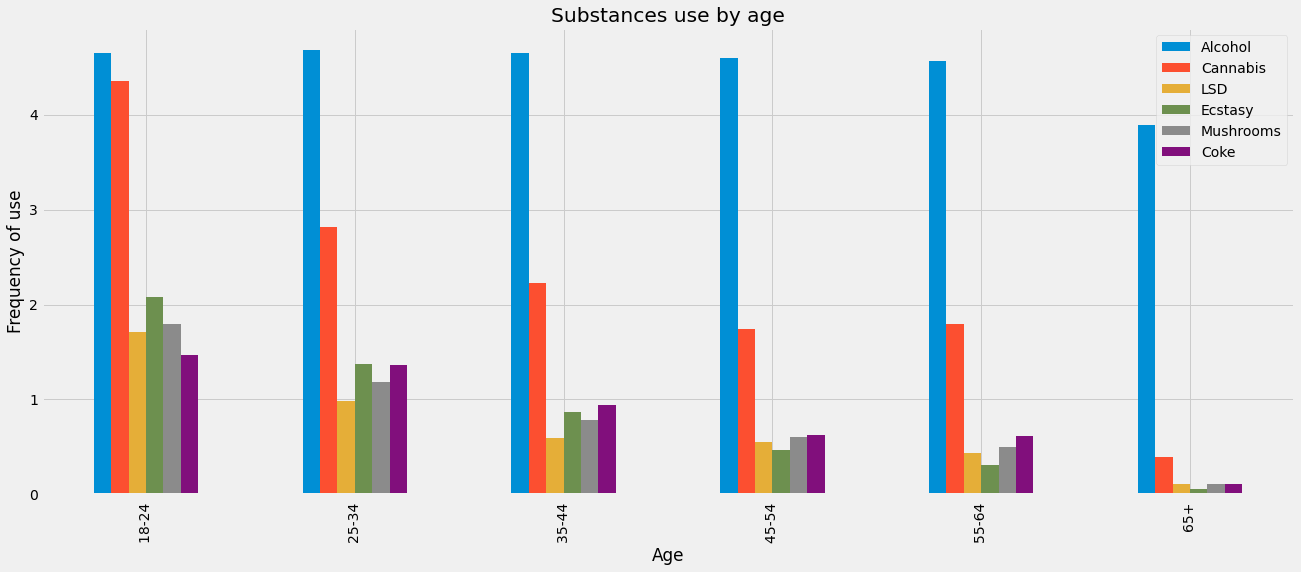

In [ ]:
alcohol = df.groupby('age')['alcohol'].mean()
cannabis = df.groupby('age')['cannabis'].mean()
lsd = df.groupby('age')['lsd'].mean()
ecsta = df.groupby('age')['ecstasy'].mean()
mushrooms = df.groupby('age')['mushrooms'].mean()
coke = df.groupby('age')['coke'].mean()
drugs = pd.DataFrame({'Alcohol':alcohol, 'Cannabis':cannabis, 'LSD':lsd, 'Ecstasy':ecsta, 'Mushrooms':mushrooms, 'Coke':coke})
drugs.plot.bar(title='Substances use by age' ,xlabel='Age', ylabel='Frequency of use', figsize=(20,8))

**Personnality by age**

<AxesSubplot:title={'center':'Personalities and mentalities by age'}, xlabel='Age', ylabel='Personality traits'>

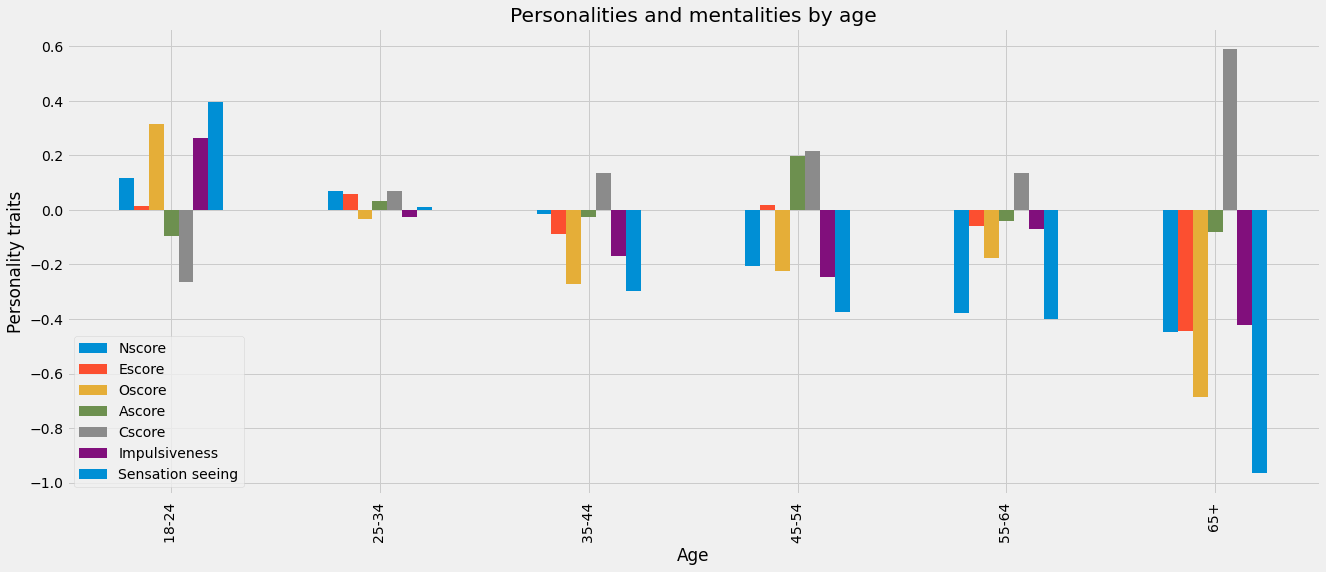

In [ ]:
nscore = df.groupby('age')['nscore'].mean()
escore = df.groupby('age')['escore'].mean()
oscore = df.groupby('age')['oscore'].mean()
ascore = df.groupby('age')['ascore'].mean()
cscore = df.groupby('age')['cscore'].mean()
impulsive = df.groupby('age')['impulsive'].mean()
ss = df.groupby('age')['ss'].mean()
perso = pd.DataFrame({'Nscore':nscore,'Escore':escore,'Oscore':oscore,'Ascore':ascore,'Cscore':cscore,'Impulsiveness':impulsive,'Sensation seeing':ss})
perso.plot.bar(title='Personalities and mentalities by age' ,xlabel='Age', ylabel='Personality traits', figsize=(20,8))

## 3 - Education criteria

**Cigarette consumption by education and Neuroticism**

Text(0.5, 1.0, 'Cigarette consumption by education and Neuroticism')

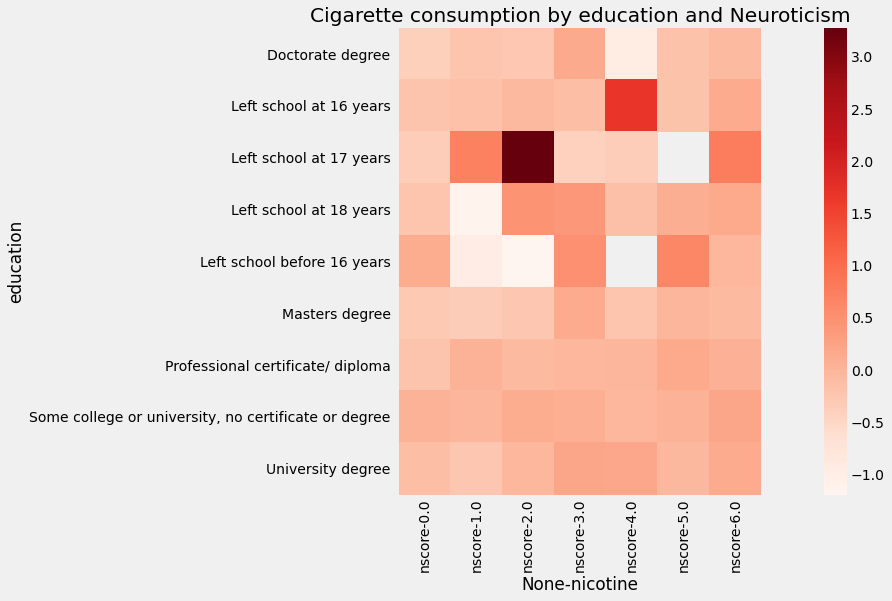

In [ ]:
table = pd.pivot_table(df, index = ['education'], columns=['nicotine'],values=['nscore'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("Cigarette consumption by education and Neuroticism")

**LSD consumption by age and Openess to experience**

Text(0.5, 1.0, 'LSD consumption by age and Openess to experience')

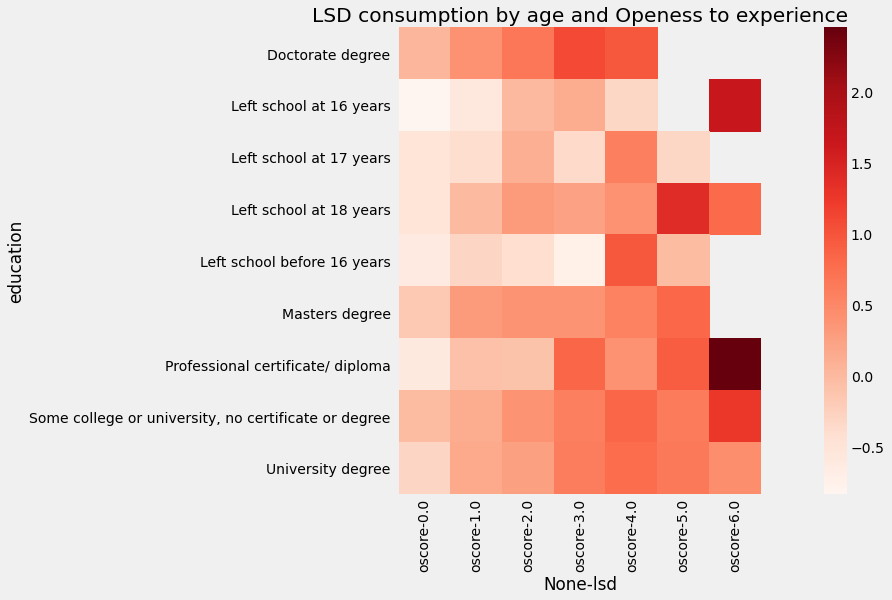

In [ ]:
table = pd.pivot_table(df, index = ['education'], columns=['lsd'],values=['oscore'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("LSD consumption by age and Openess to experience")

**Caffeine consumption by education and Neuroticism**

Text(0.5, 1.0, 'Caffeine consumption by education and Neuroticism')

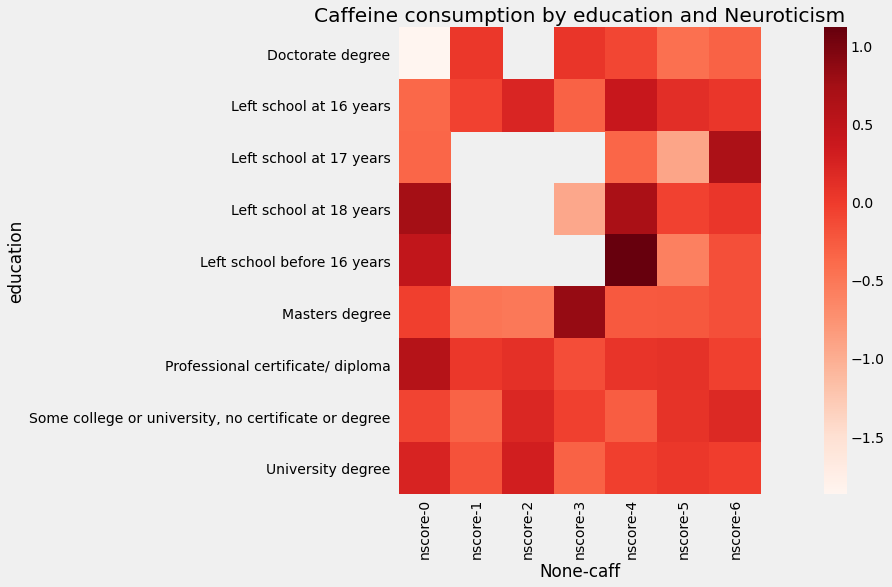

In [ ]:
table = pd.pivot_table(df, index = ['education'], columns=['caff'],values=['nscore'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("Caffeine consumption by education and Neuroticism")

**Legal addictions according to education**

Text(0, 0.5, 'Use')

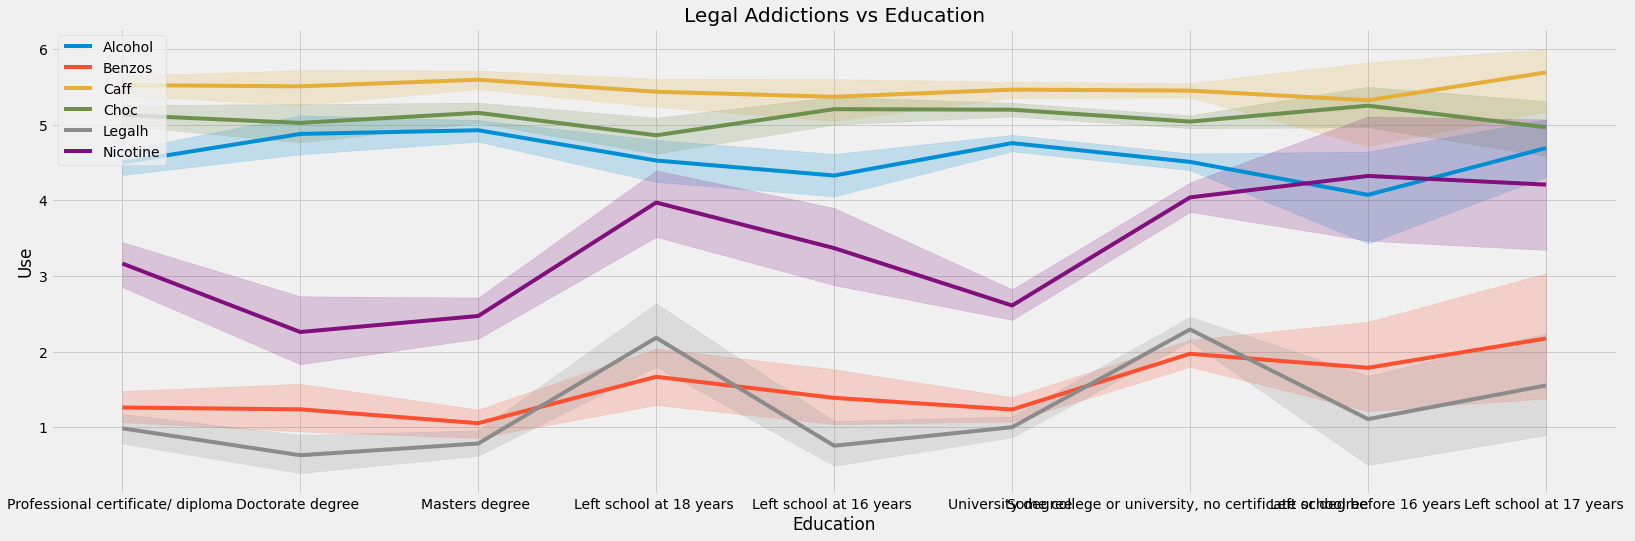

In [ ]:
plt.figure(figsize=(25,8))
sns.lineplot(x=df.education, y=df.alcohol, label='Alcohol')
sns.lineplot(x=df.education, y=df.benzos, label='Benzos')
sns.lineplot(x=df.education, y=df.caff, label='Caff')
sns.lineplot(x=df.education, y=df.choc, label='Choc')
sns.lineplot(x=df.education, y=df.legalh, label='Legalh')
sns.lineplot(x=df.education, y=df.nicotine, label='Nicotine')
plt.legend(loc='upper left')
plt.title('Legal Addictions vs Education')
plt.xlabel('Education')
plt.ylabel('Use')

**Light drugs addictions according to education**

Text(0, 0.5, 'Use')

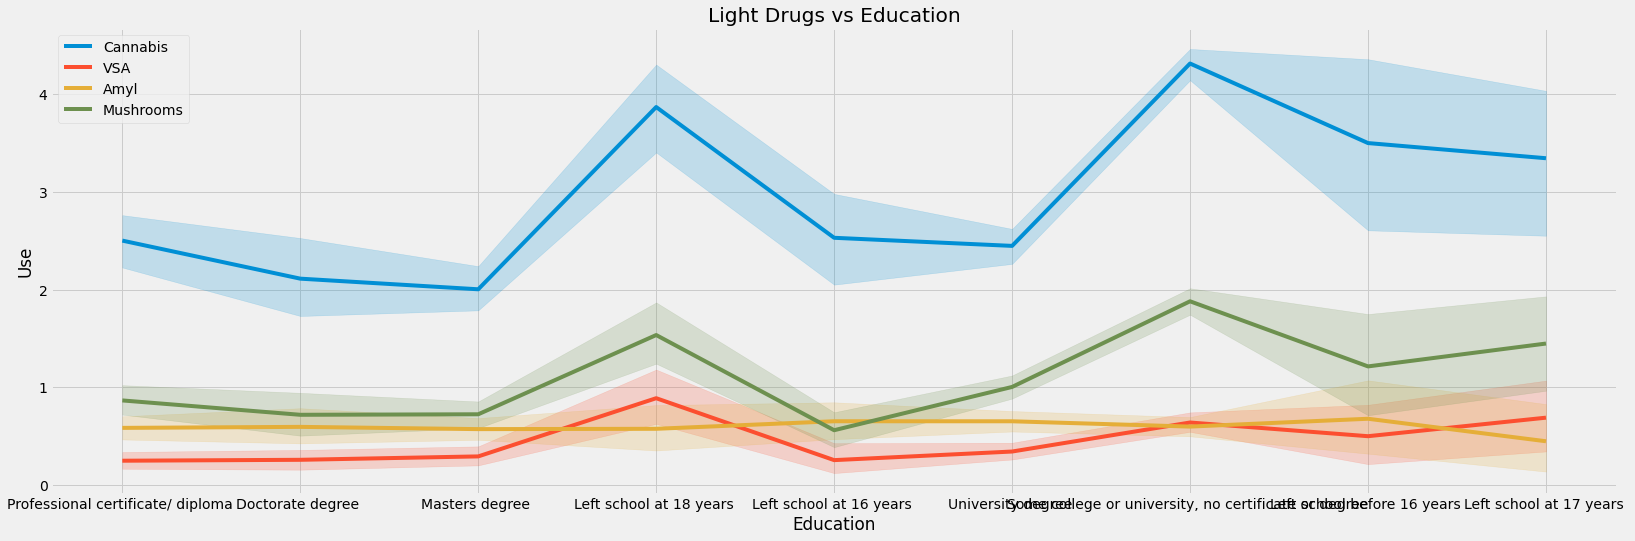

In [ ]:
plt.figure(figsize=(25,8))
sns.lineplot(x=df.education, y=df.cannabis, label='Cannabis')
sns.lineplot(x=df.education, y=df.vsa, label='VSA')
sns.lineplot(x=df.education, y=df.amyl, label='Amyl')
sns.lineplot(x=df.education, y=df.mushrooms, label='Mushrooms')
plt.legend(loc='upper left')
plt.title('Light Drugs vs Education')
plt.xlabel('Education')
plt.ylabel('Use')

**Hard drugs addictions according to education**

Text(0, 0.5, 'Use')

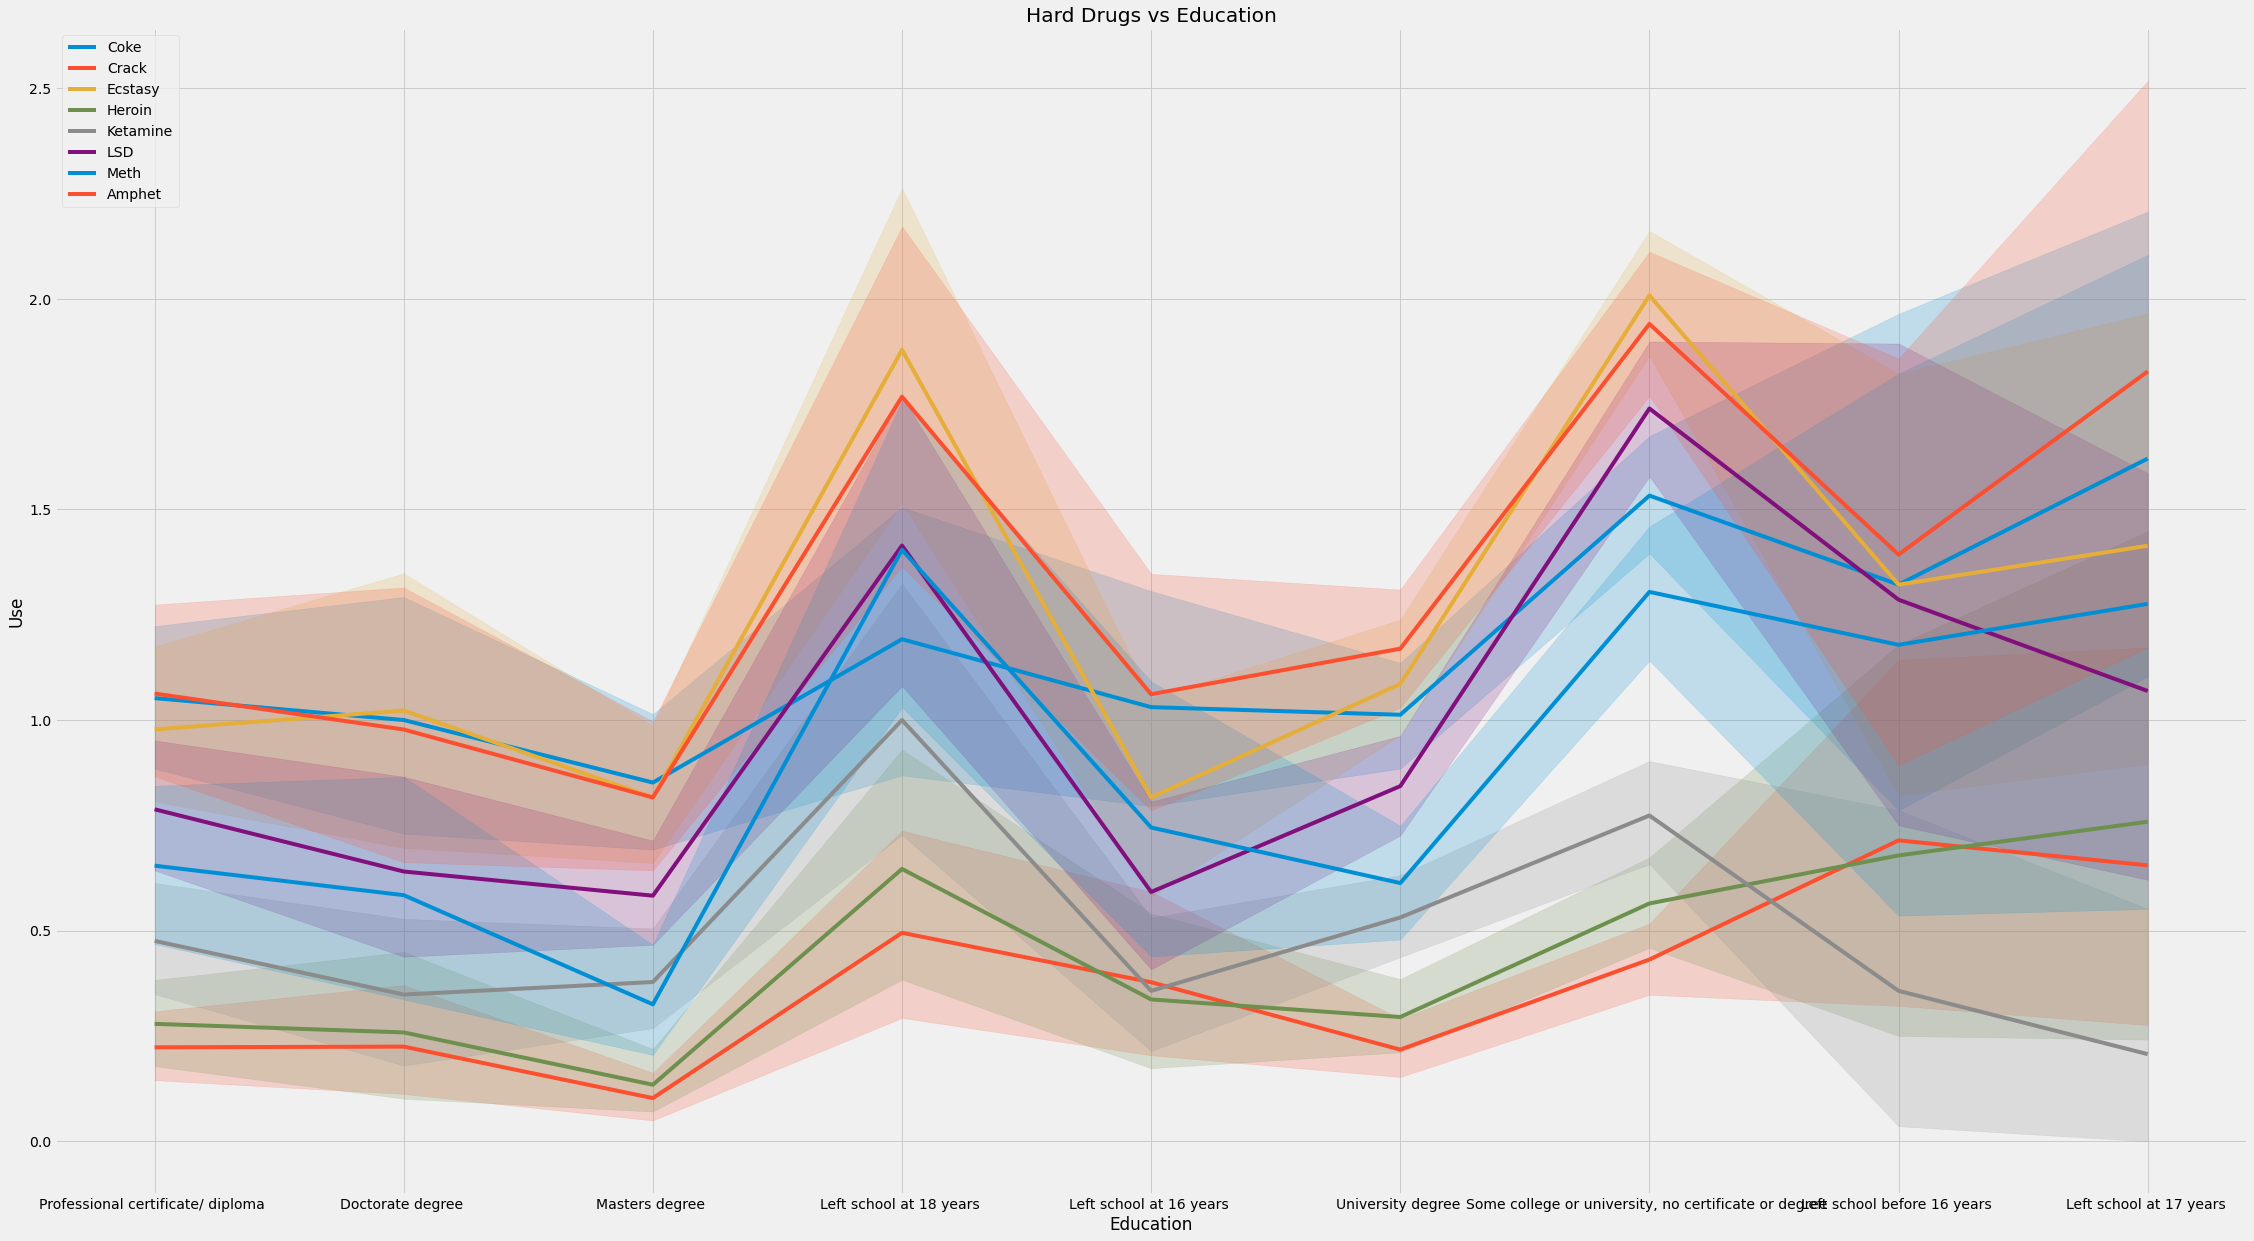

In [ ]:
plt.figure(figsize=(35,20))
sns.lineplot(x=df.education, y=df.coke, label='Coke')
sns.lineplot(x=df.education, y=df.crack, label='Crack')
sns.lineplot(x=df.education, y=df.ecstasy, label='Ecstasy')
sns.lineplot(x=df.education, y=df.heroin, label='Heroin')
sns.lineplot(x=df.education, y=df.ketamine, label='Ketamine')
sns.lineplot(x=df.education, y=df.lsd, label='LSD')
sns.lineplot(x=df.education, y=df.meth, label='Meth')
sns.lineplot(x=df.education, y=df.amphet, label='Amphet')
plt.legend(loc='upper left')
plt.title('Hard Drugs vs Education')
plt.xlabel('Education')
plt.ylabel('Use')

**Substances use by education**

<AxesSubplot:title={'center':'Substances use by education'}, xlabel='Education', ylabel='Frequency of use'>

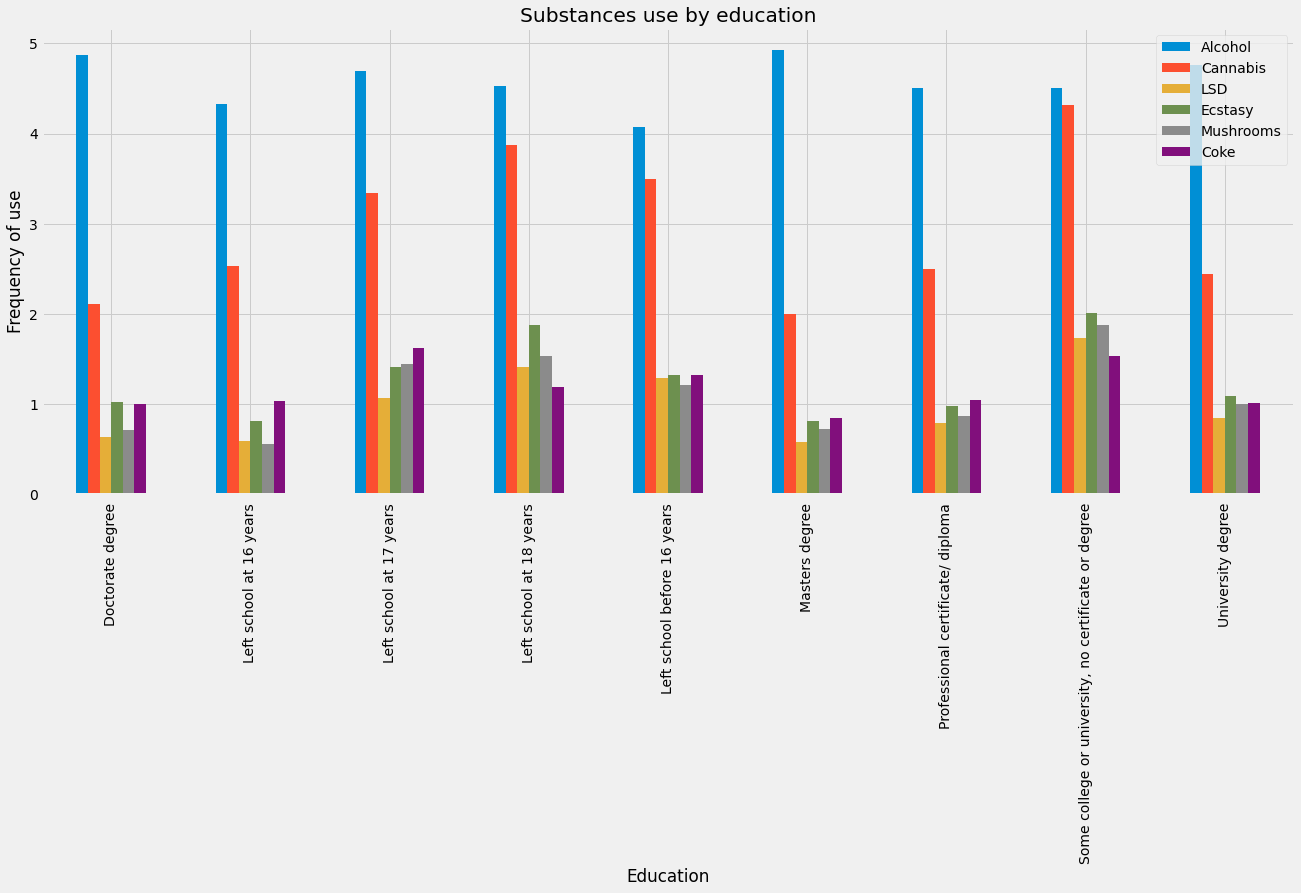

In [ ]:
alcohol = df.groupby('education')['alcohol'].mean()
cannabis = df.groupby('education')['cannabis'].mean()
lsd = df.groupby('education')['lsd'].mean()
ecsta = df.groupby('education')['ecstasy'].mean()
mushrooms = df.groupby('education')['mushrooms'].mean()
coke = df.groupby('education')['coke'].mean()
drugs = pd.DataFrame({'Alcohol':alcohol, 'Cannabis':cannabis, 'LSD':lsd, 'Ecstasy':ecsta, 'Mushrooms':mushrooms, 'Coke':coke})
drugs.plot.bar(title='Substances use by education' ,xlabel='Education', ylabel='Frequency of use', figsize=(20,8))

**Personalities and mentalities by education**

<AxesSubplot:title={'center':'Personalities and mentalities by education'}, xlabel='Education', ylabel='Personality traits'>

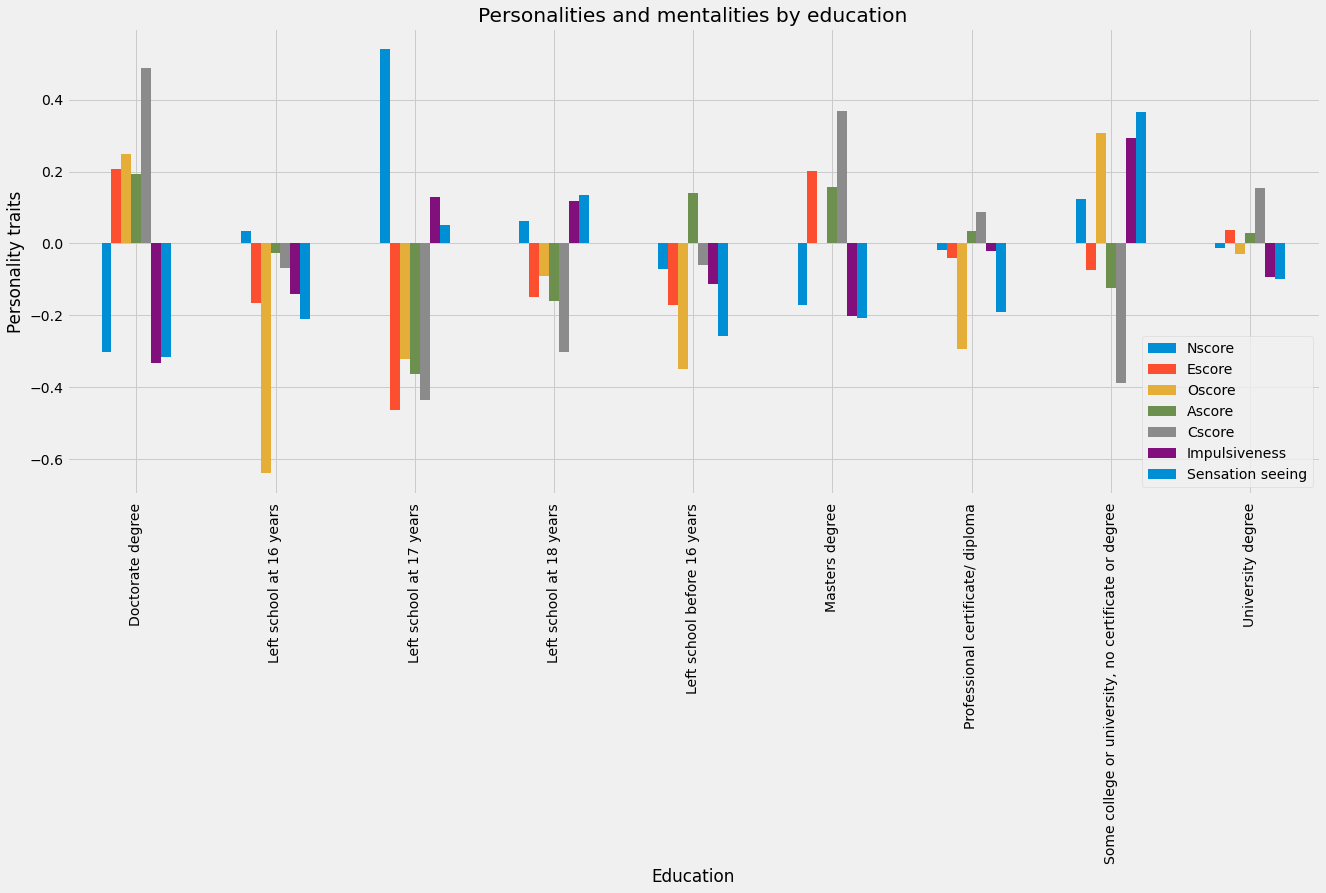

In [ ]:
nscore = df.groupby('education')['nscore'].mean()
escore = df.groupby('education')['escore'].mean()
oscore = df.groupby('education')['oscore'].mean()
ascore = df.groupby('education')['ascore'].mean()
cscore = df.groupby('education')['cscore'].mean()
impulsive = df.groupby('education')['impulsive'].mean()
ss = df.groupby('education')['ss'].mean()
perso = pd.DataFrame({'Nscore':nscore,'Escore':escore,'Oscore':oscore,'Ascore':ascore,'Cscore':cscore,'Impulsiveness':impulsive,'Sensation seeing':ss})
perso.plot.bar(title='Personalities and mentalities by education' ,xlabel='Education', ylabel='Personality traits', figsize=(20,8))

## 4 - Gender criteria

**Cigarette consumption by gender and impulsiveness**

Text(0.5, 1.0, 'Cigarette consumption by gender and impulsiveness')

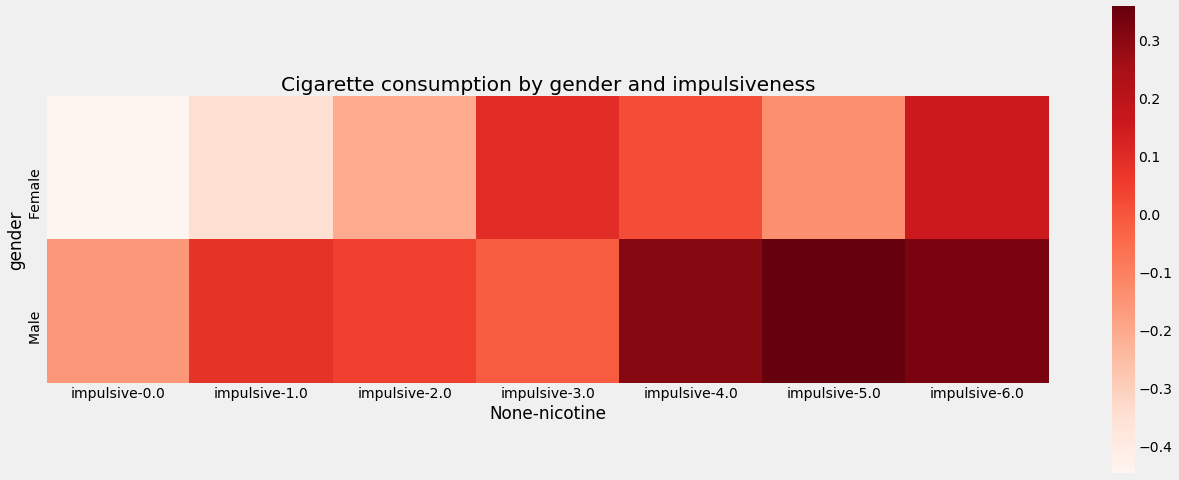

In [ ]:
table = pd.pivot_table(df, index = ['gender'], columns=['nicotine'],values=['impulsive'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("Cigarette consumption by gender and impulsiveness")

**LSD consumption by gender and Openess to experience**

Text(0.5, 1.0, 'LSD consumption by gender and Openess to experience')

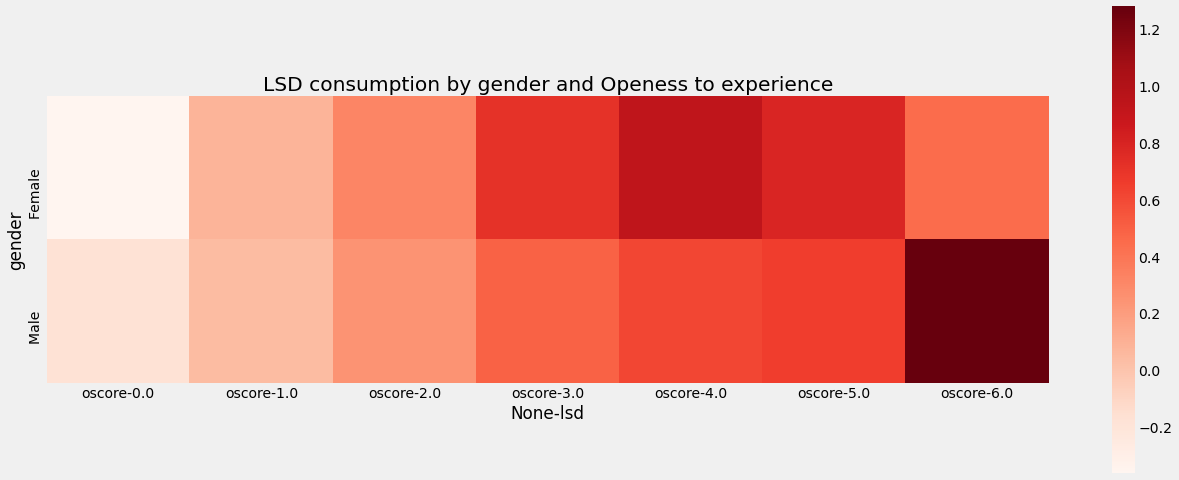

In [ ]:
table = pd.pivot_table(df, index = ['gender'], columns=['lsd'],values=['oscore'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("LSD consumption by gender and Openess to experience")

**Caffeine consumption by gender and Neuroticism**

Text(0.5, 1.0, 'Caffeine consumption by gender and Neuroticism')

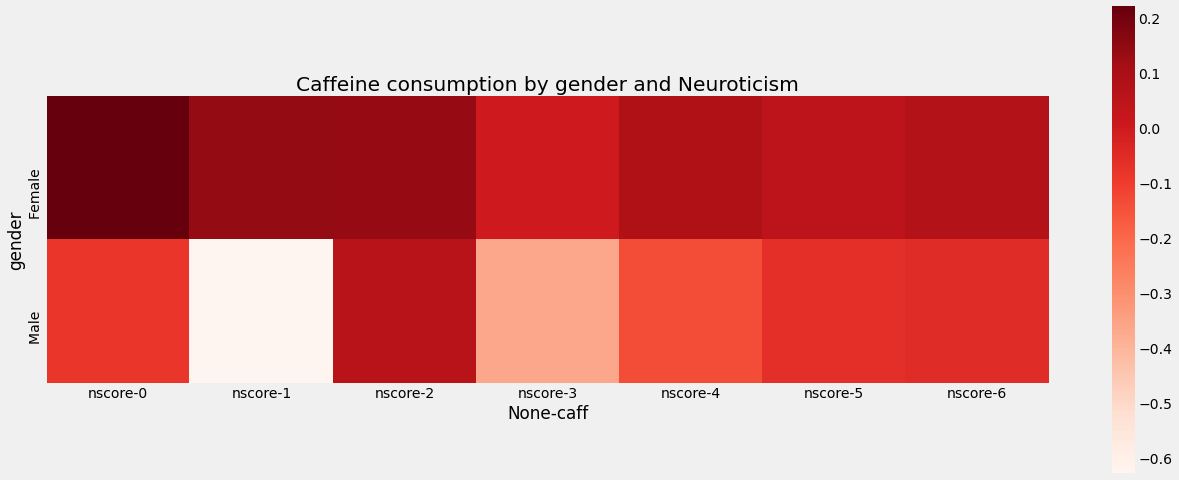

In [ ]:
table = pd.pivot_table(df, index = ['gender'], columns=['caff'],values=['nscore'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("Caffeine consumption by gender and Neuroticism")

**Legal addictions according to gender**

Text(0, 0.5, 'Use')

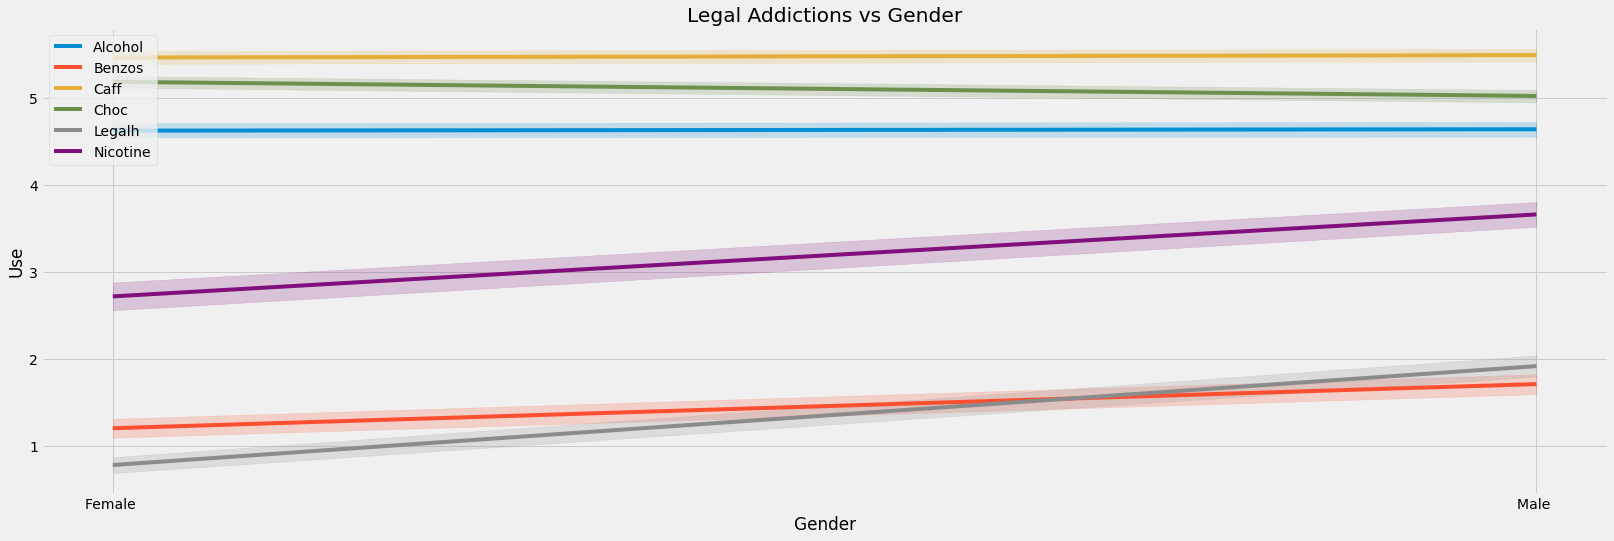

In [ ]:
plt.figure(figsize=(25,8))
sns.lineplot(x=df.gender, y=df.alcohol, label='Alcohol')
sns.lineplot(x=df.gender, y=df.benzos, label='Benzos')
sns.lineplot(x=df.gender, y=df.caff, label='Caff')
sns.lineplot(x=df.gender, y=df.choc, label='Choc')
sns.lineplot(x=df.gender, y=df.legalh, label='Legalh')
sns.lineplot(x=df.gender, y=df.nicotine, label='Nicotine')
plt.legend(loc='upper left')
plt.title('Legal Addictions vs Gender')
plt.xlabel('Gender')
plt.ylabel('Use')

**Light drugs addictions according to gender**

Text(0, 0.5, 'Use')

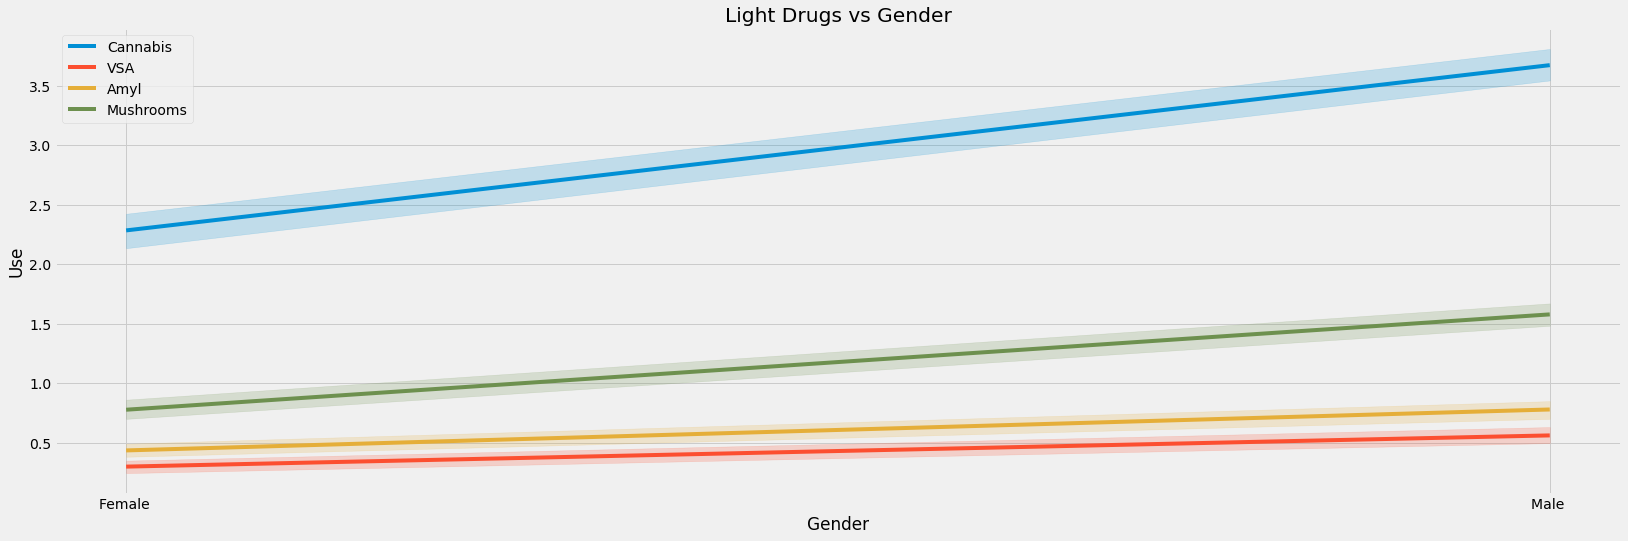

In [ ]:
plt.figure(figsize=(25,8))
sns.lineplot(x=df.gender, y=df.cannabis, label='Cannabis')
sns.lineplot(x=df.gender, y=df.vsa, label='VSA')
sns.lineplot(x=df.gender, y=df.amyl, label='Amyl')
sns.lineplot(x=df.gender, y=df.mushrooms, label='Mushrooms')
plt.legend(loc='upper left')
plt.title('Light Drugs vs Gender')
plt.xlabel('Gender')
plt.ylabel('Use')

**Hard drugs addictions according to gender**

Text(0, 0.5, 'Use')

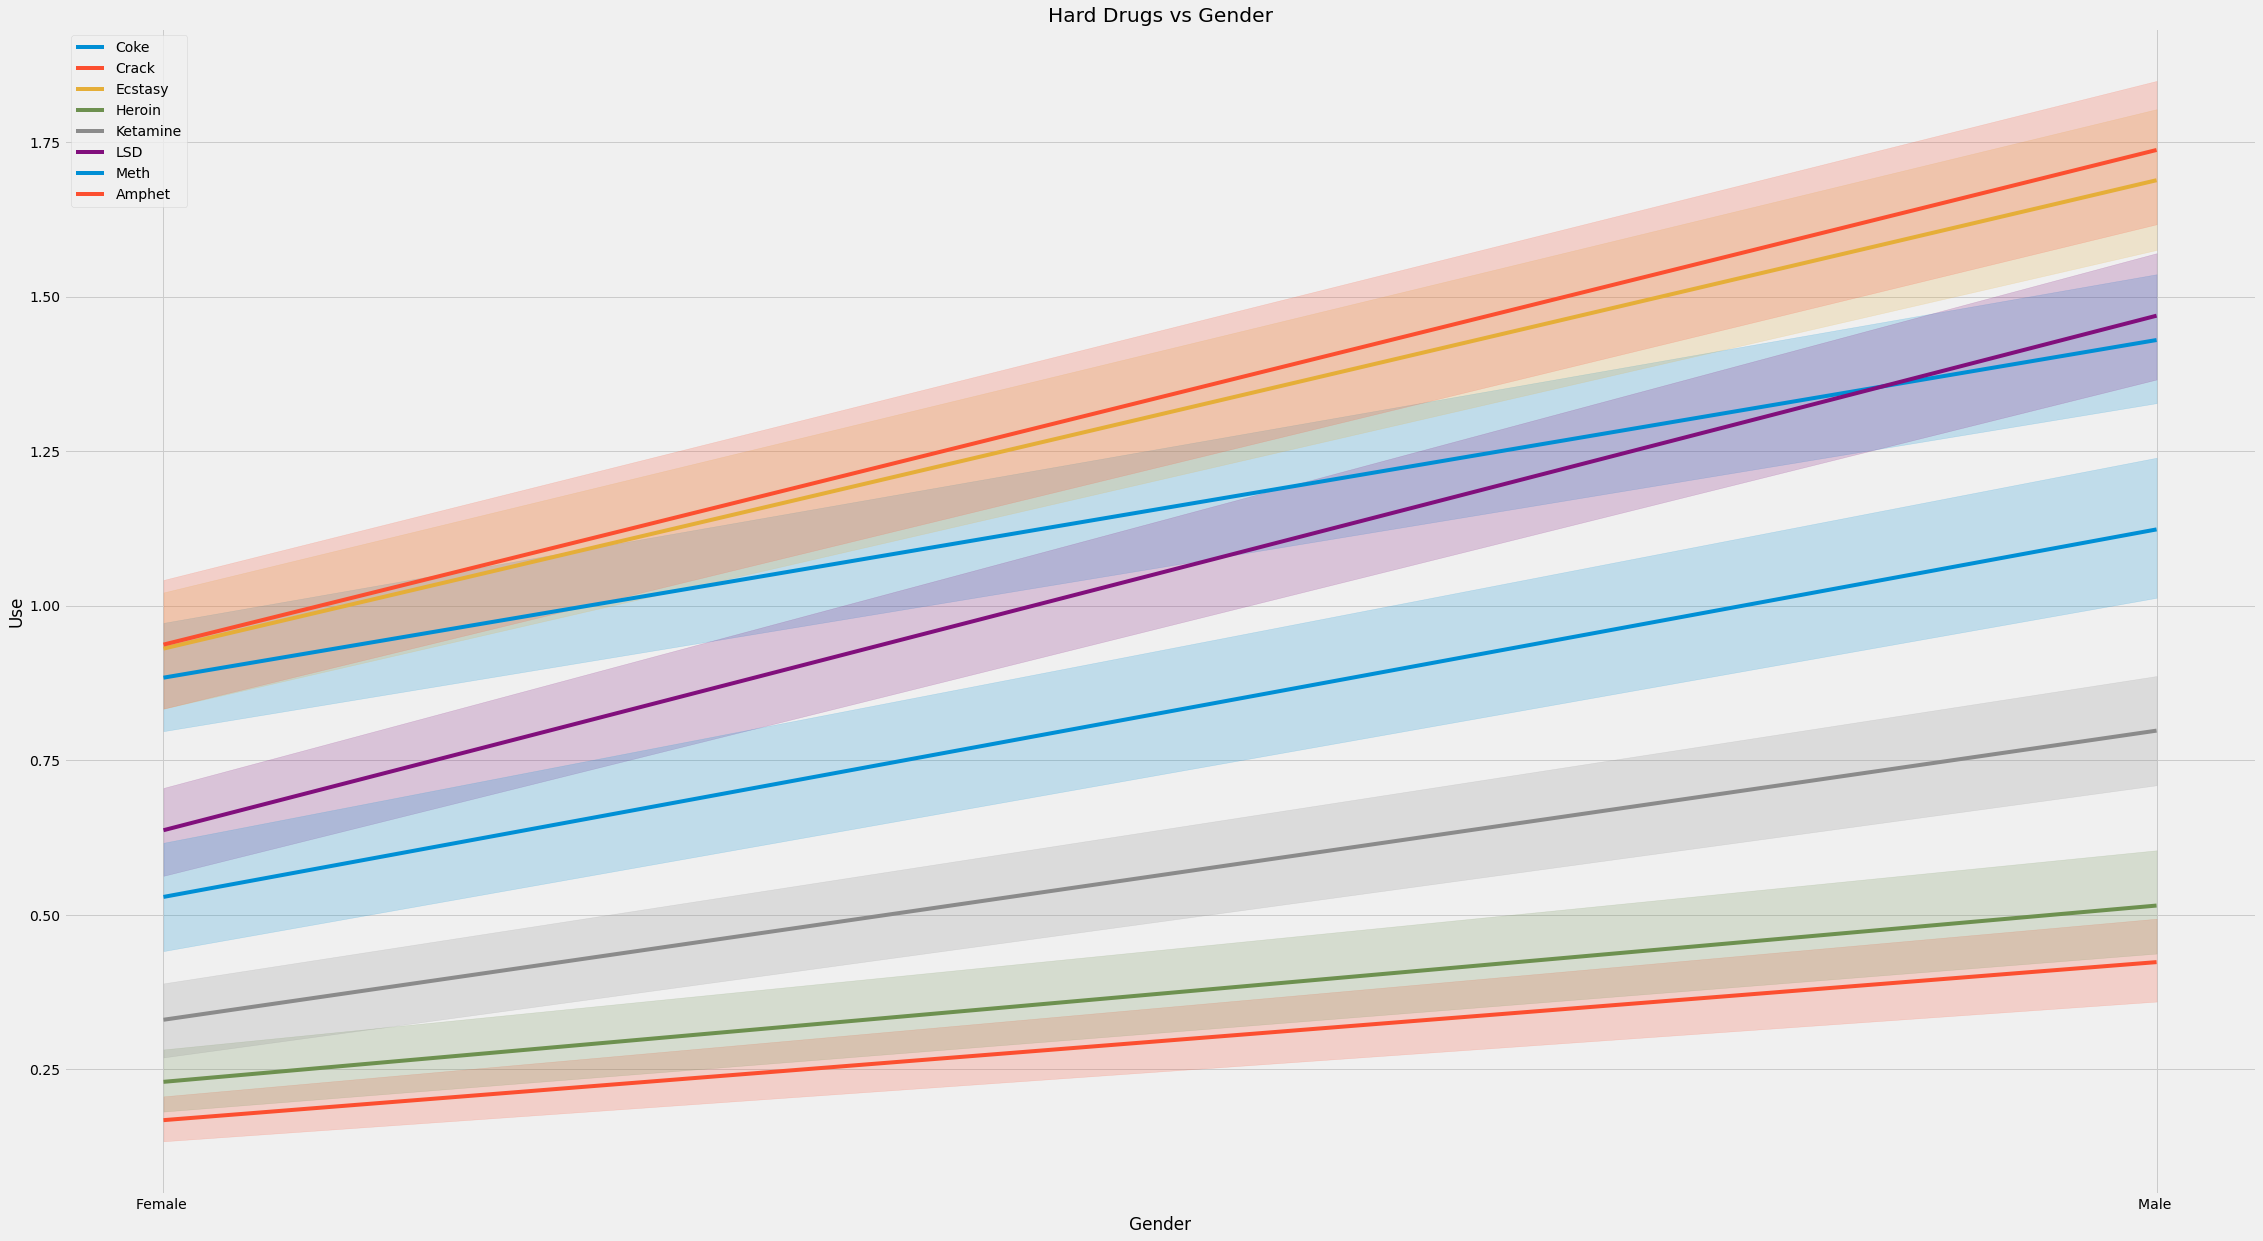

In [ ]:
plt.figure(figsize=(35,20))
sns.lineplot(x=df.gender, y=df.coke, label='Coke')
sns.lineplot(x=df.gender, y=df.crack, label='Crack')
sns.lineplot(x=df.gender, y=df.ecstasy, label='Ecstasy')
sns.lineplot(x=df.gender, y=df.heroin, label='Heroin')
sns.lineplot(x=df.gender, y=df.ketamine, label='Ketamine')
sns.lineplot(x=df.gender, y=df.lsd, label='LSD')
sns.lineplot(x=df.gender, y=df.meth, label='Meth')
sns.lineplot(x=df.gender, y=df.amphet, label='Amphet')
plt.legend(loc='upper left')
plt.title('Hard Drugs vs Gender')
plt.xlabel('Gender')
plt.ylabel('Use')

**Substances use by gender**

<AxesSubplot:title={'center':'Substances use by gender'}, xlabel='Gender', ylabel='Frequency of use'>

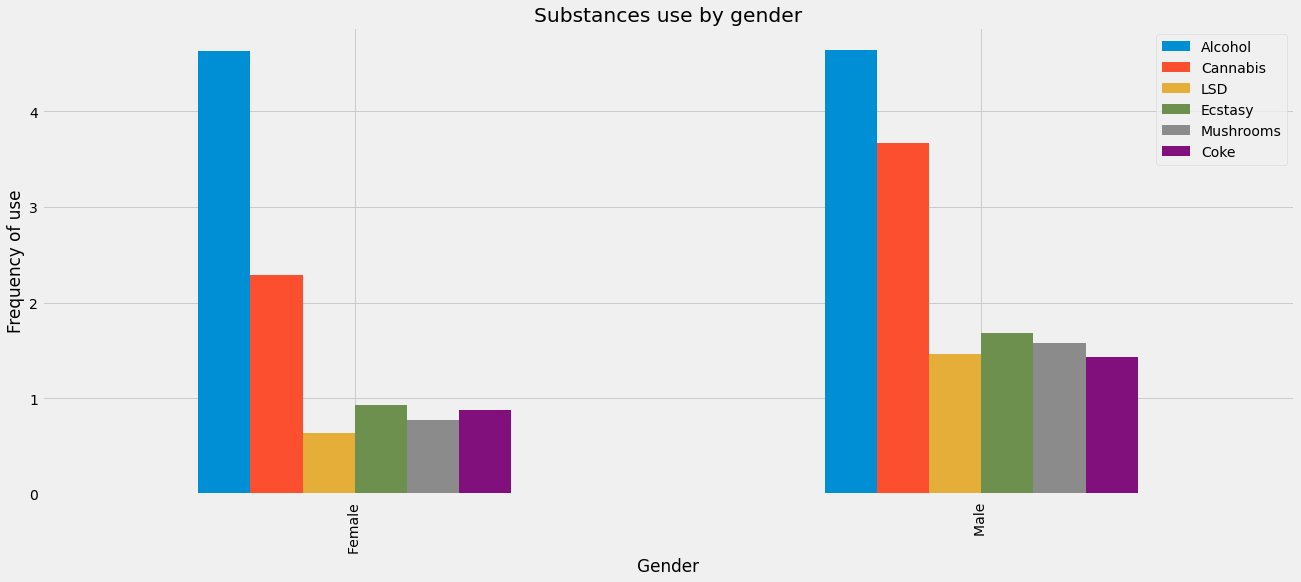

In [ ]:
alcohol = df.groupby('gender')['alcohol'].mean()
cannabis = df.groupby('gender')['cannabis'].mean()
lsd = df.groupby('gender')['lsd'].mean()
ecsta = df.groupby('gender')['ecstasy'].mean()
mushrooms = df.groupby('gender')['mushrooms'].mean()
coke = df.groupby('gender')['coke'].mean()
drugs = pd.DataFrame({'Alcohol':alcohol, 'Cannabis':cannabis, 'LSD':lsd, 'Ecstasy':ecsta, 'Mushrooms':mushrooms, 'Coke':coke})
drugs.plot.bar(title='Substances use by gender' ,xlabel='Gender', ylabel='Frequency of use', figsize=(20,8))

**Personalities and mentalities by gender**

<AxesSubplot:title={'center':'Personalities and mentalities by gender'}, xlabel='Gender', ylabel='Personality traits'>

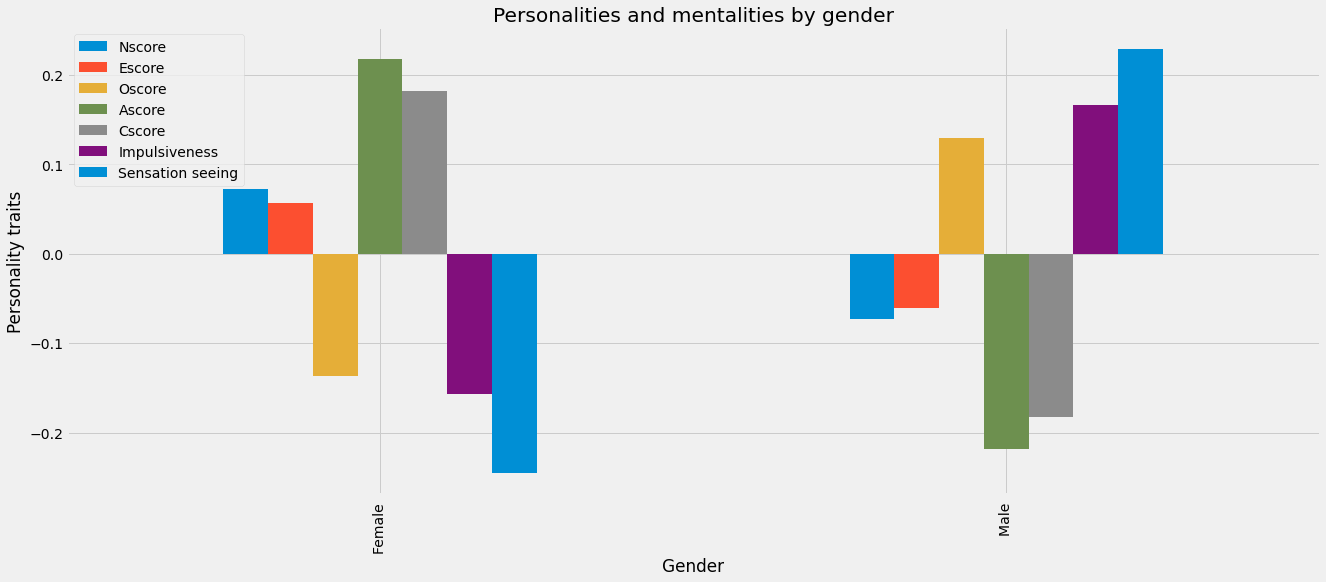

In [ ]:
nscore = df.groupby('gender')['nscore'].mean()
escore = df.groupby('gender')['escore'].mean()
oscore = df.groupby('gender')['oscore'].mean()
ascore = df.groupby('gender')['ascore'].mean()
cscore = df.groupby('gender')['cscore'].mean()
impulsive = df.groupby('gender')['impulsive'].mean()
ss = df.groupby('gender')['ss'].mean()
perso = pd.DataFrame({'Nscore':nscore,'Escore':escore,'Oscore':oscore,'Ascore':ascore,'Cscore':cscore,'Impulsiveness':impulsive,'Sensation seeing':ss})
perso.plot.bar(title='Personalities and mentalities by gender' ,xlabel='Gender', ylabel='Personality traits', figsize=(20,8))

## 5 - Country criteria

**Cigarette consumption by country and impulsiveness**

Text(0.5, 1.0, 'Cigarette consumption by country and impulsiveness')

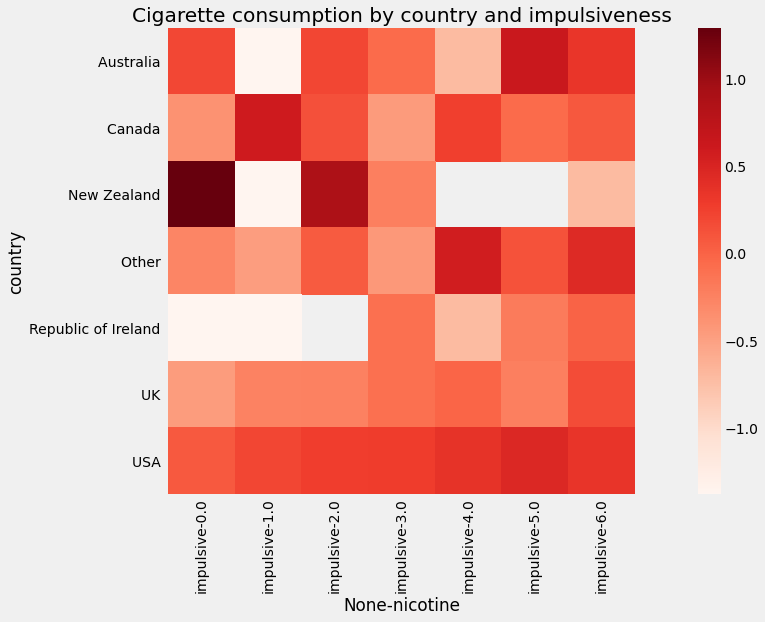

In [ ]:
table = pd.pivot_table(df, index = ['country'], columns=['nicotine'],values=['impulsive'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("Cigarette consumption by country and impulsiveness")

**LSD consumption by country and Openess to experience**

Text(0.5, 1.0, 'LSD consumption by country and Openess to experience')

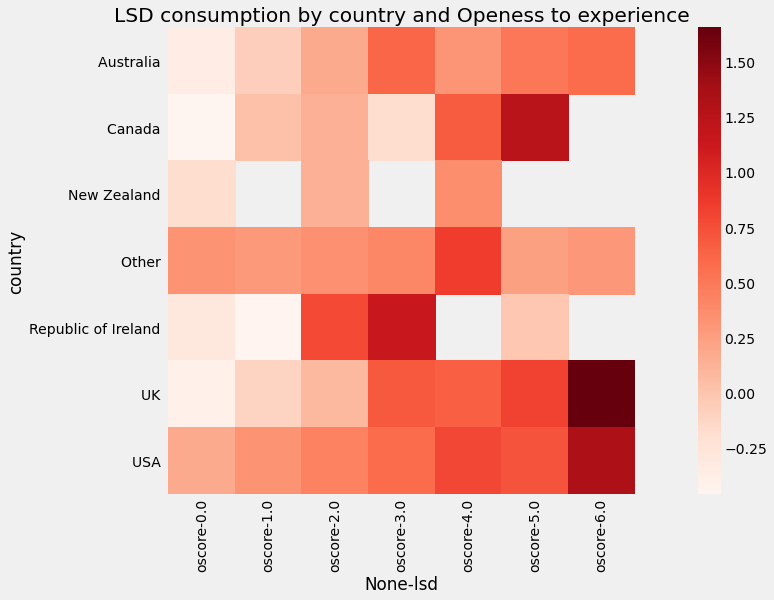

In [ ]:
table = pd.pivot_table(df, index = ['country'], columns=['lsd'],values=['oscore'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("LSD consumption by country and Openess to experience")

**Caffeine consumption by country and Neuroticism**

Text(0.5, 1.0, 'Caffeine consumption by country and Neuroticism')

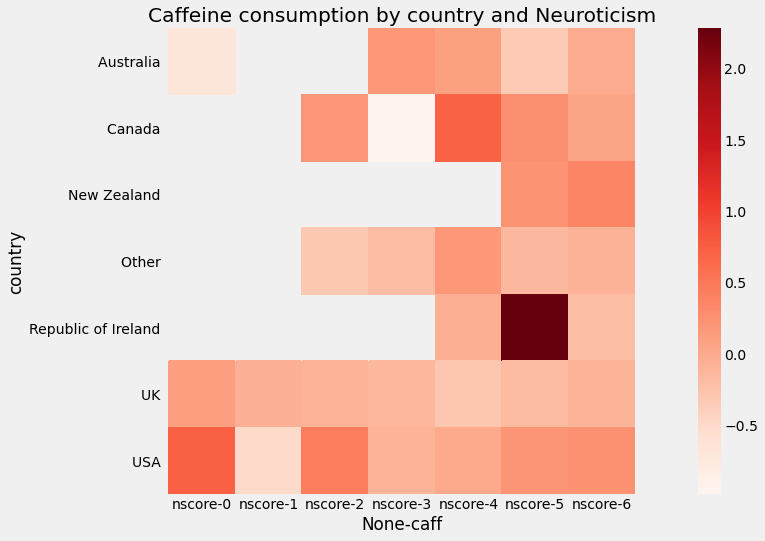

In [ ]:
table = pd.pivot_table(df, index = ['country'], columns=['caff'],values=['nscore'], aggfunc = 'mean', dropna = True)

plt.figure(figsize=(20,8))
ax = sns.heatmap(table, cmap="Reds", square=True, fmt="", cbar=True)
ax.set_title("Caffeine consumption by country and Neuroticism")

**Legal addictions according to country**

Text(0, 0.5, 'Use')

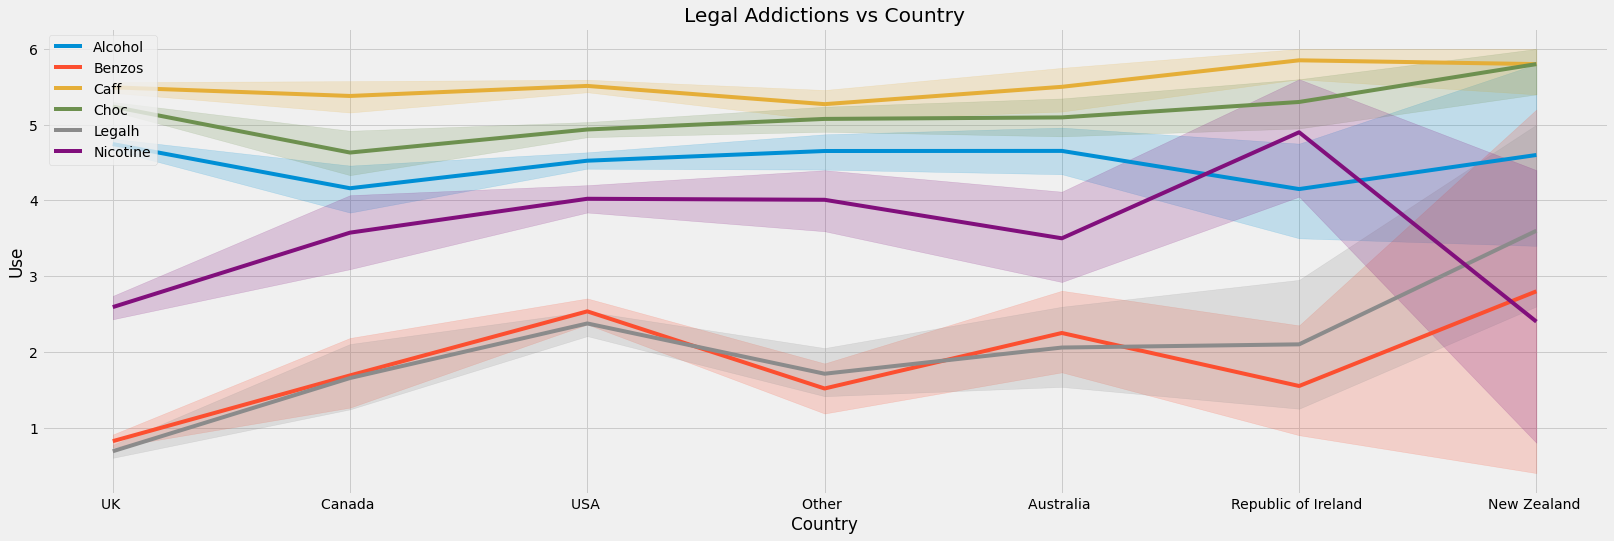

In [ ]:
plt.figure(figsize=(25,8))
sns.lineplot(x=df.country, y=df.alcohol, label='Alcohol')
sns.lineplot(x=df.country, y=df.benzos, label='Benzos')
sns.lineplot(x=df.country, y=df.caff, label='Caff')
sns.lineplot(x=df.country, y=df.choc, label='Choc')
sns.lineplot(x=df.country, y=df.legalh, label='Legalh')
sns.lineplot(x=df.country, y=df.nicotine, label='Nicotine')
plt.legend(loc='upper left')
plt.title('Legal Addictions vs Country')
plt.xlabel('Country')
plt.ylabel('Use')

**Light drugs addictions according to country**

Text(0, 0.5, 'Use')

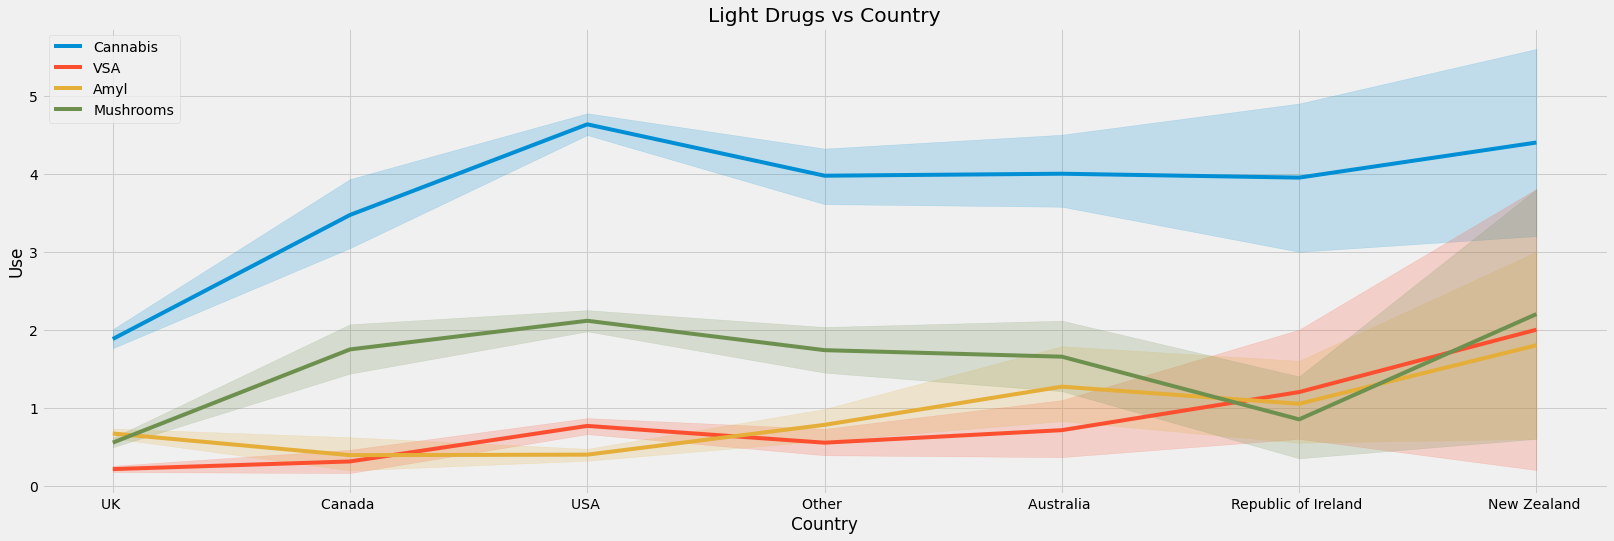

In [ ]:
plt.figure(figsize=(25,8))
sns.lineplot(x=df.country, y=df.cannabis, label='Cannabis')
sns.lineplot(x=df.country, y=df.vsa, label='VSA')
sns.lineplot(x=df.country, y=df.amyl, label='Amyl')
sns.lineplot(x=df.country, y=df.mushrooms, label='Mushrooms')
plt.legend(loc='upper left')
plt.title('Light Drugs vs Country')
plt.xlabel('Country')
plt.ylabel('Use')

**Hard drugs addictions according to country**

Text(0, 0.5, 'Use')

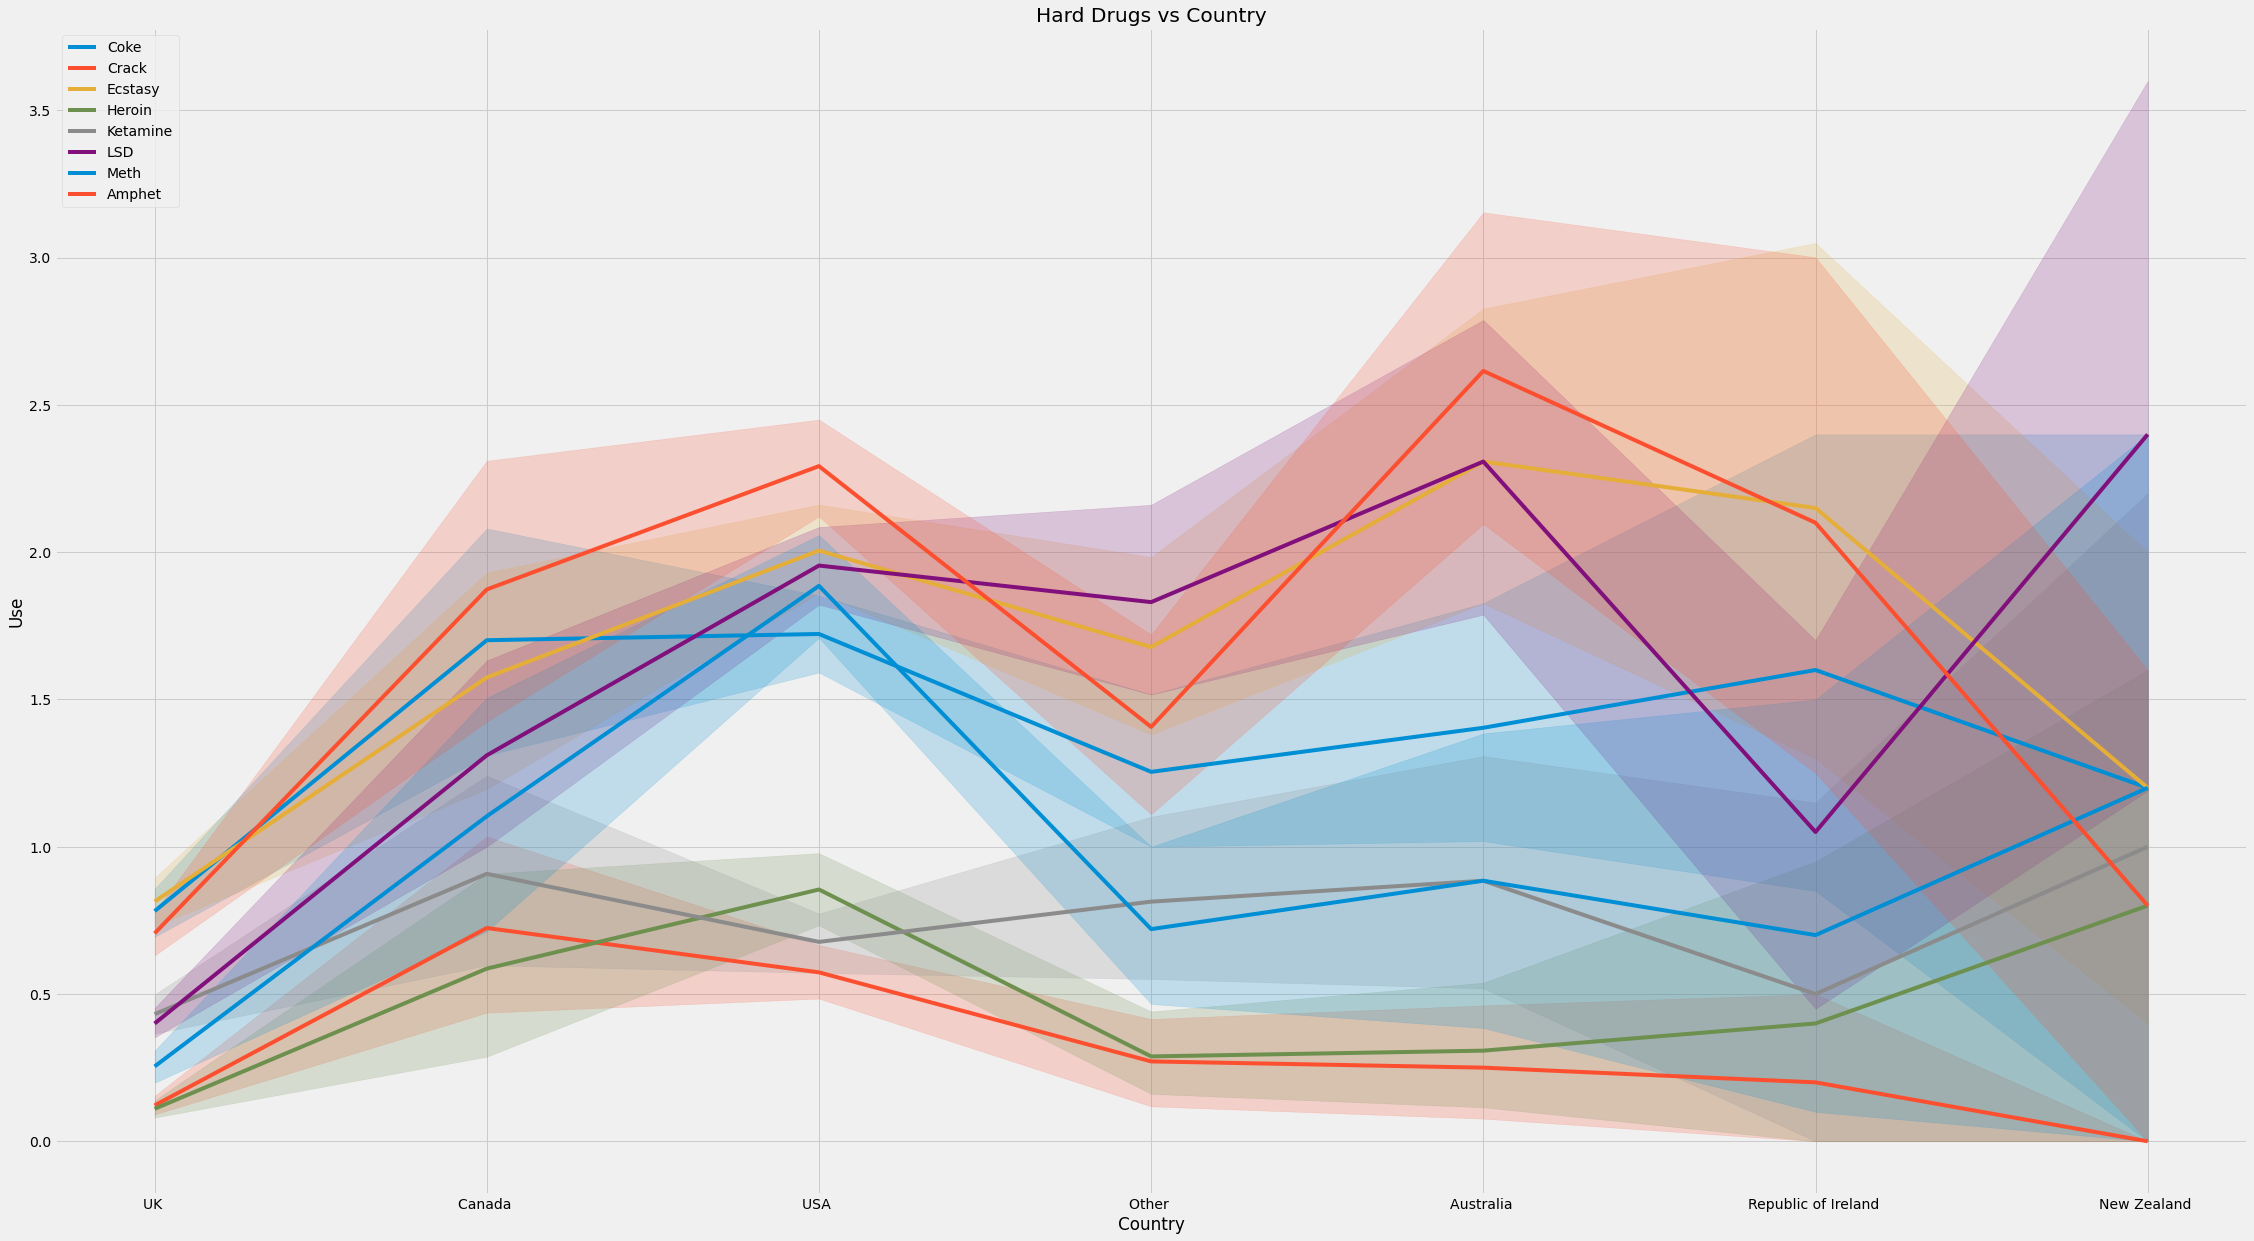

In [ ]:
plt.figure(figsize=(35,20))
sns.lineplot(x=df.country, y=df.coke, label='Coke')
sns.lineplot(x=df.country, y=df.crack, label='Crack')
sns.lineplot(x=df.country, y=df.ecstasy, label='Ecstasy')
sns.lineplot(x=df.country, y=df.heroin, label='Heroin')
sns.lineplot(x=df.country, y=df.ketamine, label='Ketamine')
sns.lineplot(x=df.country, y=df.lsd, label='LSD')
sns.lineplot(x=df.country, y=df.meth, label='Meth')
sns.lineplot(x=df.country, y=df.amphet, label='Amphet')
plt.legend(loc='upper left')
plt.title('Hard Drugs vs Country')
plt.xlabel('Country')
plt.ylabel('Use')

**Substances use by country**

<AxesSubplot:title={'center':'Substances use by country'}, xlabel='Country', ylabel='Frequency of use'>

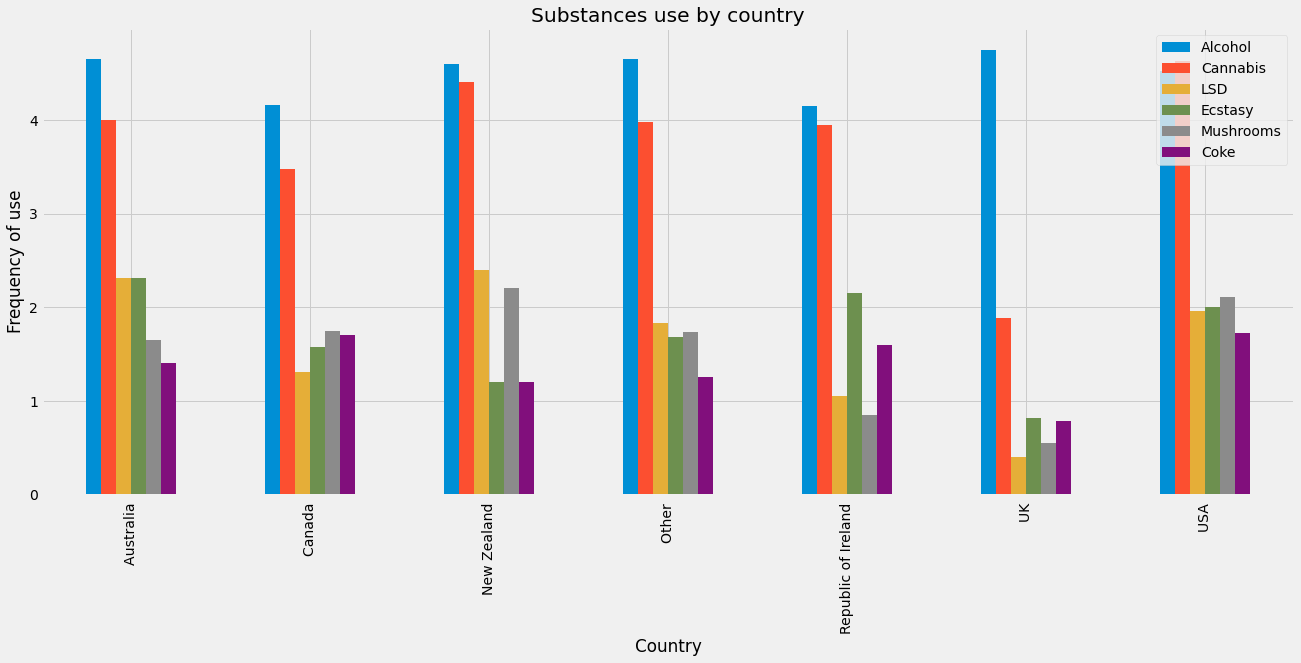

In [ ]:
alcohol = df.groupby('country')['alcohol'].mean()
cannabis = df.groupby('country')['cannabis'].mean()
lsd = df.groupby('country')['lsd'].mean()
ecsta = df.groupby('country')['ecstasy'].mean()
mushrooms = df.groupby('country')['mushrooms'].mean()
coke = df.groupby('country')['coke'].mean()
drugs = pd.DataFrame({'Alcohol':alcohol, 'Cannabis':cannabis, 'LSD':lsd, 'Ecstasy':ecsta, 'Mushrooms':mushrooms, 'Coke':coke})
drugs.plot.bar(title='Substances use by country' ,xlabel='Country', ylabel='Frequency of use', figsize=(20,8))

**Personalities and mentalities by country**

<AxesSubplot:title={'center':'Personalities and mentalities by country'}, xlabel='Country', ylabel='Personality traits'>

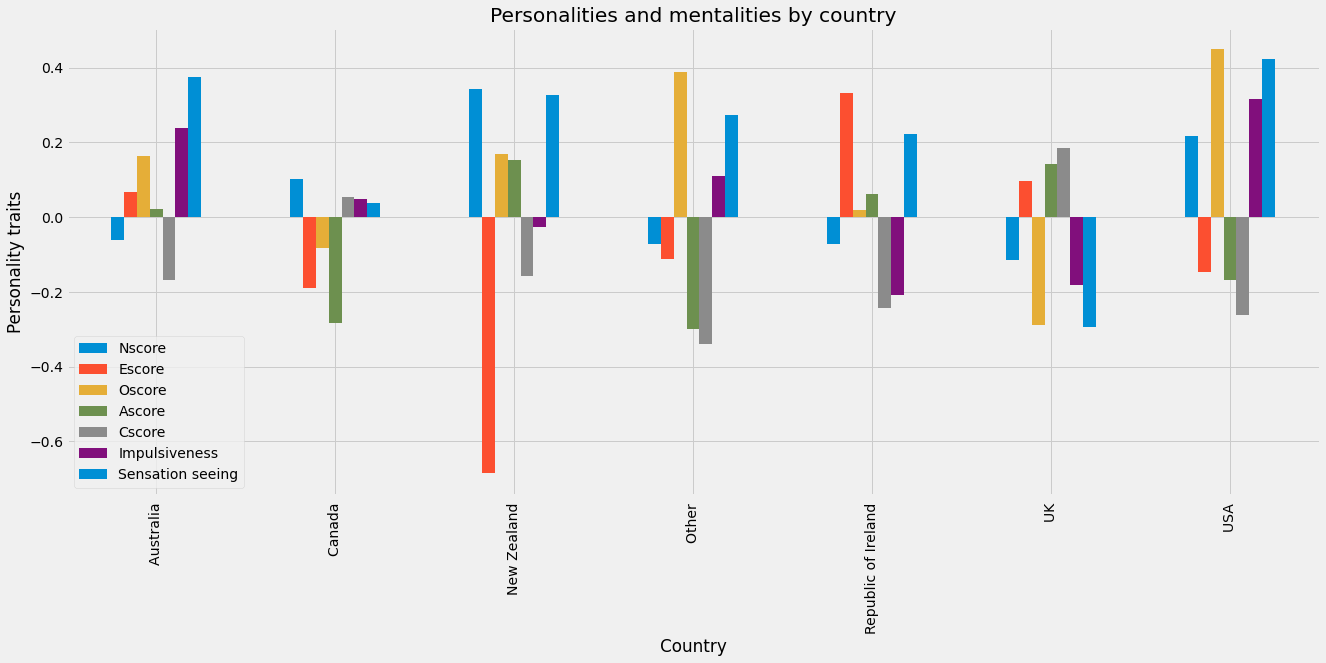

In [ ]:
nscore = df.groupby('country')['nscore'].mean()
escore = df.groupby('country')['escore'].mean()
oscore = df.groupby('country')['oscore'].mean()
ascore = df.groupby('country')['ascore'].mean()
cscore = df.groupby('country')['cscore'].mean()
impulsive = df.groupby('country')['impulsive'].mean()
ss = df.groupby('country')['ss'].mean()
perso = pd.DataFrame({'Nscore':nscore,'Escore':escore,'Oscore':oscore,'Ascore':ascore,'Cscore':cscore,'Impulsiveness':impulsive,'Sensation seeing':ss})
perso.plot.bar(title='Personalities and mentalities by country' ,xlabel='Country', ylabel='Personality traits', figsize=(20,8))

**Cannabis consumption : legal countries vs illegal countries**

<AxesSubplot:title={'center':'Cannabis consumption in legal countries vs illegal countries'}, ylabel='cannabis'>

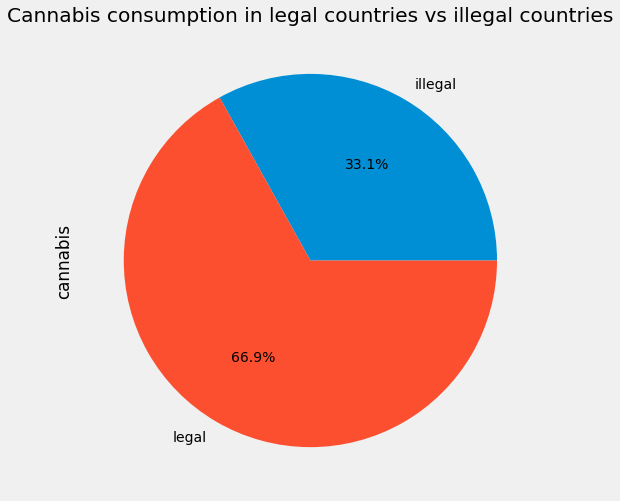

In [ ]:
#Two lists : countries where cannabis is legal and illegal
legal = ['USA ', 'Canada ']
illegal = ['UK ','Republic of Ireland ', 'Australia ', 'New Zealand ','Other ']

#Creating the dataframe with only countries where cannabis is allowed
dflegal = pd.DataFrame({'country':[],'cannabis':[]})
dflegal = dflegal.astype({'country':'str','cannabis':'float'})

#Creating the dataframe with only countries where cannabis is prohibited
dfillegal = pd.DataFrame({'country':[],'cannabis':[]})
dfillegal = dfillegal.astype({'country':'str','cannabis':'float'})

#Sort legal countries and illegal countries
for i in range(df.shape[0]):
    if df['country'].iloc[i] in legal:
        dflegal = dflegal.append(pd.DataFrame({'country':['legal'],'cannabis': df['cannabis'].iloc[i]}))
    elif df['country'].iloc[i] in illegal:
        dfillegal = dfillegal.append(pd.DataFrame({'country':['illegal'],'cannabis': df['cannabis'].iloc[i]}))

#Concatenate the two dataframes       
df_weed = dflegal
df_weed = df_weed.append(dfillegal)
df_weed = df_weed.groupby('country')['cannabis']

#Plotting the result
df_weed.mean().plot.pie(title='Cannabis consumption in legal countries vs illegal countries',autopct=percentage, figsize = (20,8))

## 6 - Ethnicity criteria

**Substances use by ethnicity**

<AxesSubplot:title={'center':'Substances use by ethnicity'}, xlabel='Ethnicity', ylabel='Frequency of use'>

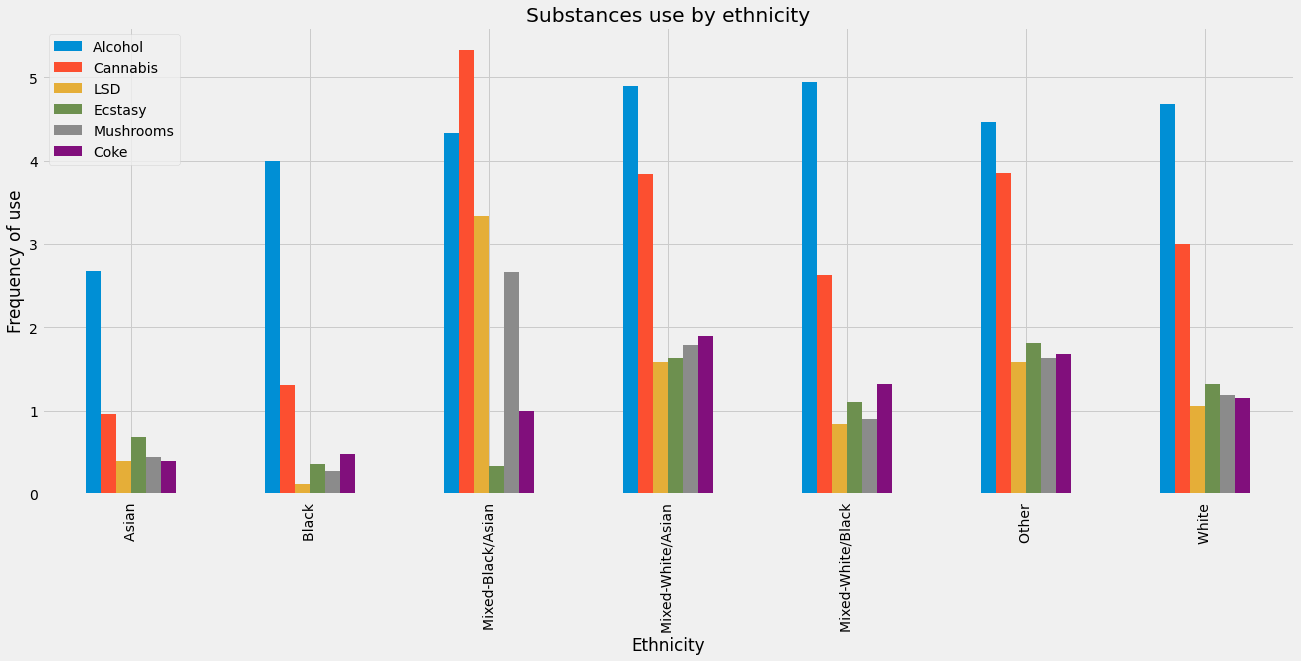

In [ ]:
alcohol = df.groupby('ethnicity')['alcohol'].mean()
cannabis = df.groupby('ethnicity')['cannabis'].mean()
lsd = df.groupby('ethnicity')['lsd'].mean()
ecsta = df.groupby('ethnicity')['ecstasy'].mean()
mushrooms = df.groupby('ethnicity')['mushrooms'].mean()
coke = df.groupby('ethnicity')['coke'].mean()
drugs = pd.DataFrame({'Alcohol':alcohol, 'Cannabis':cannabis, 'LSD':lsd, 'Ecstasy':ecsta, 'Mushrooms':mushrooms, 'Coke':coke})
drugs.plot.bar(title='Substances use by ethnicity' ,xlabel='Ethnicity', ylabel='Frequency of use', figsize=(20,8))

**Personalities and mentalities by ethnicity**

<AxesSubplot:title={'center':'Personalities and mentalities by ethnicity'}, xlabel='Ethnicity', ylabel='Personality traits'>

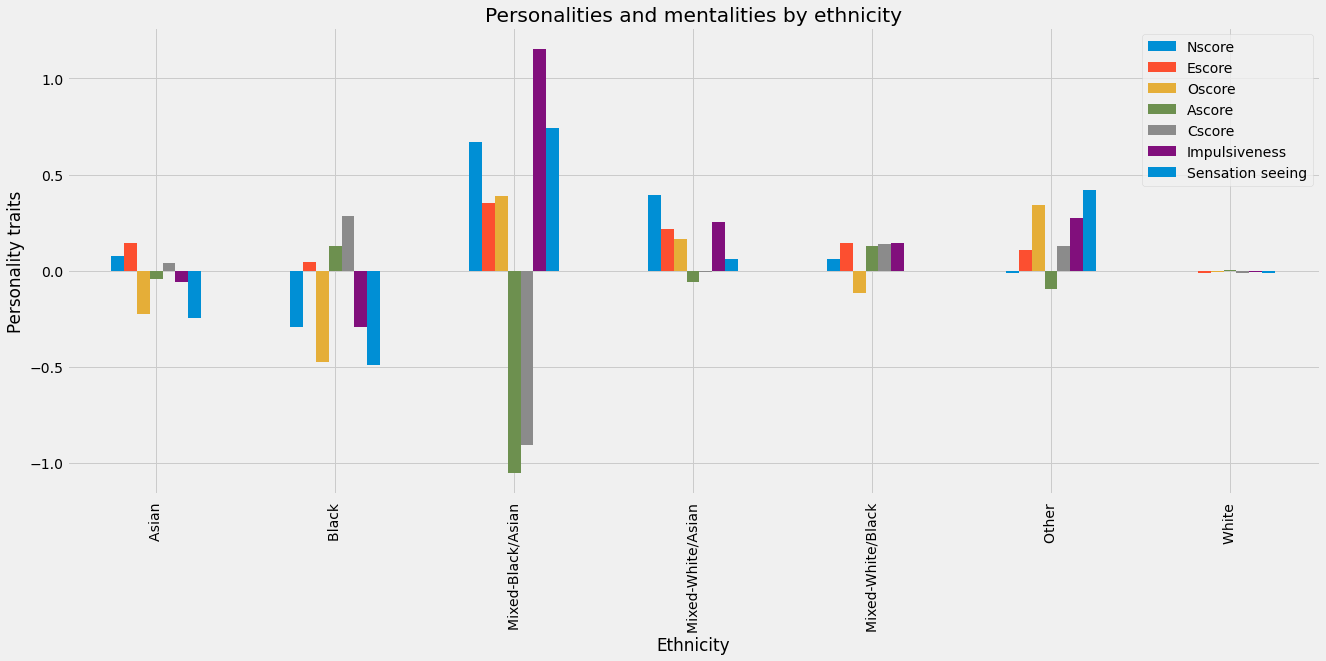

In [ ]:
nscore = df.groupby('ethnicity')['nscore'].mean()
escore = df.groupby('ethnicity')['escore'].mean()
oscore = df.groupby('ethnicity')['oscore'].mean()
ascore = df.groupby('ethnicity')['ascore'].mean()
cscore = df.groupby('ethnicity')['cscore'].mean()
impulsive = df.groupby('ethnicity')['impulsive'].mean()
ss = df.groupby('ethnicity')['ss'].mean()
perso = pd.DataFrame({'Nscore':nscore,'Escore':escore,'Oscore':oscore,'Ascore':ascore,'Cscore':cscore,'Impulsiveness':impulsive,'Sensation seeing':ss})
perso.plot.bar(title='Personalities and mentalities by ethnicity' ,xlabel='Ethnicity', ylabel='Personality traits', figsize=(20,8))

# Part III - ML Model

### Define the variables :

In [64]:
features = ['nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impulsive', 'ss']
x = df_Meanings.loc[:, features].values

### Define the Targets :

In [65]:
Target_Age = df_Meanings.loc[:,['age']].values
Target_Gender = df_Meanings.loc[:,['gender']].values
Target_Education = df_Meanings.loc[:,['education']].values
Target_Country = df_Meanings.loc[:,['country']].values
Target_Ethnicity = df_Meanings.loc[:,['ethnicity']].values

### Creating the Variables Dataset :

In [66]:
Variables=pd.DataFrame(x,columns=features)
Variables

nscore    escore    oscore    ascore    cscore impulsive        ss
0     0.31287  -0.57545  -0.58331  -0.91699  -0.00665  -0.21712  -1.18084
1    -0.67825   1.93886   1.43533   0.76096  -0.14277  -0.71126  -0.21575
2    -0.46725   0.80523  -0.84732   -1.6209   -1.0145  -1.37983   0.40148
3    -0.14882  -0.80615  -0.01928   0.59042   0.58489  -1.37983  -1.18084
4     0.73545   -1.6334  -0.45174  -0.30172   1.30612  -0.21712  -0.21575
...       ...       ...       ...       ...       ...       ...       ...
1880  -1.1943   1.74091   1.88511   0.76096  -1.13788   0.88113   1.92173
1881 -0.24649   1.74091   0.58331   0.76096   -1.5184   0.88113    0.7654
1882  1.13281  -1.37639  -1.27553    -1.772  -1.38502   0.52975  -0.52593
1883  0.91093  -1.92173   0.29338   -1.6209  -2.57309   1.29221    1.2247
1884 -0.46725     2.127   1.65653   1.11406   0.41594   0.88113    1.2247

[1885 rows x 7 columns]

### Importing PCA from the sklearn Library :

In [67]:
from sklearn.decomposition import PCA

### Define PCA model to use :

In [68]:
pca_test = PCA(n_components=7)

### fit PCA model to data :

In [69]:
pca_fit = pca_test.fit(Variables)

### Scree Plot : 

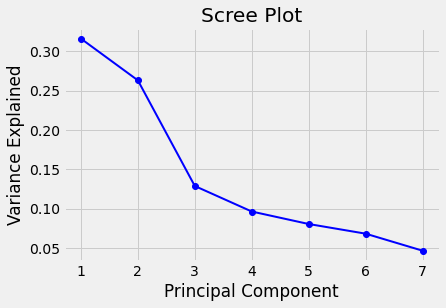

In [70]:
PC_values = np.arange(pca_test.n_components_) + 1
plt.plot(PC_values, pca_test.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

### Remarks :

***Here, we can notice that the graph decreases in a slowlier way after k=4. Therefore, we will take k=3 for our PCA. That means that we will chose 3 PC for our PCA.***

### Variance Ratio :

In [71]:
Variance_Ratio = pd.DataFrame({"Explained_Variance_Ratio":list(pca_test.explained_variance_ratio_),"Cumulated_Variance_Ratio":Variance_Cumulate(list(pca_test.explained_variance_ratio_))})
Variance_Ratio["Explained_Variance_Ratio"],Variance_Ratio["Cumulated_Variance_Ratio"]=Variance_Ratio["Explained_Variance_Ratio"]*100,Variance_Ratio["Cumulated_Variance_Ratio"]*100
Variance_Ratio

Explained_Variance_Ratio  Cumulated_Variance_Ratio
0                 31.583524                 31.583524
1                 26.291498                 57.875023
2                 12.887505                 70.762528
3                  9.650704                 80.413231
4                  8.066129                 88.479360
5                  6.839991                 95.319351
6                  4.680649                100.000000

### Remarks :

***Here, we can notice that the 3 first PC describe more than 70% of the dataset's informations. Therefore, taking 3 Variables is enough to apply PCA and so, to reduce the number of variables on order to apply our model.***

### Now, let's fit our PCA using the right number of variables :

### Number of components for PCA :

In [72]:
pca = PCA(n_components=3)

### Fitting PCA :

In [73]:
principalComponents = pca.fit_transform(Variables)

### Getting our 3 Principal Components :

In [74]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])

In [75]:
principalDf.head(5)

principal component 1  principal component 2  principal component 3
0              -0.279247              -1.371571               0.674529
1              -0.780152               1.905536              -0.760571
2               0.053882              -0.400647               1.700962
3              -1.639724              -0.969600              -0.659309
4              -0.338376              -1.337332               0.055615

### Creation of the final dataframe we will use with our PC :

In [76]:
df.shape

(1877, 32)

In [77]:
finalDf = pd.concat([principalDf, df[['age','gender','education','country','ethnicity']]], axis = 1)
finalDf.head()

principal component 1  principal component 2  principal component 3  \
0              -0.279247              -1.371571               0.674529   
1              -0.780152               1.905536              -0.760571   
2               0.053882              -0.400647               1.700962   
3              -1.639724              -0.969600              -0.659309   
4              -0.338376              -1.337332               0.055615   

      age   gender                           education country  \
0  35-44   Female   Professional certificate/ diploma      UK    
1  25-34     Male                    Doctorate degree      UK    
2  35-44     Male   Professional certificate/ diploma      UK    
3  18-24   Female                      Masters degree      UK    
4  35-44   Female                    Doctorate degree      UK    

            ethnicity  
0  Mixed-White/Asian   
1              White   
2              White   
3              White   
4              White

In [78]:
finalDf.loc[:,["principal component 1","principal component 2","principal component 3"]]

principal component 1  principal component 2  principal component 3
0                 -0.279247              -1.371571               0.674529
1                 -0.780152               1.905536              -0.760571
2                  0.053882              -0.400647               1.700962
3                 -1.639724              -0.969600              -0.659309
4                 -0.338376              -1.337332               0.055615
...                     ...                    ...                    ...
1880               1.373765               3.126114              -0.718232
1881               1.046007               1.653768              -0.555810
1882               1.552295              -2.539307               1.125537
1883               3.607464              -1.523392               0.236595
1884               0.371907               3.150401              -0.853361

[1885 rows x 3 columns]

# Plot of PCs :

# Graph of Variables :

### ***Graph of Variables (PC1 & PC2) :***

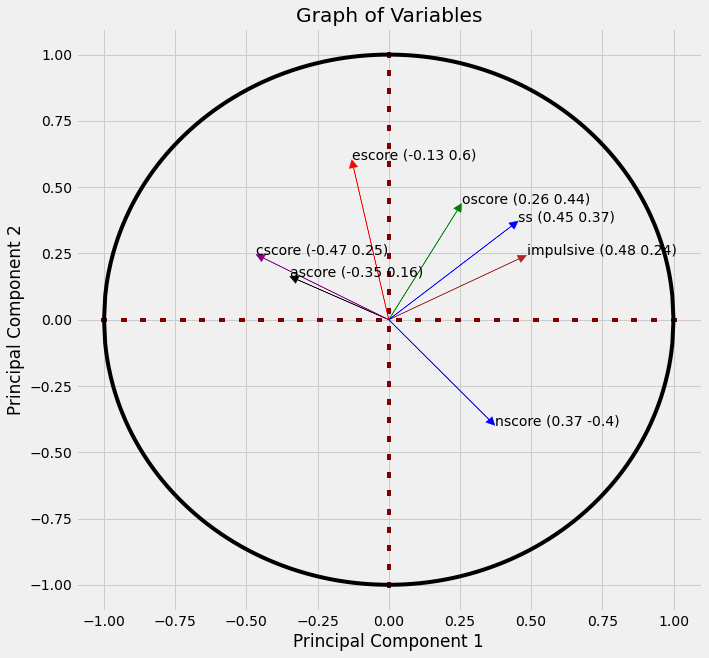

In [79]:
Graph_of_Variables(1,2)

### ***Graph of Variables (PC3 & PC1) :***

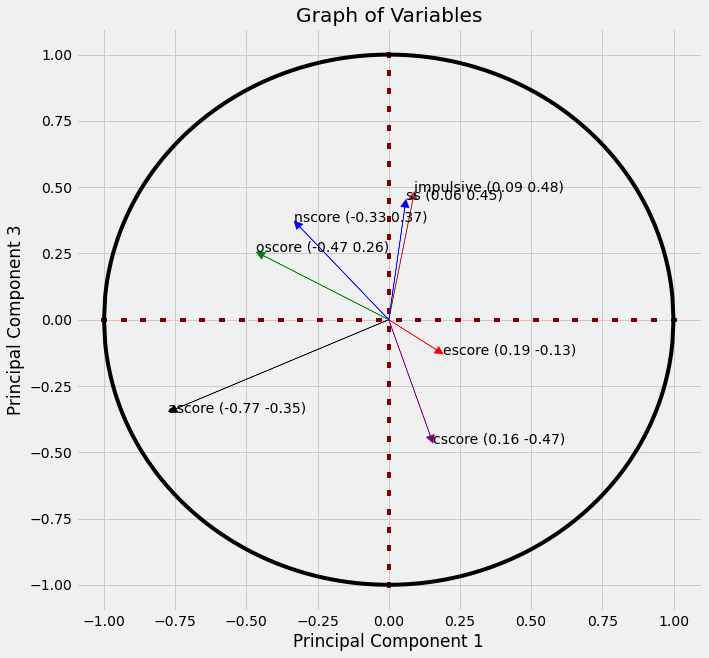

In [80]:
Graph_of_Variables(3,1)

### ***Graph of Variables (PC3 & PC2) :***

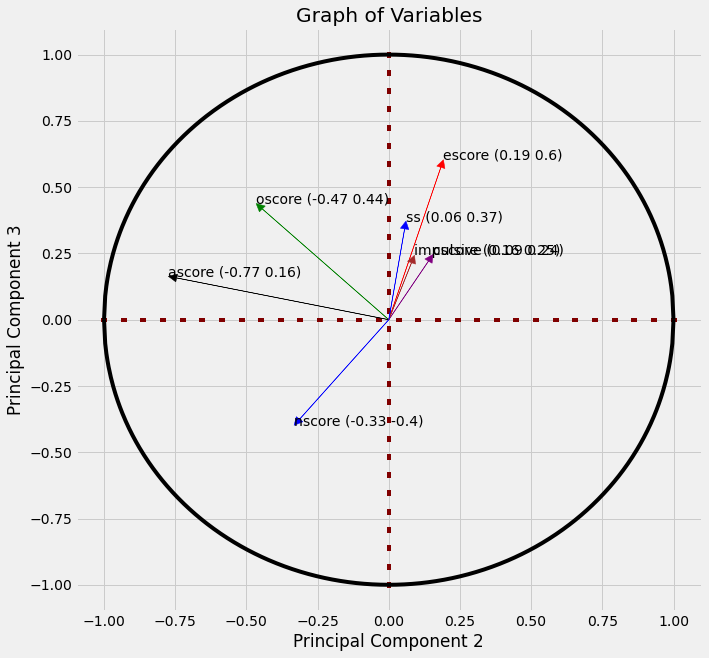

In [81]:
Graph_of_Variables(3,2)

# Age :

### PC2 in function of PC1 :

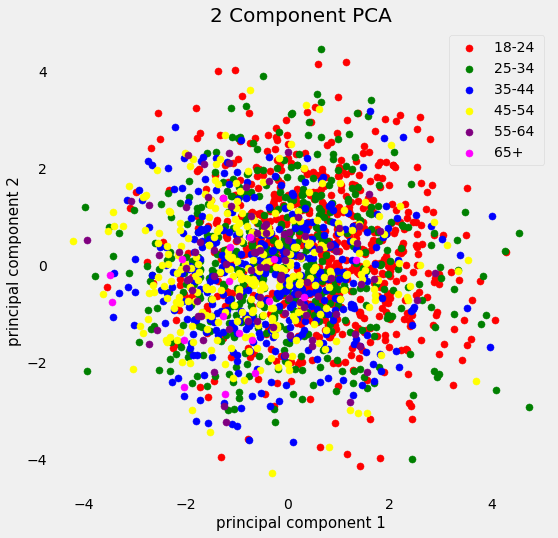

In [82]:
Plot_ML("age",list(AGE["Meanings"]),'principal component 1','principal component 2')

### PC3 in function of PC1 :

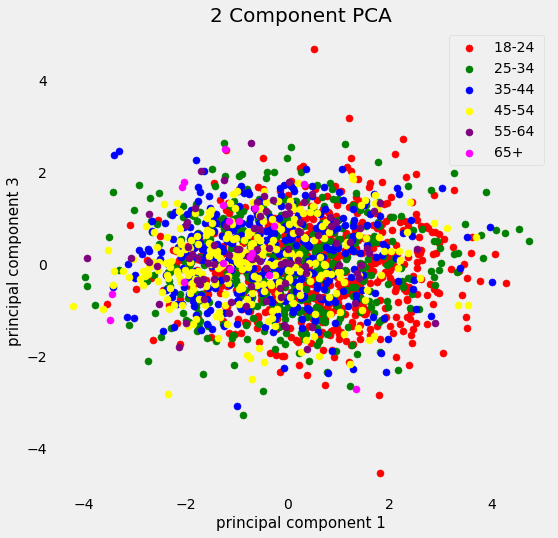

In [83]:
Plot_ML("age",list(AGE["Meanings"]),'principal component 1','principal component 3')

### PC3 in function of PC2 :

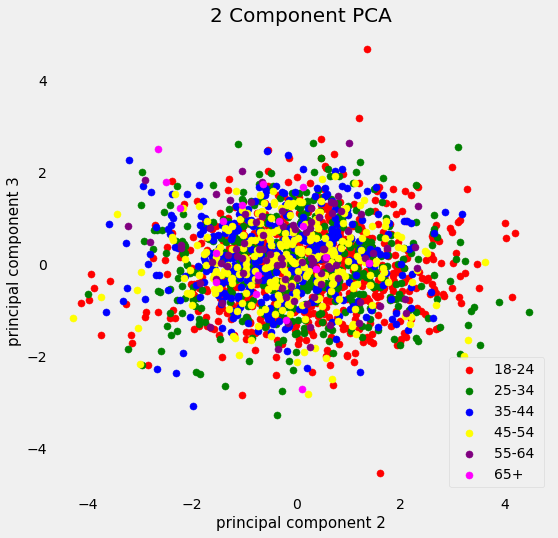

In [84]:
Plot_ML("age",list(AGE["Meanings"]),'principal component 2','principal component 3')

# Gender :

### PC2 in function of PC1 :

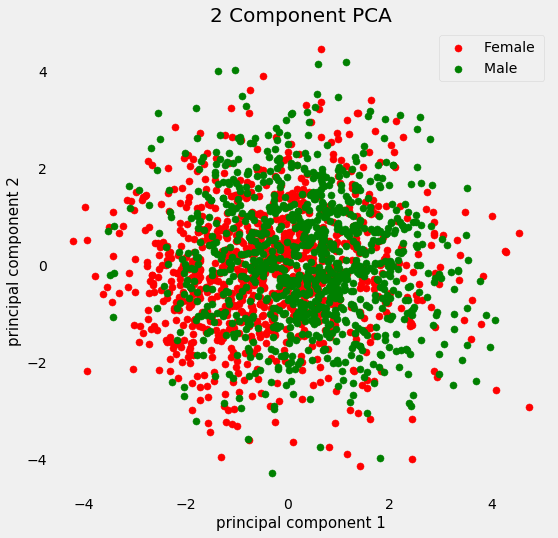

In [85]:
Plot_ML("gender",list(GENDER["Meanings"]),'principal component 1','principal component 2')

### PC3 in function of PC1 :

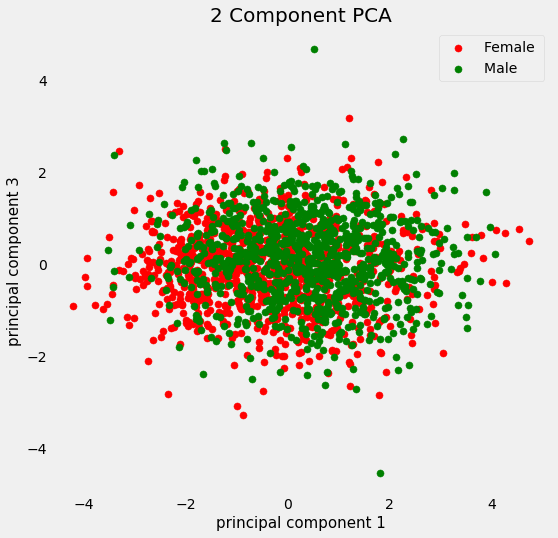

In [86]:
Plot_ML("gender",list(GENDER["Meanings"]),'principal component 1','principal component 3')

### PC3 in function of PC2 :

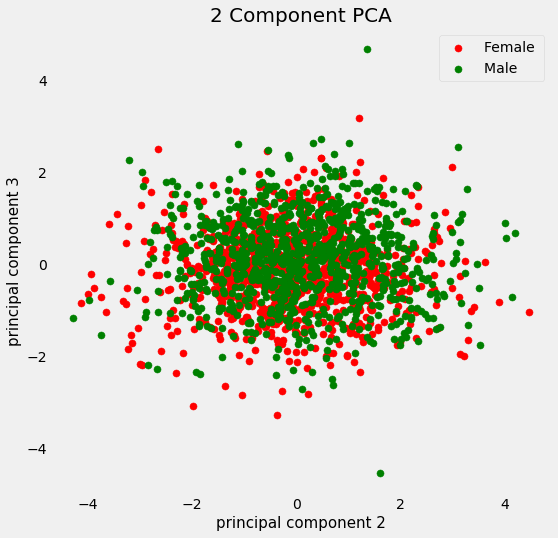

In [87]:
Plot_ML("gender",list(GENDER["Meanings"]),'principal component 2','principal component 3')

# Education :

### PC2 in function of PC1 :

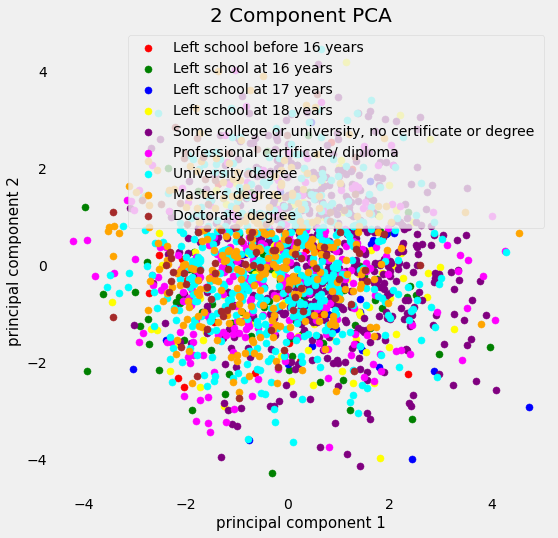

In [88]:
Plot_ML("education",list(EDUCATION["Meanings"]),'principal component 1','principal component 2')

### PC3 in function of PC1 :

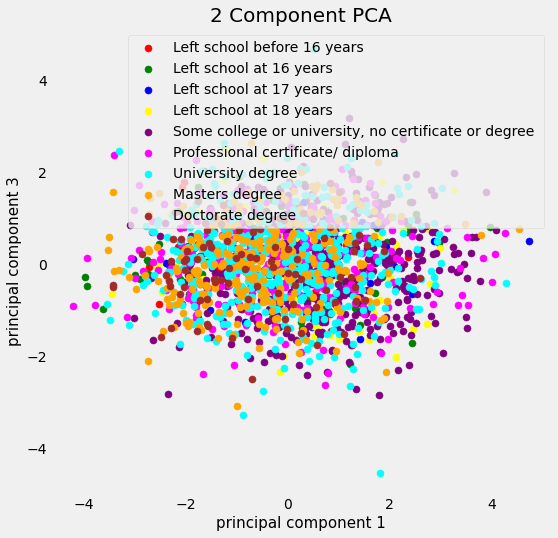

In [89]:
Plot_ML("education",list(EDUCATION["Meanings"]),'principal component 1','principal component 3')

### PC3 in function of PC2 :

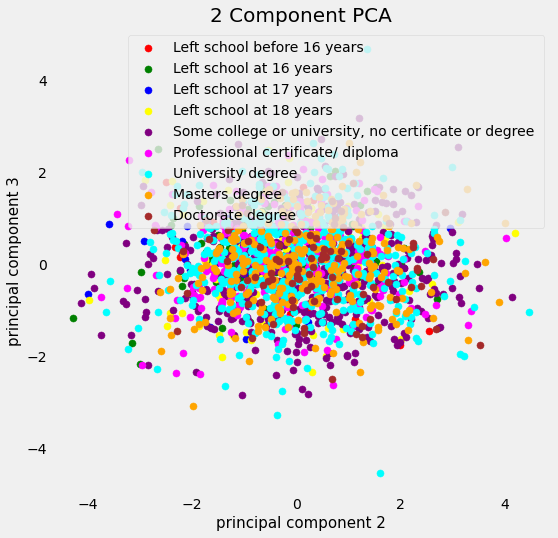

In [90]:
Plot_ML("education",list(EDUCATION["Meanings"]),'principal component 2','principal component 3')

# Country :

### PC2 in function of PC1 :

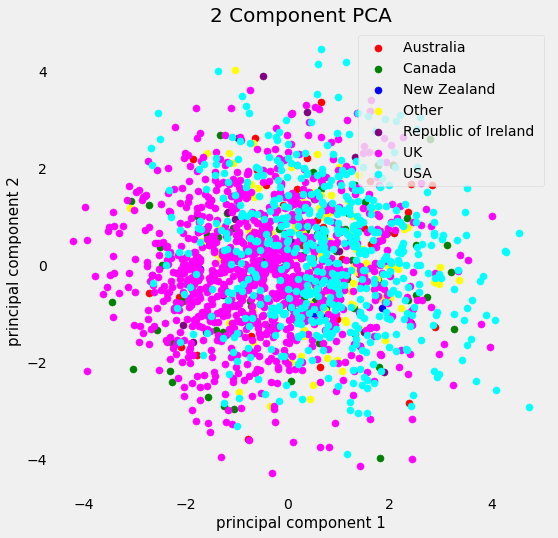

In [91]:
Plot_ML("country",list(COUNTRY["Meanings"]),'principal component 1','principal component 2')

### PC3 in function of PC1 :

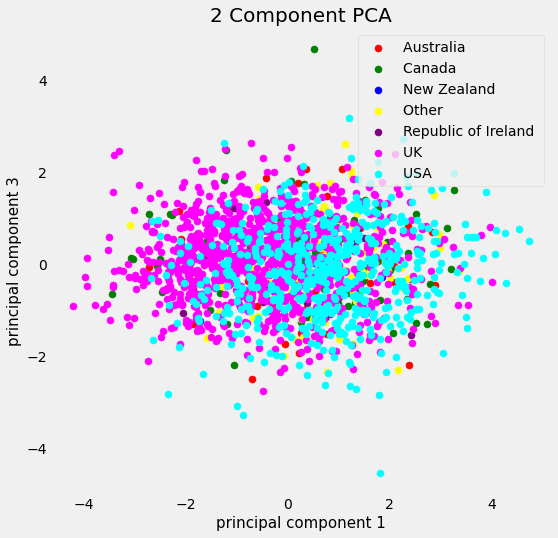

In [92]:
Plot_ML("country",list(COUNTRY["Meanings"]),'principal component 1','principal component 3')

### PC3 in function of PC2 :

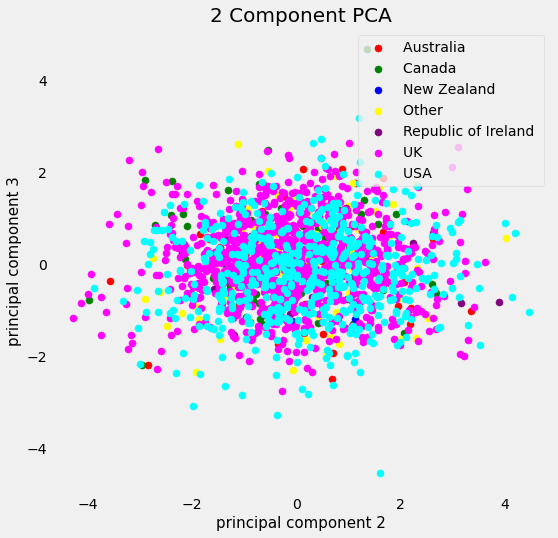

In [93]:
Plot_ML("country",list(COUNTRY["Meanings"]),'principal component 2','principal component 3')

# Ethnicity :

### PC2 in function of PC1 :

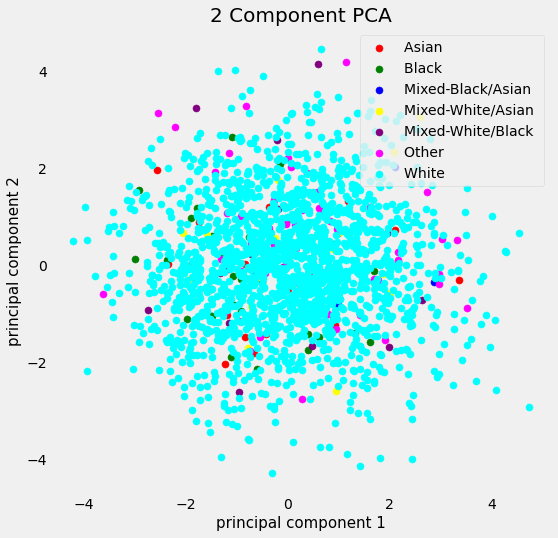

In [94]:
Plot_ML("ethnicity",list(ETHNICITY["Meanings"]),'principal component 1','principal component 2')

### PC3 in function of PC1 :

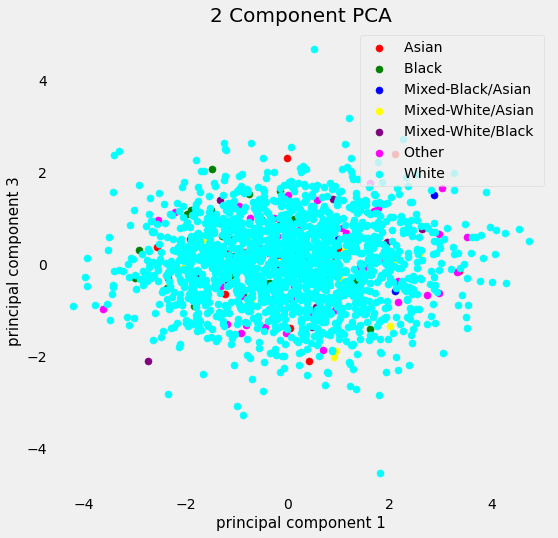

In [95]:
Plot_ML("ethnicity",list(ETHNICITY["Meanings"]),'principal component 1','principal component 3')

### PC3 in function of PC2 :

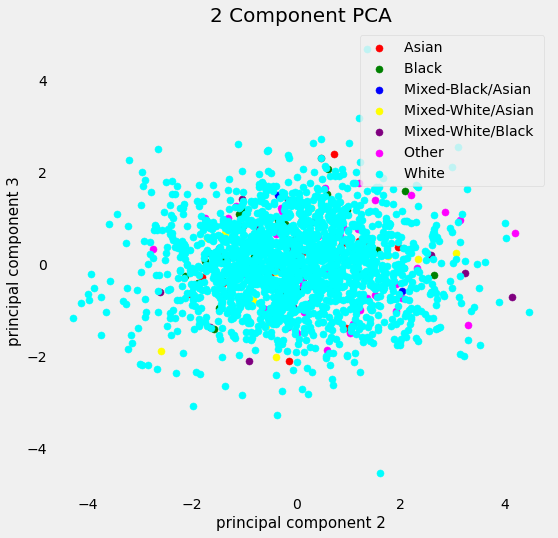

In [96]:
Plot_ML("ethnicity",list(ETHNICITY["Meanings"]),'principal component 2','principal component 3')

# Applying ML Models :

### Importing the libraries we will use from sklearn :

In [97]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Generating train/test sets :

In [98]:
xtrain_age, xtest_age, ytrain_age, ytest_age = train_test_split(finalDf.loc[:,["principal component 1","principal component 2","principal component 3"]],Target_Age, test_size=0.2)
xtrain_education, xtest_education, ytrain_education, ytest_education = train_test_split(finalDf.loc[:,["principal component 1","principal component 2","principal component 3"]],Target_Education, test_size=0.2)
xtrain_gender, xtest_gender, ytrain_gender, ytest_gender = train_test_split(finalDf.loc[:,["principal component 1","principal component 2","principal component 3"]],Target_Gender, test_size=0.2)
xtrain_country, xtest_country, ytrain_country, ytest_country = train_test_split(finalDf.loc[:,["principal component 1","principal component 2","principal component 3"]],Target_Country, test_size=0.2)
xtrain_ethnicity, xtest_ethnicity, ytrain_ethnicity, ytest_ethnicity = train_test_split(finalDf.loc[:,["principal component 1","principal component 2","principal component 3"]],Target_Ethnicity, test_size=0.2)

# Linear SVC Model :

In [99]:
lsvc_age = LinearSVC()

## ***Age :***

### Training the model :

In [100]:
lsvc_age.fit(xtrain_age, np.ravel(ytrain_age))

LinearSVC()

### Look at predictions :

In [101]:
yPred_lsvc_age=lsvc_age.predict(xtest_age)
df_yPred_lsvc_age=pd.DataFrame({"Age_Exact":list(ytest_age),"Age_Predit":list(yPred_lsvc_age)})
df_yPred_lsvc_age

Age_Exact Age_Predit
0    [25-34 ]     18-24 
1    [25-34 ]     18-24 
2    [25-34 ]     18-24 
3    [35-44 ]     25-34 
4    [25-34 ]     18-24 
..        ...        ...
372  [35-44 ]     18-24 
373  [25-34 ]     35-44 
374  [45-54 ]     25-34 
375  [18-24 ]     18-24 
376  [45-54 ]     35-44 

[377 rows x 2 columns]

### Score :

In [102]:
score_age = lsvc_age.score(xtest_age, ytest_age)
print("Score : "+str(score_age))

Score : 0.35278514588859416


### Confusion Matrix : 

In [103]:
cm_age = confusion_matrix(ytest_age, yPred_lsvc_age)
print(cm_age)

[[104  11   4   2   0   0]
 [ 70  12  18   4   0   0]
 [ 36  16  14   1   0   0]
 [ 29  10  17   3   0   0]
 [ 13   3   5   1   0   0]
 [  3   0   0   1   0   0]]


### Cross-Validation :

In [104]:
CV_LSVC_age=cross_val_score(LinearSVC(),xtest_age,np.ravel(ytest_age), cv=4, scoring='accuracy').mean()
print("Cross-Validation score : "+str(CV_LSVC_age))

Cross-Validation score : 0.33409854423292273


### Report :

In [105]:
print(classification_report(ytest_age, yPred_lsvc_age))

              precision    recall  f1-score   support

      18-24        0.41      0.86      0.55       121
      25-34        0.23      0.12      0.15       104
      35-44        0.24      0.21      0.22        67
      45-54        0.25      0.05      0.08        59
      55-64        0.00      0.00      0.00        22
        65+        0.00      0.00      0.00         4

    accuracy                           0.35       377
   macro avg       0.19      0.21      0.17       377
weighted avg       0.28      0.35      0.27       377



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Remarks :

***Here, we can notice that the precision of the model is lower that 70% for our predictions for ages. Therefore, this model is not well optimized. We will try on other targets.***

## ***Gender :***

### Training the model :

In [106]:
lsvc_gender = LinearSVC()
lsvc_gender.fit(xtrain_gender, np.ravel(ytrain_gender))

LinearSVC()

### Look at predictions :

In [107]:
yPred_lsvc_gender=lsvc_gender.predict(xtest_gender)
df_yPred_lsvc_gender=pd.DataFrame({"Gender_Exact":list(ytest_gender),"Gender_Predit":list(yPred_lsvc_gender)})
df_yPred_lsvc_gender

Gender_Exact Gender_Predit
0        [Male ]         Male 
1      [Female ]       Female 
2      [Female ]       Female 
3      [Female ]       Female 
4        [Male ]         Male 
..           ...           ...
372    [Female ]         Male 
373      [Male ]         Male 
374    [Female ]         Male 
375    [Female ]       Female 
376      [Male ]         Male 

[377 rows x 2 columns]

### Score :

In [108]:
score_gender = lsvc_gender.score(xtest_gender, ytest_gender)
print("Score : "+str(score_gender))

Score : 0.610079575596817


### Confusion Matrix : 

In [109]:
cm_gender = confusion_matrix(ytest_gender, yPred_lsvc_gender)
print(cm_gender)

[[115  76]
 [ 71 115]]


### Cross-Validation :

In [110]:
CV_LSVC_gender=cross_val_score(LinearSVC(),xtest_gender,np.ravel(ytest_gender), cv=4, scoring='accuracy').mean()
print("Cross-Validation score : "+str(CV_LSVC_gender))

Cross-Validation score : 0.6180291153415454


### Report :

In [111]:
print(classification_report(ytest_gender, yPred_lsvc_gender))

              precision    recall  f1-score   support

     Female        0.62      0.60      0.61       191
       Male        0.60      0.62      0.61       186

    accuracy                           0.61       377
   macro avg       0.61      0.61      0.61       377
weighted avg       0.61      0.61      0.61       377



### Remarks :

***Here, we can notice that the precision of the model is closer to 70% for our predictions in terms of genders. Therefore, this model is quite optimized.However, we will search for other models to apply in order to get a better accuracy. Now, We will try Linear SVC on other targets.***

## ***Education :***

### Training the model :

In [112]:
lsvc_education = LinearSVC()
lsvc_education.fit(xtrain_education, np.ravel(ytrain_education))

LinearSVC()

### Look at predictions :

In [113]:
yPred_lsvc_education=lsvc_education.predict(xtest_education)
df_yPred_lsvc_education=pd.DataFrame({"Education_Exact":list(ytest_education),"Education_Predit":list(yPred_lsvc_education)})
df_yPred_lsvc_education

Education_Exact  \
0                                    [Masters degree ]   
1                 [Professional certificate/ diploma ]   
2                                    [Masters degree ]   
3                 [Professional certificate/ diploma ]   
4                                    [Masters degree ]   
..                                                 ...   
372               [Professional certificate/ diploma ]   
373                                  [Masters degree ]   
374                         [Left school at 18 years ]   
375  [Some college or university, no certificate or...   
376  [Some college or university, no certificate or...   

                                      Education_Predit  
0    Some college or university, no certificate or ...  
1                                   University degree   
2                                   University degree   
3                                   University degree   
4                                   University degree   
..                                                 ...  
372                                 University degree   
373                                 University degree   
374  Some college or university, no certificate or ...  
375  Some college or university, no certificate or ...  
376                                 University degree   

[377 rows x 2 columns]

### Score :

In [114]:
score_education = lsvc_education.score(xtest_education, ytest_education)
print("Score : "+str(score_education))

Score : 0.3421750663129973


### Confusion Matrix : 

In [115]:
cm_education = confusion_matrix(ytest_education, yPred_lsvc_education)
print(cm_education)

[[ 0  0  0  0  0  0  0  6 14]
 [ 0  0  0  0  0  0  0  9 13]
 [ 0  0  0  0  0  0  0  4  2]
 [ 0  0  0  0  0  0  0 15  3]
 [ 0  0  0  0  0  0  0  2  2]
 [ 0  0  0  0  0  0  0 20 36]
 [ 0  0  0  0  0  0  0 26 36]
 [ 0  0  0  0  0  0  0 79 21]
 [ 0  0  0  0  0  0  0 39 50]]


### Cross-Validation :

In [116]:
CV_LSVC_education=cross_val_score(LinearSVC(),xtest_education,np.ravel(ytest_education), cv=4, scoring='accuracy').mean()
print("Cross-Validation score : "+str(CV_LSVC_education))

Cross-Validation score : 0.323572228443449


### Report :

In [117]:
print(classification_report(ytest_education, yPred_lsvc_education))

                                                       precision    recall  f1-score   support

                                    Doctorate degree        0.00      0.00      0.00        20
                             Left school at 16 years        0.00      0.00      0.00        22
                             Left school at 17 years        0.00      0.00      0.00         6
                             Left school at 18 years        0.00      0.00      0.00        18
                         Left school before 16 years        0.00      0.00      0.00         4
                                      Masters degree        0.00      0.00      0.00        56
                   Professional certificate/ diploma        0.00      0.00      0.00        62
Some college or university, no certificate or degree        0.40      0.79      0.53       100
                                   University degree        0.28      0.56      0.38        89

                                             acc

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Remarks :

***Here, we can notice that the precision of the model is very low, we only have "Some college or university, no certificate or degree" and "university" that have precision higher than 0. Therefore, this model will not be taken to the variable education. Now, We will try Linear SVC on other targets.***

## ***Country :***

### Training the model :

In [118]:
lsvc_country = LinearSVC()
lsvc_country.fit(xtrain_country, np.ravel(ytrain_country))

LinearSVC()

### Look at predictions :

In [119]:
yPred_lsvc_country=lsvc_country.predict(xtest_country)
df_yPred_lsvc_country=pd.DataFrame({"Country_Exact":list(ytest_country),"Country_Predit":list(yPred_lsvc_country)})
df_yPred_lsvc_country

Country_Exact Country_Predit
0          [USA ]           USA 
1        [Other ]            UK 
2       [Canada ]            UK 
3           [UK ]            UK 
4          [USA ]           USA 
..            ...            ...
372        [USA ]            UK 
373         [UK ]            UK 
374      [Other ]            UK 
375        [USA ]           USA 
376         [UK ]            UK 

[377 rows x 2 columns]

### Score :

In [120]:
score_country = lsvc_country.score(xtest_country, ytest_country)
print("Score : "+str(score_country))

Score : 0.610079575596817


### Confusion Matrix :

In [121]:
cm_country = confusion_matrix(ytest_country, yPred_lsvc_country)
print(cm_country)

[[  0   0   0   0   0   6   3]
 [  0   0   0   0   0  12   3]
 [  0   0   0   0   0   1   1]
 [  0   0   0   0   0  20   6]
 [  0   0   0   0   0   4   1]
 [  0   0   0   0   0 180  30]
 [  0   0   0   0   0  60  50]]


### Cross-Validation :

In [122]:
CV_LSVC_country=cross_val_score(LinearSVC(),xtest_country,np.ravel(ytest_country), cv=4, scoring='accuracy').mean()
print("Cross-Validation score : "+str(CV_LSVC_country))

Cross-Validation score : 0.5993561030235162


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


### Report :

In [123]:
print(classification_report(ytest_country, yPred_lsvc_country))

                      precision    recall  f1-score   support

          Australia        0.00      0.00      0.00         9
             Canada        0.00      0.00      0.00        15
        New Zealand        0.00      0.00      0.00         2
              Other        0.00      0.00      0.00        26
Republic of Ireland        0.00      0.00      0.00         5
                 UK        0.64      0.86      0.73       210
                USA        0.53      0.45      0.49       110

            accuracy                           0.61       377
           macro avg       0.17      0.19      0.17       377
        weighted avg       0.51      0.61      0.55       377



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Remarks :

***Here, we can notice that the precision is closer to 70%, we only have "UK" and "USA" that have precision higher than 0, because the dataset contains most of those responses that's why we have a precision equal to 0 for others. Therefore, can be used but we will try to get another one with better performances. Now, We will try Linear SVC on other targets.***

## ***Ethnicity :***

### Training the model :

In [124]:
lsvc_ethnicity = LinearSVC()
lsvc_ethnicity.fit(xtrain_ethnicity, np.ravel(ytrain_ethnicity))

LinearSVC()

### Look at predictions :

In [125]:
yPred_lsvc_ethnicity=lsvc_ethnicity.predict(xtest_ethnicity)
df_yPred_lsvc_ethnicity=pd.DataFrame({"Ethnicity_Exact":list(ytest_ethnicity),"Ethnicity_Predit":list(yPred_lsvc_ethnicity)})
df_yPred_lsvc_ethnicity

Ethnicity_Exact Ethnicity_Predit
0          [White ]           White 
1          [White ]           White 
2          [White ]           White 
3          [White ]           White 
4          [White ]           White 
..              ...              ...
372        [White ]           White 
373        [White ]           White 
374        [White ]           White 
375        [White ]           White 
376        [White ]           White 

[377 rows x 2 columns]

### Score :

In [126]:
score_ethnicity = lsvc_ethnicity.score(xtest_ethnicity, ytest_ethnicity)
print("Score : "+str(score_ethnicity))

Score : 0.9363395225464191


### Confusion Matrix :

In [127]:
cm_ethnicity = confusion_matrix(ytest_ethnicity, yPred_lsvc_ethnicity)
print(cm_ethnicity)

[[  0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   5]
 [  0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   5]
 [  0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   9]
 [  0   0   0   0   0   0 353]]


### Cross-Validation :

In [128]:
CV_LSVC_ethnicity=cross_val_score(LinearSVC(),xtest_ethnicity,np.ravel(ytest_ethnicity), cv=4, scoring='accuracy').mean()
print("Cross-Validation score : "+str(CV_LSVC_ethnicity))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


Cross-Validation score : 0.9363381858902575


### Report :

In [129]:
print(classification_report(ytest_ethnicity, yPred_lsvc_ethnicity))

                    precision    recall  f1-score   support

            Asian        0.00      0.00      0.00         2
            Black        0.00      0.00      0.00         5
Mixed-Black/Asian        0.00      0.00      0.00         1
Mixed-White/Asian        0.00      0.00      0.00         5
Mixed-White/Black        0.00      0.00      0.00         2
            Other        0.00      0.00      0.00         9
            White        0.94      1.00      0.97       353

          accuracy                           0.94       377
         macro avg       0.13      0.14      0.14       377
      weighted avg       0.88      0.94      0.91       377



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Remarks :

***Here, we can notice that the precision is closer to 90%, we only have "White" that have precision higher than 0, because the dataset contains mostly white people using drugs, that's why we have a precision equal to 0 for others. Therefore, we can use this model to predict ethnicity of drug consumers.***

# KNeighbors Classifier Model :


In [130]:
from sklearn.neighbors import KNeighborsClassifier

# ***Age :***

### Training the model :

In [131]:
kNN_age=KNeighborsClassifier()
kNN_age.fit(xtrain_age, np.ravel(ytrain_age))

KNeighborsClassifier()

### Look at predictions :

In [132]:
yPred_kNN_age=kNN_age.predict(xtest_age)
df_yPred_kNN_age=pd.DataFrame({"Age_Exact":list(ytest_age),"Age_Predit":list(yPred_kNN_age)})
df_yPred_kNN_age

Age_Exact Age_Predit
0    [25-34 ]     18-24 
1    [25-34 ]     18-24 
2    [25-34 ]     55-64 
3    [35-44 ]     45-54 
4    [25-34 ]     25-34 
..        ...        ...
372  [35-44 ]     18-24 
373  [25-34 ]     25-34 
374  [45-54 ]     35-44 
375  [18-24 ]     35-44 
376  [45-54 ]     18-24 

[377 rows x 2 columns]

### Score :

In [133]:
score_age = kNN_age.score(xtest_age, ytest_age)
print("Score : "+str(score_age))

Score : 0.33421750663129973


### Confusion Matrix : 

In [134]:
cm_age = confusion_matrix(ytest_age, yPred_kNN_age)
print(cm_age)

[[75 24 16  6  0  0]
 [51 28 13 10  2  0]
 [24 26 13  4  0  0]
 [19 19 11 10  0  0]
 [ 8  7  2  5  0  0]
 [ 2  1  1  0  0  0]]


### Cross-Validation :

In [135]:
CV_kNN_age=cross_val_score(KNeighborsClassifier(),xtest_age,np.ravel(ytest_age), cv=4, scoring='accuracy').mean()
print("Cross-Validation score : "+str(CV_kNN_age))

Cross-Validation score : 0.3287793952967525


### Report :

In [136]:
print(classification_report(ytest_age, yPred_kNN_age))

              precision    recall  f1-score   support

      18-24        0.42      0.62      0.50       121
      25-34        0.27      0.27      0.27       104
      35-44        0.23      0.19      0.21        67
      45-54        0.29      0.17      0.21        59
      55-64        0.00      0.00      0.00        22
        65+        0.00      0.00      0.00         4

    accuracy                           0.33       377
   macro avg       0.20      0.21      0.20       377
weighted avg       0.29      0.33      0.31       377



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Remarks :

***The score of kNN is higher than Linear SVC for "age". Therefore, We will probably use it.***

# ***Gender :***

### Training the model :

In [137]:
kNN_gender=KNeighborsClassifier()
kNN_gender.fit(xtrain_gender, np.ravel(ytrain_gender))

KNeighborsClassifier()

### Look at predictions :

In [138]:
yPred_kNN_gender=kNN_gender.predict(xtest_gender)
df_yPred_kNN_gender=pd.DataFrame({"Gender_Exact":list(ytest_gender),"Gender_Predit":list(yPred_kNN_gender)})
df_yPred_kNN_gender

Gender_Exact Gender_Predit
0        [Male ]         Male 
1      [Female ]       Female 
2      [Female ]       Female 
3      [Female ]       Female 
4        [Male ]         Male 
..           ...           ...
372    [Female ]         Male 
373      [Male ]       Female 
374    [Female ]       Female 
375    [Female ]         Male 
376      [Male ]         Male 

[377 rows x 2 columns]

### Score :

In [139]:
score_gender = kNN_gender.score(xtest_gender, ytest_gender)
print("Score : "+str(score_gender))

Score : 0.5729442970822282


### Confusion Matrix : 

In [140]:
cm_gender = confusion_matrix(ytest_gender, yPred_kNN_gender)
print(cm_gender)

[[112  79]
 [ 82 104]]


### Cross-Validation :

In [141]:
CV_kNN_gender=cross_val_score(KNeighborsClassifier(),xtest_gender,np.ravel(ytest_gender), cv=4, scoring='accuracy').mean()
print("Cross-Validation score : "+str(CV_kNN_gender))

Cross-Validation score : 0.5462206047032474


### Report :

In [142]:
print(classification_report(ytest_gender, yPred_kNN_gender))

              precision    recall  f1-score   support

     Female        0.58      0.59      0.58       191
       Male        0.57      0.56      0.56       186

    accuracy                           0.57       377
   macro avg       0.57      0.57      0.57       377
weighted avg       0.57      0.57      0.57       377



### Remarks :

***The score of kNN is higher than Linear SVC for "gender". Therefore, We will probably use it.***

# ***Education :***

### Training the model :

In [143]:
kNN_education=KNeighborsClassifier()
kNN_education.fit(xtrain_education, np.ravel(ytrain_education))

KNeighborsClassifier()

### Look at predictions :

In [144]:
yPred_kNN_education=kNN_education.predict(xtest_education)
df_yPred_kNN_education=pd.DataFrame({"Education_Exact":list(ytest_education),"Education_Predit":list(yPred_kNN_education)})
df_yPred_kNN_education

Education_Exact  \
0                                    [Masters degree ]   
1                 [Professional certificate/ diploma ]   
2                                    [Masters degree ]   
3                 [Professional certificate/ diploma ]   
4                                    [Masters degree ]   
..                                                 ...   
372               [Professional certificate/ diploma ]   
373                                  [Masters degree ]   
374                         [Left school at 18 years ]   
375  [Some college or university, no certificate or...   
376  [Some college or university, no certificate or...   

                                      Education_Predit  
0                                   University degree   
1                                      Masters degree   
2    Some college or university, no certificate or ...  
3                                   University degree   
4                   Professional certificate/ diploma   
..                                                 ...  
372                                 University degree   
373                                 University degree   
374                           Left school at 16 years   
375  Some college or university, no certificate or ...  
376                                    Masters degree   

[377 rows x 2 columns]

### Score :

In [145]:
score_education = kNN_education.score(xtest_education, ytest_education)
print("Score : "+str(score_education))

Score : 0.246684350132626


### Confusion Matrix : 

In [146]:
cm_education = confusion_matrix(ytest_education, yPred_kNN_education)
print(cm_education)

[[ 1  1  0  1  1  4  1  5  6]
 [ 2  0  0  0  0  2  5  5  8]
 [ 0  0  0  1  0  0  2  2  1]
 [ 0  1  0  0  0  1  3  7  6]
 [ 0  0  0  1  0  0  0  3  0]
 [ 3  4  1  2  0 10  5 15 16]
 [ 3  2  1  1  0 14 10 17 14]
 [ 5  6  1  0  0  5 10 52 21]
 [ 6  5  0  2  1 11 18 26 20]]


### Cross-Validation :

In [147]:
CV_kNN_education=cross_val_score(KNeighborsClassifier(),xtest_education,np.ravel(ytest_education), cv=4, scoring='accuracy').mean()
print("Cross-Validation score : "+str(CV_kNN_education))

Cross-Validation score : 0.21744120940649495


### Report :

In [148]:
print(classification_report(ytest_age, yPred_kNN_age))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      18-24        0.42      0.62      0.50       121
      25-34        0.27      0.27      0.27       104
      35-44        0.23      0.19      0.21        67
      45-54        0.29      0.17      0.21        59
      55-64        0.00      0.00      0.00        22
        65+        0.00      0.00      0.00         4

    accuracy                           0.33       377
   macro avg       0.20      0.21      0.20       377
weighted avg       0.29      0.33      0.31       377



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Remarks :

***The score of kNN is lower than Linear SVC for "education". Therefore, We will probably use the Linear SVC as a model to predict "education".***

# ***Country :***

### Training the model :

In [149]:
kNN_country=KNeighborsClassifier()
kNN_country.fit(xtrain_country, np.ravel(ytrain_country))

KNeighborsClassifier()

### Look at predictions :

In [150]:
yPred_kNN_country=kNN_country.predict(xtest_country)
df_yPred_kNN_country=pd.DataFrame({"Country_Exact":list(ytest_country),"Country_Predit":list(yPred_kNN_country)})
df_yPred_kNN_country

Country_Exact Country_Predit
0          [USA ]           USA 
1        [Other ]            UK 
2       [Canada ]            UK 
3           [UK ]            UK 
4          [USA ]           USA 
..            ...            ...
372        [USA ]         Other 
373         [UK ]            UK 
374      [Other ]            UK 
375        [USA ]           USA 
376         [UK ]            UK 

[377 rows x 2 columns]

### Score :

In [151]:
score_country = kNN_country.score(xtest_country, ytest_country)
print("Score : "+str(score_country))

Score : 0.5464190981432361


### Confusion Matrix : 

In [152]:
cm_country = confusion_matrix(ytest_country, yPred_kNN_country)
print(cm_country)

[[  0   0   0   1   0   3   5]
 [  0   1   0   1   0  11   2]
 [  0   0   0   0   0   1   1]
 [  0   2   0   1   0  16   7]
 [  0   0   0   0   0   2   3]
 [  0   0   0   4   0 164  42]
 [  1   2   0   6   1  60  40]]


### Cross-Validation :

In [153]:
CV_kNN_country=cross_val_score(KNeighborsClassifier(),xtest_country,np.ravel(ytest_country), cv=4, scoring='accuracy').mean()
print("Cross-Validation score : "+str(CV_kNN_country))

Cross-Validation score : 0.5331466965285554


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


### Report :

In [154]:
print(classification_report(ytest_country, yPred_kNN_country))

                      precision    recall  f1-score   support

          Australia        0.00      0.00      0.00         9
             Canada        0.20      0.07      0.10        15
        New Zealand        0.00      0.00      0.00         2
              Other        0.08      0.04      0.05        26
Republic of Ireland        0.00      0.00      0.00         5
                 UK        0.64      0.78      0.70       210
                USA        0.40      0.36      0.38       110

            accuracy                           0.55       377
           macro avg       0.19      0.18      0.18       377
        weighted avg       0.49      0.55      0.51       377



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Remarks :

***The score of kNN is higher than Linear SVC for "country". Therefore, We will probably use it.***

# ***Ethnicity :***

### Training the model :

In [155]:
kNN_ethnicity=KNeighborsClassifier()
kNN_ethnicity.fit(xtrain_ethnicity, np.ravel(ytrain_ethnicity))

KNeighborsClassifier()

### Look at predictions :

In [156]:
yPred_kNN_ethnicity=kNN_ethnicity.predict(xtest_ethnicity)
df_yPred_kNN_ethnicity=pd.DataFrame({"Ethnicity_Exact":list(ytest_ethnicity),"Ethnicity_Predit":list(yPred_kNN_ethnicity)})
df_yPred_kNN_ethnicity

Ethnicity_Exact Ethnicity_Predit
0          [White ]           White 
1          [White ]           White 
2          [White ]           White 
3          [White ]           White 
4          [White ]           White 
..              ...              ...
372        [White ]           White 
373        [White ]           White 
374        [White ]           White 
375        [White ]           White 
376        [White ]           White 

[377 rows x 2 columns]

### Score :

In [157]:
score_ethnicity = kNN_ethnicity.score(xtest_ethnicity, ytest_ethnicity)
print("Score : "+str(score_ethnicity))

Score : 0.9336870026525199


### Confusion Matrix : 

In [158]:
cm_ethnicity = confusion_matrix(ytest_ethnicity, yPred_kNN_ethnicity)
print(cm_ethnicity)

[[  0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   5]
 [  0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   5]
 [  0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   9]
 [  1   0   0   0   0   0 352]]


### Cross-Validation :

In [159]:
CV_kNN_ethnicity=cross_val_score(KNeighborsClassifier(),xtest_ethnicity,np.ravel(ytest_ethnicity), cv=4, scoring='accuracy').mean()
print("Cross-Validation score : "+str(CV_kNN_ethnicity))

Cross-Validation score : 0.9363381858902575


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


### Report :

In [160]:
print(classification_report(ytest_ethnicity, yPred_kNN_ethnicity))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Asian        0.00      0.00      0.00         2
            Black        0.00      0.00      0.00         5
Mixed-Black/Asian        0.00      0.00      0.00         1
Mixed-White/Asian        0.00      0.00      0.00         5
Mixed-White/Black        0.00      0.00      0.00         2
            Other        0.00      0.00      0.00         9
            White        0.94      1.00      0.97       353

          accuracy                           0.93       377
         macro avg       0.13      0.14      0.14       377
      weighted avg       0.88      0.93      0.90       377



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Remarks :

***The score of kNN is lower than Linear SVC for "education". Therefore, We will probably use the Linear SVC as a model to predict "ethnicity".***

# ***Optimized kNN :***

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

# ***Age :***

### Validation Score :

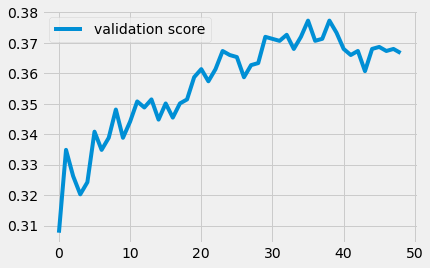

In [162]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),xtrain_age,np.ravel(ytrain_age), cv=5, scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score, label='validation score')
plt.legend()

### Learning Curve :

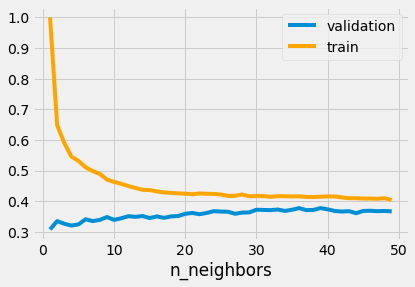

In [163]:
model=KNeighborsClassifier()
k=np.arange(1,50)
train_scores,val_scores=validation_curve(model,xtrain_age,np.ravel(ytrain_age),param_name='n_neighbors',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('n_neighbors')
plt.legend()

### Getting the best parameters to optimize our kNN model :

In [164]:
param_grid={'n_neighbors':np.arange(1,50),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
model=grid.fit(xtrain_age,np.ravel(ytrain_age))
OPkNN_estimator_age=grid.best_estimator_
OPkNN_estimator_age

KNeighborsClassifier(metric='euclidean', n_neighbors=39)

### Getting the best score : The one with (metric='euclidean', n_neighbors=32)

In [165]:
CV_OPkNN_age=grid.best_score_
CV_OPkNN_age

0.3773294316956723

# ***Gender :***

### Validation Score :

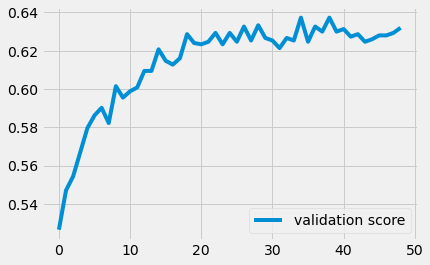

In [166]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),xtrain_gender,np.ravel(ytrain_gender), cv=5, scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score, label='validation score')
plt.legend()

### Learning Curve :

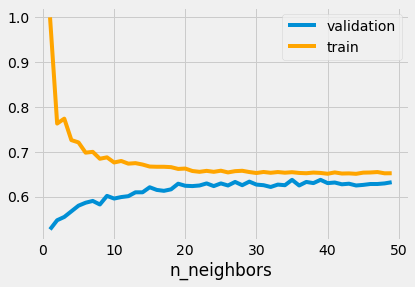

In [167]:
model=KNeighborsClassifier()
k=np.arange(1,50)
train_scores,val_scores=validation_curve(model,xtrain_gender,np.ravel(ytrain_gender),param_name='n_neighbors',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('n_neighbors')
plt.legend()

### Getting the best parameters to optimize our kNN model :

In [168]:
param_grid={'n_neighbors':np.arange(1,100),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
model=grid.fit(xtrain_gender,np.ravel(ytrain_gender))
OPkNN_estimator_gender=grid.best_estimator_
OPkNN_estimator_gender

KNeighborsClassifier(metric='euclidean', n_neighbors=85)

### Getting the best score : The one with (metric='manhattan', n_neighbors=72)

In [169]:
CV_OPkNN_gender=grid.best_score_
CV_OPkNN_gender

0.656498206860135

# ***Education :***

### Validation Score :

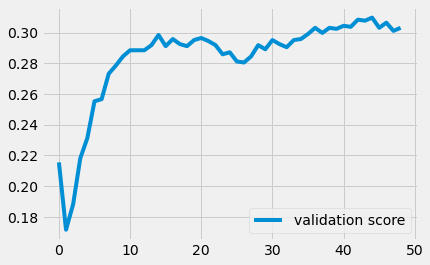

In [170]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),xtrain_education,np.ravel(ytrain_education), cv=5, scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score, label='validation score')
plt.legend()

### Learning Curve :

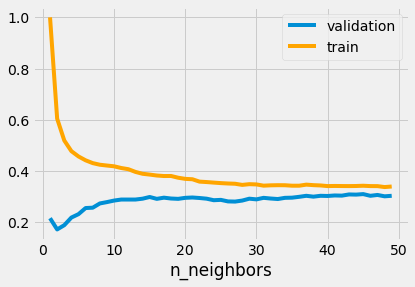

In [171]:
model=KNeighborsClassifier()
k=np.arange(1,50)
train_scores,val_scores=validation_curve(model,xtrain_education,np.ravel(ytrain_education),param_name='n_neighbors',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('n_neighbors')
plt.legend()

### Getting the best parameters to optimize our kNN model :

In [172]:
param_grid={'n_neighbors':np.arange(1,100),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
model=grid.fit(xtrain_education,np.ravel(ytrain_education))
OPkNN_estimator_education=grid.best_estimator_
OPkNN_estimator_education

KNeighborsClassifier(metric='manhattan', n_neighbors=99)

### Getting the best score : The one with (metric='euclidean', n_neighbors=95)

In [173]:
CV_OPkNN_education=grid.best_score_
CV_OPkNN_education

0.33026996105696244

# ***Country :***

### Validation Score :

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/s

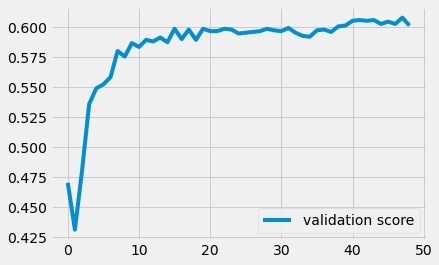

In [174]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),xtrain_country,np.ravel(ytrain_country), cv=5, scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score, label='validation score')
plt.legend()

### Learning Curve :

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


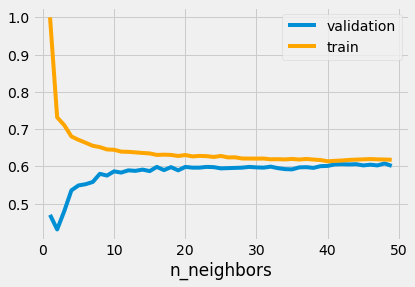

In [175]:
model=KNeighborsClassifier()
k=np.arange(1,50)
train_scores,val_scores=validation_curve(model,xtrain_country,np.ravel(ytrain_country),param_name='n_neighbors',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('n_neighbors')
plt.legend()

### Getting the best parameters to optimize our kNN model :


In [ ]:
param_grid={'n_neighbors':np.arange(1,100),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
model=grid.fit(xtrain_country,np.ravel(ytrain_country))
OPkNN_estimator_country=grid.best_estimator_
OPkNN_estimator_country

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


### Getting the best score : The one with (metric='euclidean', n_neighbors=98)

In [ ]:
CV_OPkNN_country=grid.best_score_
CV_OPkNN_country

# ***Ethnicity :***

### Validation Score :

In [ ]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),xtrain_ethnicity,np.ravel(ytrain_ethnicity), cv=5, scoring='accuracy').mean()
    val_score.append(score)

plt.plot(val_score, label='validation score')
plt.legend()

### Learning Curve :

In [ ]:
model=KNeighborsClassifier()
k=np.arange(1,50)
train_scores,val_scores=validation_curve(model,xtrain_ethnicity,np.ravel(ytrain_ethnicity),param_name='n_neighbors',param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),c='orange',label='train')
plt.xlabel('n_neighbors')
plt.legend()

### Getting the best parameters to optimize our kNN model :

In [ ]:
param_grid={'n_neighbors':np.arange(1,100),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
model=grid.fit(xtrain_ethnicity,np.ravel(ytrain_ethnicity))
OPkNN_estimator_ethnicity=grid.best_estimator_
OPkNN_estimator_ethnicity

### Getting the best score : The one with (metric='euclidean', n_neighbors=6)

In [ ]:
CV_OPkNN_ethnicity=grid.best_score_
CV_OPkNN_ethnicity

# ***Comparison between models :***

In [ ]:
Res_LSVC=[CV_LSVC_age,CV_LSVC_gender,CV_LSVC_education,CV_LSVC_country,CV_LSVC_ethnicity]
Res_kNN=[CV_kNN_age,CV_kNN_gender,CV_kNN_education,CV_kNN_country,CV_kNN_ethnicity]
Res_OPkNN=[CV_OPkNN_age,CV_OPkNN_gender,CV_OPkNN_education,CV_OPkNN_country,CV_OPkNN_ethnicity]
Targets=["age","gender","education","country","ethnicity"]

Result=[]
Result_Bis=[]
L=[]
for k in range(5):
    M=[Res_LSVC[k],Res_kNN[k],Res_OPkNN[k]]
    L.append(M)
for k in range(5):
    Result_Bis.append(Max(L[k]))
for k in range(5):
    if(Result_Bis[k] in Res_LSVC):
        Result.append("LSVC")
    if(Result_Bis[k] in Res_kNN):
        Result.append("kNN")
    if(Result_Bis[k] in Res_OPkNN):
        Result.append("OPkNN")

Comparison_Models=pd.DataFrame({"Targets":Targets,"Linear SVC":Res_LSVC,"kNN":Res_kNN,"Optimized kNN":Res_OPkNN,"Chosen Model":Result})
Comparison_Models.set_index("Targets",inplace=True)

Comparison_Models

# Functions to define models to use :

In [ ]:
def Age_Model():
    if(Comparison_Models["Chosen Model"].loc["age"]=="kNN"):
        return KNeighborsClassifier()
    if(Comparison_Models["Chosen Model"].loc["age"]=="OPkNN"):
        return OPkNN_estimator_age
    if(Comparison_Models["Chosen Model"].loc["age"]=="LSVC"):
        return LinearSVC()
def Gender_Model():
    if(Comparison_Models["Chosen Model"].loc["gender"]=="kNN"):
        return KNeighborsClassifier()
    if(Comparison_Models["Chosen Model"].loc["gender"]=="OPkNN"):
        return OPkNN_estimator_gender
    if(Comparison_Models["Chosen Model"].loc["gender"]=="LSVC"):
        return LinearSVC()
def Education_Model():
    if(Comparison_Models["Chosen Model"].loc["education"]=="kNN"):
        return KNeighborsClassifier()
    if(Comparison_Models["Chosen Model"].loc["education"]=="OPkNN"):
        return OPkNN_estimator_education
    if(Comparison_Models["Chosen Model"].loc["education"]=="LSVC"):
        return LinearSVC()
def Country_Model():
    if(Comparison_Models["Chosen Model"].loc["country"]=="kNN"):
        return KNeighborsClassifier()
    if(Comparison_Models["Chosen Model"].loc["country"]=="OPkNN"):
        return OPkNN_estimator_country
    if(Comparison_Models["Chosen Model"].loc["country"]=="LSVC"):
        return LinearSVC()
def Ethnicity_Model():
    if(Comparison_Models["Chosen Model"].loc["ethnicity"]=="kNN"):
        return KNeighborsClassifier()
    if(Comparison_Models["Chosen Model"].loc["ethnicity"]=="OPkNN"):
        return OPkNN_estimator_ethnicity
    if(Comparison_Models["Chosen Model"].loc["ethnicity"]=="LSVC"):
        return LinearSVC()

# ***Final Fitted Models :***

### Age :

In [ ]:
Model_Age=Age_Model()
Model_Age.fit(xtrain_age, np.ravel(ytrain_age))

### Gender :

In [ ]:
Model_Gender=Gender_Model()
Model_Gender.fit(xtrain_gender, np.ravel(ytrain_gender))

### Education :

In [ ]:
Model_Education=Education_Model()
Model_Education.fit(xtrain_education, np.ravel(ytrain_education))

### Country :

In [ ]:
Model_Country=Country_Model()
Model_Country.fit(xtrain_country, np.ravel(ytrain_country))

### Ethnicity :

In [ ]:
Model_Ethnicity=Ethnicity_Model()
Model_Ethnicity.fit(xtrain_ethnicity, np.ravel(ytrain_ethnicity))

# ***Predict an individual :***

### Definition of the function :

In [ ]:
def Individual_Prediction(score1,score2,score3):
    I=np.array([score1,score2,score3]).reshape(1,3)
    age=Model_Age.predict(I)[0]
    gender=Model_Gender.predict(I)[0]
    education=Model_Education.predict(I)[0]
    country=Model_Country.predict(I)[0]
    ethnicity=Model_Ethnicity.predict(I)[0]
    s=""
    s+="\n"+"Individual : "+"\n"+"Age : "+age+"\n"+"Gender : "+gender+"\n"+"Education : "+education+"\n"+"Country : "+country+"\n"+"Ethnicity : "+ethnicity
    return s

### Switch case :

***In this section, you can start the algorithm below and you can predict targets of an individual by giving the scores (that are given in the dataset : nscore,escore,oscore...)***

#### ***To do so, you can take features that are given in the dataframe called : "finalDf". Or, inventing one.***

## Algorithm :

In [ ]:
Predict_an_Individual()

### Importing all Dataset Informations as CSV into a separate folder

In [ ]:
import os
rep=True
while(rep==True):
    print("Do you want to import the dataset informations into csv files?")
    reponse=input("Type ('YES' or 'NO')")
    if(reponse.upper()=="NO"):
        rep=False
    if(reponse.upper()=="YES"):
        directory="CSV Files"
        parent_dir=os.getcwd()
        path=os.path.join(parent_dir, directory)
        os.makedirs(path)
        AGE.to_csv("CSV Files\\Age.csv",sep=";")
        GENDER.to_csv("CSV Files\\Gender.csv",sep=";")
        EDUCATION.to_csv("CSV Files\\Education.csv",sep=";")
        COUNTRY.to_csv("CSV Files\\Country.csv",sep=";")
        ETHNICITY.to_csv("CSV Files\\Ethnicity.csv",sep=";")
        BENZOS.to_csv("CSV Files\\Benzos.csv",sep=";")
        COKE.to_csv("CSV Files\\Coke.csv",sep=";")
        KETAMINE.to_csv("CSV Files\\Ketamine.csv",sep=";")
        MUSHROOMS.to_csv("CSV Files\\Mushrooms.csv",sep=";")
        print("\n"+"-------Files Created-------")
        rep=False